# Ecommerce Capstone Project

### Importing required libraries 

In [2]:
#Importing warnings to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from datetime import date, datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn

### Reading Data
**As consumer electornics data has \N considering it as null while importing the  csv file**

In [8]:
consumer_electronics_df = pd.read_csv(r"C:\Users\Sagar\Desktop\ML PROJECT\Capstone Project Final Submission\ConsumerElectronics.csv") #na_values=['\\N', ' '])

In [10]:
consumer_electronics_df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [11]:
consumer_electronics_df.shape

(1648824, 20)

In [12]:
consumer_electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

**Finding the percentage of  unique orders belonging to the required 3 categories** 

In [13]:
print("Percentage of unique orders for the 3 categories:",
      len(consumer_electronics_df.loc[(consumer_electronics_df['product_analytic_sub_category']=='GamingAccessory') | 
                 (consumer_electronics_df['product_analytic_sub_category']=='CameraAccessory') | 
                 (consumer_electronics_df['product_analytic_sub_category']=='HomeAudio')].drop_duplicates
          (subset = ["order_id"], keep = False))/len(consumer_electronics_df.loc[((consumer_electronics_df['product_analytic_sub_category']=='GamingAccessory') | 
                                                             (consumer_electronics_df['product_analytic_sub_category']=='CameraAccessory') | 
                                                             (consumer_electronics_df['product_analytic_sub_category']=='HomeAudio'))])*100)

Percentage of unique orders for the 3 categories: 81.95886392814697


**Finding total number of unique orders for all categories**

In [14]:
print("Percentage of unique orders for all the categories:",
      len(consumer_electronics_df.drop_duplicates(subset = ["order_id"], keep = False))/len(consumer_electronics_df)*100)

Percentage of unique orders for all the categories: 83.02159599811745


**Therefore dropping duplicates on basis of order date,order id,order item id and number of units**

In [15]:
consumer_electronics_df = consumer_electronics_df.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)

In [16]:
consumer_electronics_df.shape

(1536296, 20)

In [17]:
print("Number of duplicate records for all categories:", 1648824 - 1536296)

Number of duplicate records for all categories: 112528


### Data  type conversion due to type mismatch

In [22]:
consumer_electronics_df['order_datetime'] = pd.to_datetime(consumer_electronics_df['order_date'], format='%Y-%m-%d %H:%M:%S')
#Removing sceintific notation in the following collumns
consumer_electronics_df['cust_id']=  consumer_electronics_df['cust_id'].apply(lambda x: '{}'.format(x))
consumer_electronics_df['order_id']=  consumer_electronics_df['order_id'].apply(lambda x: '{}'.format(x))
consumer_electronics_df['order_item_id']=  consumer_electronics_df['order_item_id'].apply(lambda x: '{}'.format(x))
consumer_electronics_df['pincode']=  consumer_electronics_df['pincode'].apply(lambda x: '{}'.format(x))

### Data Preparation
**Creating order_date column from order_datetime column**

In [23]:
consumer_electronics_df['order_date'] = consumer_electronics_df['order_datetime'].dt.date

**As its mentioned to only use the data from date range -  July 2015 to June 2016, filtering out the other dates**

In [24]:
start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()
consumer_electronics_df = consumer_electronics_df.loc[(consumer_electronics_df['order_date']>=start_date) 
                                                      & (consumer_electronics_df['order_date']<=end_date)]

**As we need to create models aggregated weekly a new column "order_week" which contains week number as per order date is created**

In [25]:
consumer_electronics_df['order_week'] = consumer_electronics_df['order_datetime'].dt.week

In [26]:
consumer_electronics_df.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id   gmv  units deliverybdays deliverycdays  ...  \
0  3419300926147000  6400      1            \N            \N  ...   
1  1420830839915200  6900      1            \N            \N  ...   
2  2421912925714800  1990      1            \N            \N  ...   
3  4416592101738400  1690      1            \N            \N  ...   
4  4419525153426400  1618      1            \N            \N  ...   

                  cust_id                 pincode  \
0  -1.01299130778588E+018  -7.79175582905735E+018   
1  -8.99032457905512E+018   7.33541149097431E+018   
2   -1.0404429420466E+018  -7.47768776228657E+018   
3  -7.60496084352714E+018  -5.83593163877661E+018   
4    2.8945572083453E+018   5.34735360997242E+017   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical product_mrp  \
0               CameraAccessory              CameraTripod        7190   
1               CameraAccessory              CameraTripod        7190   
2               CameraAccessory              CameraTripod        2099   
3               CameraAccessory              CameraTripod        2099   
4               CameraAccessory              CameraTripod        2099   

  product_procurement_sla      order_datetime  order_week  
0                       0 2015-10-17 15:11:54          42  
1                       0 2015-10-19 10:07:22          43  
2                       3 2015-10-20 15:45:56          43  
3                       3 2015-10-14 12:05:15          42  
4                       3 2015-10-17 21:25:03          42  

[5 rows x 22 columns]

**Finding and correcting null values by either dropping collumns or by imputation**

In [27]:
round(100*(consumer_electronics_df.isnull().sum()/len(consumer_electronics_df.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
deliverycdays                      0.0
deliverybdays                      0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

**As deliverybdays,deliverycdays consist of 79% null values ,dropping them is the correct option**

In [28]:
#Let's remove the columns deliverybdays & deliverycdays as there are 79% null values
consumer_electronics_df.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)

In [29]:
round(100*(consumer_electronics_df.isnull().sum()/len(consumer_electronics_df.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

**As product_analytic_vertical column is null in some rows, dropping the rows as they don't serve any purpose**

In [30]:
consumer_electronics_df = consumer_electronics_df.loc[~pd.isnull(consumer_electronics_df['product_analytic_vertical'])]

In [31]:
round(100*(consumer_electronics_df.isnull().sum()/len(consumer_electronics_df.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

**As gmv is our dependent variable dropping rows that have null values in gmv collumn** 

In [32]:
consumer_electronics_df = consumer_electronics_df.loc[~pd.isnull(consumer_electronics_df['gmv'])]

In [33]:
round(100*(consumer_electronics_df.isnull().sum()/len(consumer_electronics_df.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

**As there are no null values we can continue with our analysis**


**Checking the different modes of payment used** 

In [34]:

consumer_electronics_df['s1_fact.order_payment_type'].astype('category').value_counts()

COD        1106511
Prepaid     429178
Name: s1_fact.order_payment_type, dtype: int64

#### As seen above, we have only two types of payments i.e. COD & Prepaid

**Let's check order week along with order date for year 2016 to verify the correctness of order weeek for our analysis**

In [25]:
consumer_electronics_df.loc[(consumer_electronics_df.Year == 2016) & (consumer_electronics_df.Month==2)].loc[:,['order_date','order_week']].sort_values(by='order_date')

order_date  order_week
649674  2016-02-01           5
782835  2016-02-01           5
662072  2016-02-01           5
689782  2016-02-01           5
652520  2016-02-01           5
652528  2016-02-01           5
680778  2016-02-01           5
707145  2016-02-01           5
772163  2016-02-01           5
727780  2016-02-01           5
758287  2016-02-01           5
727783  2016-02-01           5
737576  2016-02-01           5
652582  2016-02-01           5
643329  2016-02-01           5
707181  2016-02-01           5
745993  2016-02-01           5
745992  2016-02-01           5
707142  2016-02-01           5
756766  2016-02-01           5
669547  2016-02-01           5
669548  2016-02-01           5
680861  2016-02-01           5
669549  2016-02-01           5
753436  2016-02-01           5
772134  2016-02-01           5
772138  2016-02-01           5
737642  2016-02-01           5
707109  2016-02-01           5
727765  2016-02-01           5
...            ...         ...
711284  2016-02-29           9
729406  2016-02-29           9
779723  2016-02-29           9
729397  2016-02-29           9
729368  2016-02-29           9
655784  2016-02-29           9
711278  2016-02-29           9
711277  2016-02-29           9
729499  2016-02-29           9
729652  2016-02-29           9
775530  2016-02-29           9
775531  2016-02-29           9
775532  2016-02-29           9
729612  2016-02-29           9
775533  2016-02-29           9
775534  2016-02-29           9
775535  2016-02-29           9
655601  2016-02-29           9
775536  2016-02-29           9
729573  2016-02-29           9
711273  2016-02-29           9
711274  2016-02-29           9
729540  2016-02-29           9
729536  2016-02-29           9
711275  2016-02-29           9
729508  2016-02-29           9
711276  2016-02-29           9
762672  2016-02-29           9
775647  2016-02-29           9
660725  2016-02-29           9

[142706 rows x 2 columns]

**Therefore the order weeks need to be changed in order for them to be continuous  from 2015 for  our analysis**

In [26]:
def mapWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

In [27]:
consumer_electronics_df['order_week'] = consumer_electronics_df.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)

In [28]:
consumer_electronics_df.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
0  3419300926147000  6400.0      1                        COD    5   
1  1420830839915200  6900.0      1                        COD    7   
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         7190                        0   
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42

**Now let's check if product mrp is 0 and drop the same as it makes no sense to keep it as is serves no purpose**

In [29]:
#Let's check if we have transactions where MRP of the product is 0
len(consumer_electronics_df.loc[consumer_electronics_df.product_mrp == 0])

4864

In [30]:
consumer_electronics_df = consumer_electronics_df.loc[consumer_electronics_df.product_mrp != 0]

In [31]:
#confirming that rows are dropped
len(consumer_electronics_df.loc[consumer_electronics_df.product_mrp == 0])

0

**Now let's check if gmv is 0 and drop the same for the following reasons**
1. imputing it with 1 doesn't affect analysis
2. imputing it with mrp x units is not a good idea 

In [32]:
len(consumer_electronics_df.loc[consumer_electronics_df.gmv == 0])

940

In [33]:
consumer_electronics_df = consumer_electronics_df.loc[~(consumer_electronics_df.gmv == 0)]

In [34]:
#Verifying if the values have been successfully imputed
consumer_electronics_df.loc[consumer_electronics_df['gmv'] == 0.0]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_datetime, order_week]
Index: []

**Now Let's check if we have GMV greater than or equal to the MRP x Number of units sold and drop them if they are, as that shouldn't be practically possible**

In [35]:
consumer_electronics_df.loc[consumer_electronics_df.gmv > (consumer_electronics_df.product_mrp * consumer_electronics_df.units)]

fsn_id  order_date  Year  Month          order_id  \
511      ACCCX3SGJRUGH99Z  2015-10-06  2015     10  4409414274572400   
512      ACCCX3SGN4BGZGQY  2015-10-16  2015     10  2417955407141700   
818      ACCCX3SUBDTT3GMA  2015-10-08  2015     10  1411811239304700   
819      ACCCX3SUBDTT3GMA  2015-10-22  2015     10  4423484217011800   
820      ACCCX3SUBXAF4QRK  2015-10-07  2015     10  1410601049371400   
821      ACCCX3SUBXAF4QRK  2015-10-09  2015     10  3412467299794200   
822      ACCCX3SUBXAF4QRK  2015-10-24  2015     10  1425542425134300   
1412     ACCCYZFNBHJNG9GQ  2015-10-28  2015     10  3428740336100600   
2061     ACCCZ34EDY5EYMJ6  2015-10-23  2015     10  2424454554421500   
2192     ACCCZAKGAZZVYSJC  2015-10-17  2015     10  4419446046108400   
2193     ACCCZAKGAZZVYSJC  2015-10-03  2015     10  4407112052786800   
2533     ACCCZYRUZKWZZZKP  2015-10-28  2015     10  1428813513365700   
2565     ACCCZZC93FANSHUV  2015-10-25  2015     10  4425963632712100   
2567     ACCCZZC93FANSHUV  2015-10-29  2015     10  4429917274067500   
2598     ACCCZZC93FANSHUV  2015-10-26  2015     10  2427154061414200   
2600     ACCCZZC93FANSHUV  2015-10-30  2015     10  2430499888097800   
2601     ACCCZZC93FANSHUV  2015-10-31  2015     10  2431395402367400   
2612     ACCCZZC93FANSHUV  2015-10-25  2015     10  1426066855734400   
2617     ACCCZZC93FANSHUV  2015-10-20  2015     10  3422172862023300   
2620     ACCCZZC93FANSHUV  2015-10-31  2015     10  4431335053872700   
2631     ACCCZZC93FANSHUV  2015-10-01  2015     10  1405503903817500   
2636     ACCCZZC93FANSHUV  2015-10-28  2015     10  1428621662548200   
2867     ACCCZZC9XHZZ49FS  2015-10-01  2015     10  2405509918066800   
2873     ACCCZZC9YWSGQH2P  2015-10-06  2015     10  3409798620216600   
2874     ACCCZZC9YWSGQH2P  2015-10-16  2015     10  2418722374155400   
2875     ACCCZZC9YWSGQH2P  2015-10-18  2015     10  2420312173238500   
2876     ACCCZZC9YWSGQH2P  2015-10-24  2015     10  1425210978185600   
2877     ACCCZZC9YWSGQH2P  2015-10-14  2015     10  1416537488310200   
2878     ACCCZZC9YWSGQH2P  2015-10-15  2015     10  1417482184858200   
2879     ACCCZZC9YWSGQH2P  2015-10-15  2015     10  1417846893385600   
...                   ...         ...   ...    ...               ...   
1541585  VGLEF2TEFBSXU9HC  2015-09-03  2015      9  2378842905550410   
1541625  VGLEF2TEZUSVQHWF  2015-09-07  2015      9  3381987673795820   
1541626  VGLEF2TEZUSVQHWF  2015-09-08  2015      9  3381987674305130   
1541627  VGLEF2TEZUSVQHWF  2015-09-02  2015      9  2378842905222940   
1541628  VGLEF2TEZUSVQHWF  2015-09-03  2015      9  3381470357557990   
1542115  VORDF83RSGB5BENW  2015-09-07  2015      9  3381987673656200   
1543767  VPLE5UXBRDYZXHHM  2015-09-17  2015      9  1393305667173000   
1543891  VPLEAFCSDSGDN3MQ  2015-09-02  2015      9  2378842905166680   
1543892  VPLEAFCSDSGDN3MQ  2015-09-08  2015      9  3381987674402660   
1543893  VPLEAFCSDSGDN3MQ  2015-09-28  2015      9  4403041671601000   
1543894  VPLEAFCSDSGDN3MQ  2015-09-02  2015      9  2378842904977210   
1543895  VPLEAFCSDSGDN3MQ  2015-09-21  2015      9  2397123841497000   
1543896  VPLEAFCSDSGDN3MQ  2015-09-22  2015      9  3397753601440000   
1543897  VPLEAFCSDSGDN3MQ  2015-09-16  2015      9  1392535891508700   
1543898  VPLEAFCSDSGDN3MQ  2015-09-29  2015      9  1403640958405000   
1543899  VPLEAFCSDSGDN3MQ  2015-09-30  2015      9  1404822581623100   
1543900  VPLEAFCSDSGDN3MQ  2015-09-28  2015      9  3402764881365600   
1543901  VPLEAFCSDSGDN3MQ  2015-09-30  2015      9  3404752591823600   
1543902  VPLEAFCSDSGDN3MQ  2015-09-10  2015      9  2387479371065400   
1543903  VPLEAFCSDSGDN3MQ  2015-09-15  2015      9  1391575212215200   
1543904  VPLEAFCSDSGDN3MQ  2015-09-06  2015      9  3381987673470830   
1543905  VPLEAFCSDSGDN3MQ  2015-09-10  2015      9  1387502852390100   
1543906  VPLEAFCSDSGDN3MQ  2015-09-17  2015      9  4393543399374800   
1543907  VPLEAFCSDSGDN3MQ  2015-09-28  2015      9  2402823

#### Removing the rows where the GMV is greater than the number of units sold multiplied by the MRP of the product

In [36]:
consumer_electronics_df= consumer_electronics_df.loc[consumer_electronics_df.gmv <= (consumer_electronics_df.product_mrp * consumer_electronics_df.units)]

In [37]:
#checking the shape
consumer_electronics_df.shape

(1490019, 20)

**now let's look for and remove outliers in the columns in the dataset**

In [38]:
consumer_electronics_df.describe()

Year         Month           gmv         units           sla  \
count  1.490019e+06  1.490019e+06  1.490019e+06  1.490019e+06  1.490019e+06   
mean   2.015556e+03  6.411632e+00  2.495538e+03  1.021619e+00  5.683975e+00   
std    4.968865e-01  3.690315e+00  5.677618e+03  2.504660e-01  2.998176e+00   
min    2.015000e+03  1.000000e+00  1.000000e+01  1.000000e+00  0.000000e+00   
25%    2.015000e+03  3.000000e+00  3.390000e+02  1.000000e+00  4.000000e+00   
50%    2.016000e+03  6.000000e+00  7.500000e+02  1.000000e+00  6.000000e+00   
75%    2.016000e+03  1.000000e+01  1.999000e+03  1.000000e+00  7.000000e+00   
max    2.016000e+03  1.200000e+01  2.269470e+05  5.000000e+01  1.006000e+03   

        product_mrp  product_procurement_sla    order_week  
count  1.490019e+06             1.490019e+06  1.490019e+06  
mean   4.214486e+03             5.269346e+00  5.556354e+01  
std    8.686505e+03             5.209425e+01  1.354709e+01  
min    4.900000e+01            -1.000000e+00  2.700000e+01  
25%    8.000000e+02             1.000000e+00  4.400000e+01  
50%    1.599000e+03             2.000000e+00  5.600000e+01  
75%    3.499000e+03             3.000000e+00  6.700000e+01  
max    2.999990e+05             1.000000e+03  7.900000e+01

**Checking for outliers in sla**

In [39]:
consumer_electronics_df['sla'].value_counts()/len(consumer_electronics_df.index)*100

6       14.394984
5       14.179081
4       13.380970
7       12.222126
3       10.827043
8        9.393370
2        6.566426
9        5.954219
1        4.526922
10       3.502841
11       2.041518
12       1.170254
13       0.668448
0        0.356841
14       0.354492
15       0.193487
16       0.111140
17       0.053959
18       0.030872
19       0.018188
20       0.009799
21       0.006913
25       0.004899
24       0.004564
22       0.004497
23       0.003893
26       0.003758
27       0.002886
28       0.002349
30       0.002081
29       0.001342
31       0.000805
32       0.000604
35       0.000470
38       0.000470
33       0.000403
42       0.000336
39       0.000336
34       0.000268
44       0.000201
41       0.000201
40       0.000201
61       0.000201
36       0.000201
37       0.000134
45       0.000134
239      0.000067
184      0.000067
175      0.000067
145      0.000067
68       0.000067
1004     0.000067
60       0.000067
52       0.000067
51       0.000067
47       0

In [40]:
len(consumer_electronics_df.loc[consumer_electronics_df.sla>30])/len(consumer_electronics_df)

5.8388517193404915e-05

**Only 0.0058% of the data has sla more than 30 days**
**Therefore let's cap it to 30 days as thats the maximum practical value**

In [41]:
consumer_electronics_df = consumer_electronics_df.loc[consumer_electronics_df.sla<=30]

In [42]:
consumer_electronics_df.shape

(1489932, 20)

**product_procurement_sla has negative value thus let's remove those records**

In [43]:
consumer_electronics_df = consumer_electronics_df.loc[consumer_electronics_df.product_procurement_sla>=0]

**Lets check for outliers in product_procurement_sla**

In [44]:
consumer_electronics_df['product_procurement_sla'].value_counts()/len(consumer_electronics_df.index)*100

2       34.043203
3       19.386683
1       19.342379
5       13.973453
4        7.662434
0        2.678575
6        1.010862
7        0.779668
15       0.426847
14       0.333542
1000     0.284962
13       0.033719
8        0.030985
9        0.005959
12       0.003996
10       0.002734
Name: product_procurement_sla, dtype: float64

#### As we see above, the number of rows have product procuremnt sla greater than 15 are very less and also there is no value after 15. thus let's cap it to 15 days

In [45]:
consumer_electronics_df = consumer_electronics_df.loc[consumer_electronics_df.product_procurement_sla<=15]

In [46]:
consumer_electronics_df.shape

(1422440, 20)

**filtering  the dataset  for the 3  sub-categories which are required for analysis**

In [47]:
# Filtering the data for the 3 categories
consumer_electronics_df= consumer_electronics_df[(consumer_electronics_df['product_analytic_sub_category']=='GamingAccessory')|
       (consumer_electronics_df['product_analytic_sub_category']=='CameraAccessory')|(consumer_electronics_df['product_analytic_sub_category']=='HomeAudio')]

In [48]:
# checking the length of the data present now
consumer_electronics_df.shape

(497561, 20)

**Therefore we  now  have 4,97,561 rows of data for the three categories used for analysis**

**Now let's see the outliers in column gmv for each sub-category** 

In [49]:
#Seeing the trend in the dataset & the outliers
consumer_electronics_df.describe()

Year          Month            gmv          units  \
count  497561.000000  497561.000000  497561.000000  497561.000000   
mean     2015.580580       6.204186    1268.510002       1.025587   
std         0.493465       3.663982    2377.020413       0.251929   
min      2015.000000       1.000000      10.000000       1.000000   
25%      2015.000000       3.000000     295.000000       1.000000   
50%      2016.000000       6.000000     545.000000       1.000000   
75%      2016.000000      10.000000    1499.000000       1.000000   
max      2016.000000      12.000000  148050.000000      39.000000   

                 sla    product_mrp  product_procurement_sla     order_week  
count  497561.000000  497561.000000            497561.000000  497561.000000  
mean        5.888470    2497.172984                 2.635916      55.949996  
std         2.688981    4705.444523                 1.656838      13.525343  
min         0.000000      99.000000                 0.000000      27.000000  
25%         4.000000     766.000000                 2.000000      45.000000  
50%         6.000000    1200.000000                 2.000000      57.000000  
75%         7.000000    2800.000000                 3.000000      67.000000  
max        30.000000  180000.000000                15.000000      79.000000

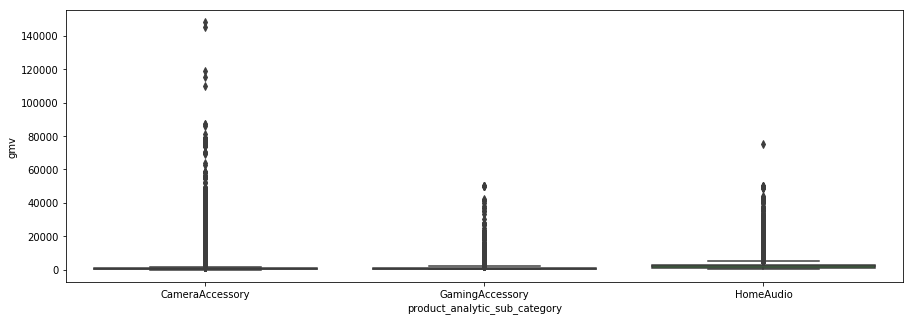

In [50]:
#Let's check outliers in gmv individaully for the three categories
plt.figure(figsize = (15,5))
sns.boxplot(y = 'gmv',data = consumer_electronics_df, x = 'product_analytic_sub_category')

**We  can now observe a large number of outliers in the category CameraAccessory & also some  outliers in the other two categories. This needs to be handled**

**Capping the values to 0.95 quantile**

In [51]:
consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)

6079.0

In [52]:
consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

4706.249999999913

In [53]:
# Gaming Accessory - capping value for gmv for outlier removal
consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)

2890.0

**Now let's create the box plot for checking the outliers after capping the gmv to 95 percentile for each of the sub-categories**

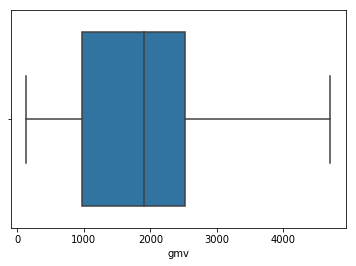

In [54]:
sns.boxplot(consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='HomeAudio') & (consumer_electronics_df.gmv<4706)]['gmv'])

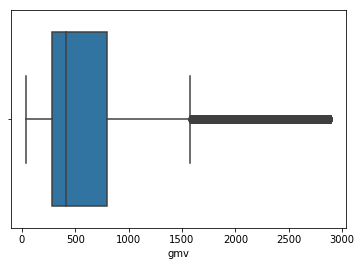

In [55]:
sns.boxplot(consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='GamingAccessory') & (consumer_electronics_df.gmv<2890)]['gmv'])

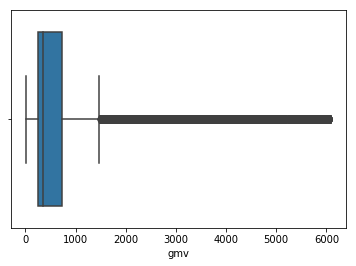

In [56]:
## plotting the box plot for checking the outliers for camera accessory  data after capping it to 95 percentile
sns.boxplot(consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='CameraAccessory') & (consumer_electronics_df.gmv<6079)]['gmv'])

**Thus we can see even after capping the values we find outliers in the dataset. We will consider this as premium products as dropping rows will lead to loss of data. Thus we'll cap the values to 0.95 percentile**

In [57]:
camera_data = consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='CameraAccessory') & (consumer_electronics_df.gmv<6079)]
gaming_data = consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='GamingAccessory') & (consumer_electronics_df.gmv<3000)]
homeaudio_data = consumer_electronics_df.loc[(consumer_electronics_df.product_analytic_sub_category=='HomeAudio') & (consumer_electronics_df.gmv<4706)]

In [58]:
## checking the shape of the 3 categories
print(camera_data.shape)
print(gaming_data.shape)
print(homeaudio_data.shape)

(199598, 20)
(172870, 20)
(100755, 20)


In [59]:
## concatenating the three categories to a single dataframe data
consumer_electronics_df = pd.concat([camera_data, gaming_data, homeaudio_data], axis = 0)

#### Therefore, we've successfully removed the prominent outliers from each of the 3 categories

**Let's now drop the columns which give us no relevant information for analysis**

In [60]:
consumer_electronics_df.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'], 
        inplace = True, axis = 1)

**Let's now convert  data types for Year, Month & order_week to int**

In [61]:

consumer_electronics_df['Year'] = consumer_electronics_df['Year'].astype('int')
consumer_electronics_df['Month'] = consumer_electronics_df['Month'].astype('int')
consumer_electronics_df['order_week'] = consumer_electronics_df['order_week'].astype('int')

## Exploratory Data Analyisis and KPI Engineering

**Let's visualize the number of transactions under each sub-category**

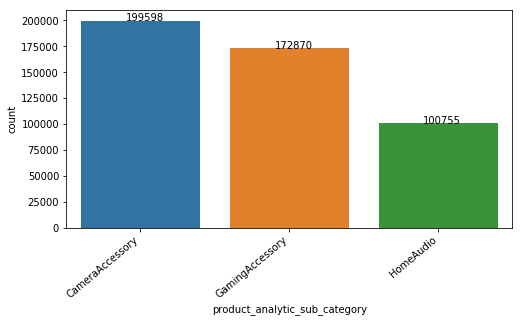

In [62]:
## No of transactions by Sub-Category
plt.figure(figsize = (8,4))
ax = sns.countplot(consumer_electronics_df['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

**Thus the maximum number of transaction were from Camera Accessory category followed by Gaming Accessory and lastly Home Audio**

**Let's now visualize the total revenue for each of the sub-categories**

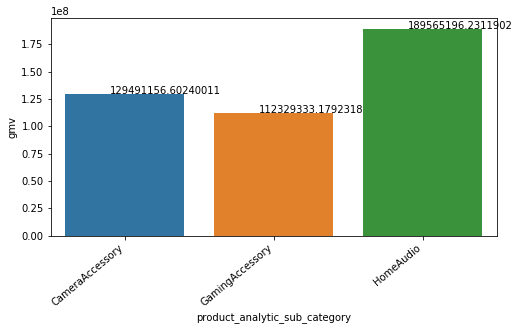

In [63]:
total_revenue= consumer_electronics_df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

#### The maximum revenue from transacations are for Home Audio followed by Camera Accessory & lastly Gamming Accessory
**Let's now check the corelation of the different variables to check for multi-colinearity**

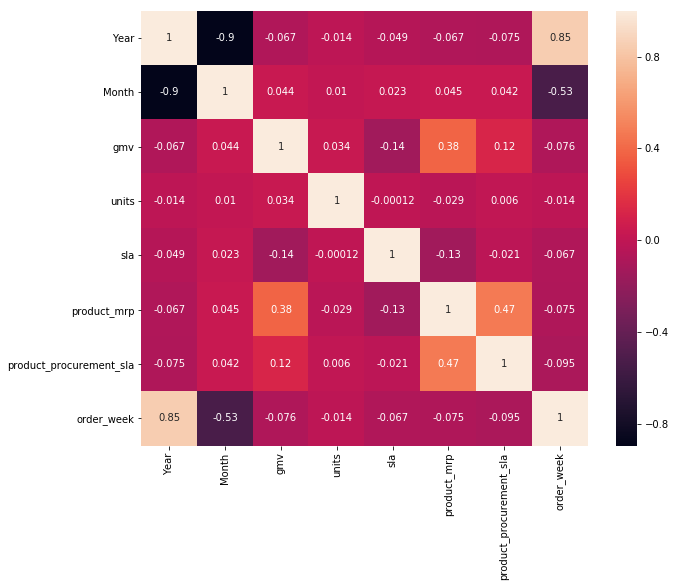

In [64]:
plt.figure(figsize = (10,8))
sns.heatmap(consumer_electronics_df.corr(), annot=True)

#### As we see above, there is a high correlation b/w 
- Month & Year
- Month & order_week

#### Medium correlation b/w
- product_mrp & GMV

**Let's now visualize the total revenue for each of the sub-categories (total gmv) vs Payment Type**

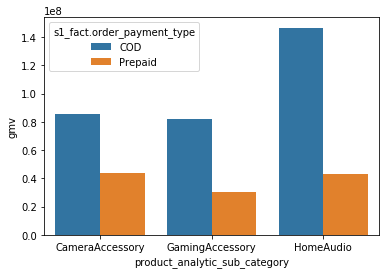

In [65]:
revenue_by_payment_type = consumer_electronics_df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=revenue_by_payment_type)

- For COD orders,the  maximum revenue is from Home Audio followed by Camera Accessory and lastly Gaming Accessory
- For Prepaid order's, maximum revenue is from Camera Accessory, followed by Home audio and lastly Gaming accessory

**Let's now visualize the total number of orders for each of the sub-categories vs Payment Type**

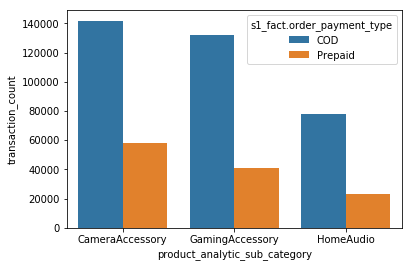

In [66]:
norders_by_Payment_type = consumer_electronics_df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="s1_fact.order_payment_type", data=norders_by_Payment_type)

- Maximum number of orders are for Camera Accessory followed by Gaming Accessory and lastly  Home Audio  for both type of trasactions 

#### Creating the data set for each  sub-category

In [67]:
gaming_data = consumer_electronics_df[(consumer_electronics_df['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
camera_data = consumer_electronics_df[(consumer_electronics_df['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
homeaudio_data = consumer_electronics_df[(consumer_electronics_df['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

In [68]:
print(gaming_data.shape)
print(camera_data.shape)
print(homeaudio_data.shape)

(172870, 14)
(199598, 14)
(100755, 14)


### Creating the KPIs

**Function to take  dataframe of order dates and provide total special and payment dates for each week** 

In [69]:
def createDFFromDict(listOfValues, desiredColumnName):
    df = pd.DataFrame(listOfValues)
    df[desiredColumnName] = pd.to_datetime(df[desiredColumnName]).dt.date
    df["total_"+desiredColumnName+"s"] = 1
    df['order_week'] = pd.to_datetime(df[desiredColumnName]).dt.week
    df['year'] = pd.to_datetime(df[desiredColumnName]).dt.year
    df['order_week'] = df.apply(lambda x: mapWeek(x['order_week'],x['year']), axis = 1)
    df = df.groupby('order_week').sum()
    df["is_"+desiredColumnName] = 1
    df.drop('year', axis = 1, inplace = True)
    return df

In [70]:
def createKPIs(df):
#### KPI 1: Payment mode indicator
    df['payment_mode_indicator'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
#### KPI 2: Selling price of each product in every transaction
    df['selling_price'] = df['gmv']/df['units']
#### KPI 3: Discount offered on  each of the products
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
    
    return df

In [71]:
def createWeeklyAggregatedCollumns():
#### KPI 4: Total Holidays
    holidays = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = createDFFromDict(holidays,"holiday")

#### KPI 5: total Special sale days
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = createDFFromDict(special_sale_days,'special_sale_day')

#### KPI 6: total pay days
    #Creating order_day column
    pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = createDFFromDict(pay_days,'pay_day')
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    return final_df.fillna(0).astype('int')

In [72]:
createWeeklyAggregatedCollumns()

total_holidays  is_holiday  total_special_sale_days  \
order_week                                                        
27                       1           1                        0   
29                       0           0                        2   
31                       0           0                        0   
32                       1           1                        0   
33                       0           0                        2   
34                       0           0                        1   
35                       0           0                        3   
36                       0           0                        0   
37                       1           1                        0   
38                       0           0                        0   
40                       0           0                        0   
41                       0           0                        1   
42                       1           1                        4   
44                       1           1                        0   
45                       0           0                        2   
46                       1           1                        4   
49                       0           0                        0   
51                       0           0                        0   
52                       2           1                        3   
53                       1           1                        6   
55                       0           0                        0   
56                       0           0                        3   
58                       0           0                        2   
59                       1           1                        1   
60                       1           1                        3   
62                       0           0                        0   
63                       0           0                        3   
64                       1           1                        0   
66                       1           1                        0   
67                       1           1                        0   
68                       0           0                        0   
70                       0           0                        0   
72                       1           1                        0   
73                       1           1                        0   
74                       0           0                        3   
75                       0           0                        0   
77                       0           0                        0   
78                       2           1                        0   

            is_special_sale_day  total_pay_days  is_pay_day  
order_week                                                   
27                            0               1           1  
29                            1               1           1  
31                            0               1           1  
32                            0               0           0  
33                            1               1           1  
34                            1               0           0  
35                            1               0           0  
36                            0               1           1  
37                            0               0           0  
38                            0               1           1  
40                            0               1           1  
41                            1               0           0  
42                            1               1           1  
44                            0               1           1  
45                            1               0           0  
46                            1               1           1  
49                            0               1           1  
51                            0               1           1  
52                            1               0           0  
53                           

In [73]:
createWeeklyAggregatedCollumns().head()

total_holidays  is_holiday  total_special_sale_days  \
order_week                                                        
27                       1           1                        0   
29                       0           0                        2   
31                       0           0                        0   
32                       1           1                        0   
33                       0           0                        2   

            is_special_sale_day  total_pay_days  is_pay_day  
order_week                                                   
27                            0               1           1  
29                            1               1           1  
31                            0               1           1  
32                            0               0           0  
33                            1               1           1

**Now let's Add the KPIs to the dataframes of each sub-category**

In [74]:
gaming_data_with_KPIs = createKPIs(gaming_data)
camera_data_with_KPIs = createKPIs(camera_data)
homeaudio_data_with_KPIs = createKPIs(homeaudio_data)

In [75]:
print(homeaudio_data_with_KPIs.shape)
print(gaming_data_with_KPIs.shape)
print(camera_data_with_KPIs.shape)

(100755, 17)
(172870, 17)
(199598, 17)


In [76]:
gaming_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
1599  2015-10-14  2015     10  1416985339691600  2750.0      1   
1600  2015-10-15  2015     10  1417669228375400  2899.0      1   
1601  2015-10-17  2015     10  1419414998353400  2609.0      1   
1602  2015-10-26  2015     10  1427167582532600  2772.0      1   
1603  2015-10-16  2015     10  4417730112316700  2750.0      1   

     s1_fact.order_payment_type  sla               cust_id  \
1599                        COD    7   9041577304631719936   
1600                    Prepaid    5   8973831124140309504   
1601                    Prepaid    5  -4824142736471789568   
1602                    Prepaid    5  -3305365297260279808   
1603                    Prepaid    7   2297791966161220096   

     product_analytic_vertical  product_mrp  product_procurement_sla  \
1599                   GamePad         3999                        5   
1600                   GamePad         3999                        5   
1601                   GamePad         3999                        5   
1602                   GamePad         3999                        5   
1603                   GamePad         3999                        5   

          order_datetime  order_week  payment_mode_indicator  selling_price  \
1599 2015-10-14 22:54:54          42                       0         2750.0   
1600 2015-10-15 20:19:38          42                       1         2899.0   
1601 2015-10-17 18:21:43          42                       1         2609.0   
1602 2015-10-26 17:49:39          44                       1         2772.0   
1603 2015-10-16 04:02:08          42                       1         2750.0   

      discount  
1599      0.31  
1600      0.28  
1601      0.35  
1602      0.31  
1603      0.31

In [77]:
camera_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
2  2015-10-20  2015     10  2421912925714800  1990.0      1   
3  2015-10-14  2015     10  4416592101738400  1690.0      1   
4  2015-10-17  2015     10  4419525153426400  1618.0      1   
5  2015-10-17  2015     10  3419188825145600  3324.0      1   
6  2015-10-16  2015     10  3418428515041500  3695.0      1   

  s1_fact.order_payment_type  sla               cust_id  \
2                        COD   10  -1040442942046599936   
3                    Prepaid    4  -7604960843527140352   
4                    Prepaid    6   2894557208345299968   
5                    Prepaid    5  -7641546361891739648   
6                    Prepaid    6    -71561404148106600   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   
5              CameraTripod         4044                        5   
6              CameraTripod         4044                        5   

       order_datetime  order_week  payment_mode_indicator  selling_price  \
2 2015-10-20 15:45:56          43                       0         1990.0   
3 2015-10-14 12:05:15          42                       1         1690.0   
4 2015-10-17 21:25:03          42                       1         1618.0   
5 2015-10-17 12:07:24          42                       1         3324.0   
6 2015-10-16 14:59:57          42                       1         3695.0   

   discount  
2      0.05  
3      0.19  
4      0.23  
5      0.18  
6      0.09

In [78]:
homeaudio_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
2870  2015-10-08  2015     10  1411753777965600  3700.0      1   
2871  2015-10-11  2015     10  2414104375842400  3700.0      1   
2872  2015-10-08  2015     10  4411629266828400  3700.0      1   
5960  2015-10-01  2015     10  2405684398213000  2159.0      1   
5961  2015-10-26  2015     10  3427126275487100  2159.0      1   

     s1_fact.order_payment_type  sla               cust_id  \
2870                        COD    3   8628124667745449984   
2871                        COD    5   5684936202558919680   
2872                        COD    3  -1123729755469779968   
5960                    Prepaid    6   8509075186971020288   
5961                        COD    5    349030327610672000   

     product_analytic_vertical  product_mrp  product_procurement_sla  \
2870          HomeAudioSpeaker         4599                        0   
2871          HomeAudioSpeaker         4599                        0   
2872          HomeAudioSpeaker         4599                        0   
5960          HomeAudioSpeaker         2800                        5   
5961          HomeAudioSpeaker         2800                        5   

          order_datetime  order_week  payment_mode_indicator  selling_price  \
2870 2015-10-08 21:34:04          41                       0         3700.0   
2871 2015-10-11 16:54:52          41                       0         3700.0   
2872 2015-10-08 18:06:04          41                       0         3700.0   
5960 2015-10-01 21:02:49          40                       1         2159.0   
5961 2015-10-26 16:41:40          44                       0         2159.0   

      discount  
2870      0.20  
2871      0.20  
2872      0.20  
5960      0.23  
5961      0.23

###  Creating KPIs for Product Analytical Vertical

In [79]:
# Creating KPIs for product analytical vertical
prd_vert_CA = camera_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
CA_prdvr_KPI = prd_vert_CA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = CA_prdvr_KPI.columns
CA_prdvr_KPI[cols] = CA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
camera_data_with_KPIs = camera_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [80]:
#Counting products sold in each vertical
prd_vrt_units_sold = prd_vert_CA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
prd_vrt_units_sold.head()

product_analytic_vertical  units
15                     Flash  48003
3              CameraBattery  35974
12              CameraTripod  31268
17                      Lens  22800
2                  CameraBag  15279

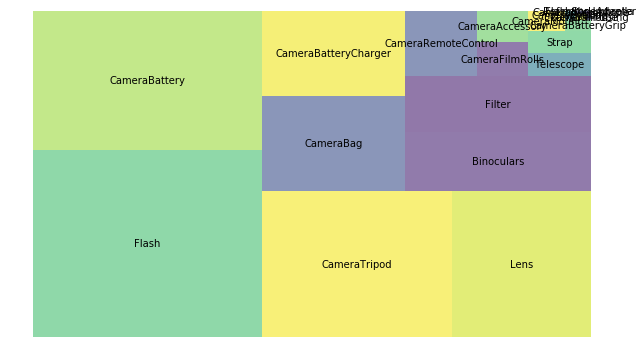

In [81]:
import squarify
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

#### As we see the highest sold item is Flash followed by Camera Battery and Camera Tripod

In [82]:
# Creating KPIs for product analytical vertical
prd_vert_GA = gaming_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
GA_prdvr_KPI = prd_vert_GA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")
cols = GA_prdvr_KPI.columns
GA_prdvr_KPI[cols] = GA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
gaming_data_with_KPIs = gaming_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)


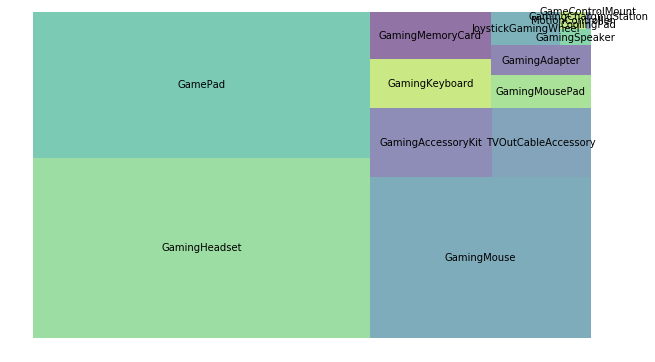

In [83]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_GA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

#### As we see the highest sold item is Gaming Headset followed by Game Pad and Gaming Mouse

In [84]:
# Creating KPIs for product analytical vertical
prd_vert_HA = homeaudio_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
HA_prdvr_KPI = prd_vert_HA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = HA_prdvr_KPI.columns
HA_prdvr_KPI[cols] = HA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
homeaudio_data_with_KPIs = homeaudio_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

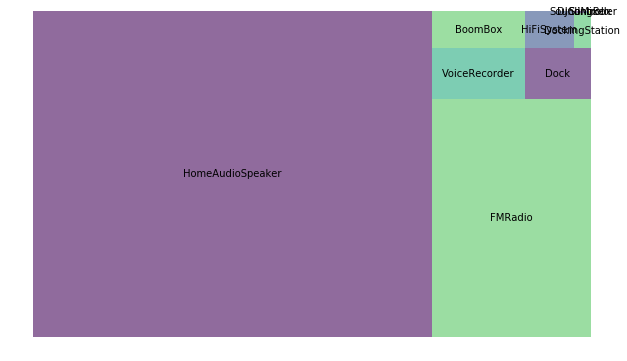

In [85]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_HA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

#### As we see the highest sold item isHome Audio Speaker followed by FMRadio & VoiceRecorder

**KPI 7 : Product Premiumness**

In [86]:
def createProductPremiumness(df,cut_off):
    df['premium_product'] = df['gmv'].apply(lambda  x:1 if (x >cut_off) else 0)
    return df

In [87]:
camera_data_with_KPIs['gmv'].describe()

count    199598.00000
mean        648.75979
std         781.57022
min          10.00000
25%         248.00000
50%         349.00000
75%         739.00000
max        6078.00000
Name: gmv, dtype: float64

**Therefore the cut-off value for camera acccessory is 739(75% percentile)**

In [88]:
camera_data_with_KPIs = createProductPremiumness(camera_data_with_KPIs,739.0)

In [89]:
camera_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
2  2015-10-20  2015     10  2421912925714800  1990.0      1   
3  2015-10-14  2015     10  4416592101738400  1690.0      1   
4  2015-10-17  2015     10  4419525153426400  1618.0      1   
5  2015-10-17  2015     10  3419188825145600  3324.0      1   
6  2015-10-16  2015     10  3418428515041500  3695.0      1   

  s1_fact.order_payment_type  sla               cust_id  product_mrp  \
2                        COD   10  -1040442942046599936         2099   
3                    Prepaid    4  -7604960843527140352         2099   
4                    Prepaid    6   2894557208345299968         2099   
5                    Prepaid    5  -7641546361891739648         4044   
6                    Prepaid    6    -71561404148106600         4044   

   product_procurement_sla      order_datetime  order_week  \
2                        3 2015-10-20 15:45:56          43   
3                        3 2015-10-14 12:05:15          42   
4                        3 2015-10-17 21:25:03          42   
5                        5 2015-10-17 12:07:24          42   
6                        5 2015-10-16 14:59:57          42   

   payment_mode_indicator  selling_price  discount  premium_product  
2                       0         1990.0      0.05                1  
3                       1         1690.0      0.19                1  
4                       1         1618.0      0.23                1  
5                       1         3324.0      0.18                1  
6                       1         3695.0      0.09                1

In [90]:
gaming_data_with_KPIs['gmv'].describe()

count    172870.000000
mean        649.790786
std         580.402575
min          39.000000
25%         279.000000
50%         420.000000
75%         806.000000
max        2999.000000
Name: gmv, dtype: float64

**Therefore the cut-off value for gaming accesory is 806(75% percentile)**

In [91]:
gaming_data_with_KPIs = createProductPremiumness(gaming_data_with_KPIs,806.0)

In [92]:
gaming_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
1599  2015-10-14  2015     10  1416985339691600  2750.0      1   
1600  2015-10-15  2015     10  1417669228375400  2899.0      1   
1601  2015-10-17  2015     10  1419414998353400  2609.0      1   
1602  2015-10-26  2015     10  1427167582532600  2772.0      1   
1603  2015-10-16  2015     10  4417730112316700  2750.0      1   

     s1_fact.order_payment_type  sla               cust_id  product_mrp  \
1599                        COD    7   9041577304631719936         3999   
1600                    Prepaid    5   8973831124140309504         3999   
1601                    Prepaid    5  -4824142736471789568         3999   
1602                    Prepaid    5  -3305365297260279808         3999   
1603                    Prepaid    7   2297791966161220096         3999   

      product_procurement_sla      order_datetime  order_week  \
1599                        5 2015-10-14 22:54:54          42   
1600                        5 2015-10-15 20:19:38          42   
1601                        5 2015-10-17 18:21:43          42   
1602                        5 2015-10-26 17:49:39          44   
1603                        5 2015-10-16 04:02:08          42   

      payment_mode_indicator  selling_price  discount  premium_product  
1599                       0         2750.0      0.31                1  
1600                       1         2899.0      0.28                1  
1601                       1         2609.0      0.35                1  
1602                       1         2772.0      0.31                1  
1603                       1         2750.0      0.31                1

In [93]:
homeaudio_data_with_KPIs['gmv'].describe()

count    100755.000000
mean       1881.447037
std         976.982316
min         129.000000
25%         975.000000
50%        1899.000000
75%        2525.000000
max        4704.000000
Name: gmv, dtype: float64

**Therefore the cut-off value for camera acccessory is 2525.0(75% percentile)**

In [94]:
homeaudio_data_with_KPIs = createProductPremiumness(homeaudio_data_with_KPIs,2525.0)

In [95]:
homeaudio_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
2870  2015-10-08  2015     10  1411753777965600  3700.0      1   
2871  2015-10-11  2015     10  2414104375842400  3700.0      1   
2872  2015-10-08  2015     10  4411629266828400  3700.0      1   
5960  2015-10-01  2015     10  2405684398213000  2159.0      1   
5961  2015-10-26  2015     10  3427126275487100  2159.0      1   

     s1_fact.order_payment_type  sla               cust_id  product_mrp  \
2870                        COD    3   8628124667745449984         4599   
2871                        COD    5   5684936202558919680         4599   
2872                        COD    3  -1123729755469779968         4599   
5960                    Prepaid    6   8509075186971020288         2800   
5961                        COD    5    349030327610672000         2800   

      product_procurement_sla      order_datetime  order_week  \
2870                        0 2015-10-08 21:34:04          41   
2871                        0 2015-10-11 16:54:52          41   
2872                        0 2015-10-08 18:06:04          41   
5960                        5 2015-10-01 21:02:49          40   
5961                        5 2015-10-26 16:41:40          44   

      payment_mode_indicator  selling_price  discount  premium_product  
2870                       0         3700.0      0.20                1  
2871                       0         3700.0      0.20                1  
2872                       0         3700.0      0.20                1  
5960                       1         2159.0      0.23                0  
5961                       0         2159.0      0.23                0

### KPI 8: Including NPS & Stock Index. Creating them separately & merging with 3 dataframes

In [96]:
#Reading media data from the excel file
nps_df = pd.read_excel("./Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 1).T.reset_index()

# resetting index
nps_df.reset_index(drop=True, inplace=True)

# renaming columns
nps_df.columns = ['DT', 'NPS', 'Stock Index']
nps_df

DT        NPS  Stock Index
0   July'15  54.599588       1177.0
1    Aug'15  59.987101       1206.0
2   Sept'15  46.925419       1101.0
3    Oct'15  44.398389       1210.0
4    Nov'15  47.000000       1233.0
5    Dec'15  45.800000       1038.0
6    Jan'16  47.093031       1052.0
7    Feb'16  50.327406       1222.0
8    Mar'16  49.020550       1015.0
9    Apr'16  51.827605       1242.0
10   May'16  47.306951       1228.0
11  June'16  50.516687       1194.0

In [97]:
nps_df['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_df['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]

In [98]:
nps_df.drop('DT',axis=1,inplace=True)

In [99]:
nps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
NPS            12 non-null float64
Stock Index    12 non-null float64
Year           12 non-null int64
Month          12 non-null int64
dtypes: float64(2), int64(2)
memory usage: 464.0 bytes


**Adding NPS KPI to each of the dataframes**

In [100]:
gaming_data_with_KPIs = pd.merge(nps_df,gaming_data_with_KPIs,on=['Month','Year'],how='inner')
camera_data_with_KPIs = pd.merge(nps_df,camera_data_with_KPIs,on=['Month','Year'],how='inner')
homeaudio_data_with_KPIs = pd.merge(nps_df,homeaudio_data_with_KPIs,on=['Month','Year'],how='inner')

In [101]:
# Creating dataframes for plots for each of the category
GamingAccessory_data_with_KPIs_for_plot = gaming_data_with_KPIs
GamingAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Gaming Accessory"
CameraAccessory_data_with_KPIs_for_plot = camera_data_with_KPIs
CameraAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Camera Accessory"
HomeAudio_data_with_KPIs_for_plot = homeaudio_data_with_KPIs
HomeAudio_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Home Audio"

all_data_with_kpi = pd.concat([GamingAccessory_data_with_KPIs_for_plot, CameraAccessory_data_with_KPIs_for_plot, HomeAudio_data_with_KPIs_for_plot], axis = 0)

In [102]:
all_data_with_kpi.head()

NPS  Stock Index  Year  Month  order_date   order_id     gmv  units  \
0  54.599588       1177.0  2015      7  2015-07-10  169460596  2800.0      1   
1  54.599588       1177.0  2015      7  2015-07-20  173845985  2700.0      1   
2  54.599588       1177.0  2015      7  2015-07-26  176570219  2679.0      1   
3  54.599588       1177.0  2015      7  2015-07-08  168513415  2789.0      1   
4  54.599588       1177.0  2015      7  2015-07-17  172787973  2884.0      1   

  s1_fact.order_payment_type  sla               cust_id  product_mrp  \
0                    Prepaid    9   8996931547933859840         3999   
1                        COD    7   1095002556734790016         3999   
2                    Prepaid    5  -8900627232445830144         3999   
3                    Prepaid    7   6515060272718419968         3999   
4                        COD    6  -7661168602558889984         3999   

   product_procurement_sla      order_datetime  order_week  \
0                        5 2015-07-10 22:22:38          28   
1                        5 2015-07-20 09:47:28          30   
2                        5 2015-07-26 20:26:01          30   
3                        5 2015-07-08 23:17:31          28   
4                        5 2015-07-17 20:47:03          29   

   payment_mode_indicator  selling_price  discount  premium_product  \
0                       1         2800.0      0.30                1   
1                       0         2700.0      0.32                1   
2                       1         2679.0      0.33                1   
3                       1         2789.0      0.30                1   
4                       0         2884.0      0.28                1   

  product_analytic_sub_category  
0              Gaming Accessory  
1              Gaming Accessory  
2              Gaming Accessory  
3              Gaming Accessory  
4              Gaming Accessory

### Weekly Agrregation of Data

### Gaming Accessory

In [103]:
#GamingAccessory Data - Aggregating weekly some features being summed up & for some taking mean
GamingAccessory_data_sum = gaming_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
GamingAccessory_data_mean = gaming_data_with_KPIs[['sla','product_procurement_sla','order_week',
                                                            'product_mrp','selling_price',"NPS",'discount',]].groupby('order_week').mean()
GamingAccessory_data_count = gaming_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})

final_gaming_data = pd.concat([GamingAccessory_data_sum, GamingAccessory_data_mean,GamingAccessory_data_count], axis = 1).reset_index()

In [104]:
#Merging with the weekly aggregate collumns
final_gaming_data = pd.merge(final_gaming_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_gaming_data.head()

order_week           gmv  units       sla  product_procurement_sla  \
0          27  2.234400e+04     24  3.458333                 3.208333   
1          28  1.931187e+06   2791  5.367141                 3.238024   
2          29  1.614474e+06   2714  5.268874                 2.715785   
3          30  1.748798e+06   2240  5.453665                 2.589212   
4          31  1.336692e+06   1636  5.696372                 3.225334   

   product_mrp  selling_price        NPS  discount  total_transactions  \
0  3504.125000     931.000000  54.599588  0.316250                  24   
1  1682.665793     702.495135  54.599588  0.419663                2672   
2  1646.805006     639.854000  54.599588  0.450262                2477   
3  2144.942370     793.871139  54.599588  0.396985                2169   
4  5294.440484     832.935710  54.603017  0.462120                1571   

   total_premiumness  total_holidays  is_holiday  total_special_sale_days  \
0                 24             1.0         1.0                      0.0   
1               2672             0.0         0.0                      0.0   
2               2477             0.0         0.0                      2.0   
3               2169             0.0         0.0                      0.0   
4               1571             0.0         0.0                      0.0   

   is_special_sale_day  total_pay_days  is_pay_day  
0                  0.0             1.0         1.0  
1                  0.0             0.0         0.0  
2                  1.0             1.0         1.0  
3                  0.0             0.0         0.0  
4                  0.0             1.0         1.0

In [105]:
#Merging with Product Analytical Vertical KPI
final_gaming_data = pd.merge(final_gaming_data,GA_prdvr_KPI,on=['order_week'],how='left')
final_gaming_data.shape

(53, 32)

In [106]:
final_gaming_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

### Camera Accessory

In [107]:
#Camera data  - Aggregating weekly some features being summed up & for some taking mean
CameraAccessory_data_sum = camera_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
CameraAccessory_data_mean = camera_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('order_week').mean()
CameraAccessory_data_count = camera_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})
final_camera_data = pd.concat([CameraAccessory_data_sum, CameraAccessory_data_mean,CameraAccessory_data_count], axis = 1).reset_index()

In [108]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_camera_data = pd.merge(final_camera_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_camera_data.shape

(52, 17)

In [109]:
#Merging with Product Analytical Vertical KPI
final_camera_data = pd.merge(final_camera_data,CA_prdvr_KPI,on=['order_week'],how='left')
final_camera_data.shape

(52, 39)

In [110]:
final_camera_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

### Home Audio

In [111]:
# Home Audio data
HomeAudio_data_sum = homeaudio_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
HomeAudio_data_mean = homeaudio_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp','selling_price','discount','NPS']].groupby('order_week').mean()
HomeAudio_data_count = homeaudio_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})
final_home_audio_data = pd.concat([HomeAudio_data_sum, HomeAudio_data_mean,HomeAudio_data_count], axis = 1).reset_index()

In [112]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_home_audio_data = pd.merge(final_home_audio_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_home_audio_data.shape

(50, 17)

In [113]:
#Merging with Product Analytical Vertical KPI
final_home_audio_data = pd.merge(final_home_audio_data,HA_prdvr_KPI,on=['order_week'],how='left')
final_home_audio_data.shape

(50, 27)

In [114]:
final_home_audio_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [115]:
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 32)
Shape of Camera Accessory DF (52, 39)
Shape of Home Audio DF (50, 27)


### KPI 9: Media Investment data - Creating separately & merging with the 3 dataframes of each category

In [116]:
# Reading the media data from the provided file
media_investment = pd.read_excel("./Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

Year  Month  Total Investment         TV    Digital  Sponsorship  \
NaN  2015.0    7.0         17.061775   0.215330   2.533014     7.414270   
NaN  2015.0    8.0          5.064306   0.006438   1.278074     1.063332   
NaN  2015.0    9.0         96.254380   3.879504   1.356528    62.787651   
NaN  2015.0   10.0        170.156297   6.144711  12.622480    84.672532   
NaN  2015.0   11.0         51.216220   4.220630   1.275469    14.172116   
NaN  2015.0   12.0        106.745312   5.397502   3.063360    56.705419   
NaN  2016.0    1.0         74.196000   4.380000   0.456000     4.200000   
NaN  2016.0    2.0         48.052000   2.586008   1.912651    11.725555   
NaN  2016.0    3.0        100.024621   9.300000   2.100000    41.590000   
NaN  2016.0    4.0         56.848241   5.205196   0.871892    24.308354   
NaN  2016.0    5.0         78.057000   1.370000   0.770000    31.680000   
NaN  2016.0    6.0         42.834216   1.662717   1.420761    25.048541   
NaN     NaN    NaN               NaN        NaN        NaN          NaN   
NaN     NaN    NaN               NaN        NaN        NaN          NaN   
NaN     NaN    NaN               NaN        NaN        NaN          NaN   
NaN     NaN    NaN               NaN  18.549000        NaN          NaN   

     Content Marketing  Online marketing   Affiliates        SEM  Radio  \
NaN           0.000933          1.327278     0.547254   5.023697    NaN   
NaN           0.000006          0.129244     0.073684   2.513528    NaN   
NaN           0.610292         16.379990     5.038266   6.202149    NaN   
NaN           3.444075         24.371778     6.973711  31.927011    NaN   
NaN           0.168633         19.561574     6.595767   5.222032    NaN   
NaN           1.067307         22.503756     6.826938  11.181030    NaN   
NaN           0.900000         22.900000     7.370000   4.200000   2.70   
NaN           0.596771         19.892366     6.465019   4.873630    NaN   
NaN           0.370000         18.437818     6.217667   5.193591   0.87   
NaN           0.034876         16.514510     5.693456   4.219958    NaN   
NaN           0.790000         23.650000     6.800000   6.910000   1.10   
NaN           0.045081          7.971300     2.768023   3.735516    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   

         Other  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN  27.090000  
NaN        NaN  
NaN  15.945545  
NaN        NaN  
NaN   4.987000  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN

In [117]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [118]:
#Converting columns year & month in int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [119]:
#Filling NaN values as 0 assuming that the investment done in respective area was 0
media_investment  = media_investment.fillna(0)

In [120]:
#Checking the final media_investment DF
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6   27.090000  
7    0.000000  
8   15.945545  
9    0.000000  
10   4.987000  
11   0.000000

In [121]:
#Creating a mapping of the Months & no of weeks in order to find the media data weekly for each of the months
number_of_weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
number_of_weeks_df = pd.DataFrame(number_of_weeks)
number_of_weeks_df

Month  number_of_weeks
0       1                4
1       2                4
2       3                5
3       4                4
4       5                4
5       6                5
6       7                4
7       8                4
8       9                5
9      10                4
10     11                4
11     12                5

In [122]:
#Merging the media_investment data with DF containing the mapping of months & no of weeks in that month
media_investment = pd.merge(media_investment,number_of_weeks_df, on = 'Month', how = 'inner')
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  number_of_weeks  
0    0.000000                4  
1    0.000000                4  
2    0.000000                5  
3    0.000000                4  
4    0.000000                4  
5    0.000000                5  
6   27.090000                4  
7    0.000000                4  
8   15.945545                5  
9    0.000000                4  
10   4.987000                4  
11   0.000000                5

In [123]:
# Calculating the final media_investments weekly by dividing the value in a month with the respecitve number_of_weeks in the month
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [124]:
# Checking the media investment data
media_investment

Year  Month  Total Investment        TV   Digital  Sponsorship  \
0   2015      7         17.061775  0.053833  0.633253     1.853567   
1   2015      8          5.064306  0.001610  0.319518     0.265833   
2   2015      9         96.254380  0.775901  0.271306    12.557530   
3   2015     10        170.156297  1.536178  3.155620    21.168133   
4   2015     11         51.216220  1.055157  0.318867     3.543029   
5   2015     12        106.745312  1.079500  0.612672    11.341084   
6   2016      1         74.196000  1.095000  0.114000     1.050000   
7   2016      2         48.052000  0.646502  0.478163     2.931389   
8   2016      3        100.024621  1.860000  0.420000     8.318000   
9   2016      4         56.848241  1.301299  0.217973     6.077088   
10  2016      5         78.057000  0.342500  0.192500     7.920000   
11  2016      6         42.834216  0.332543  0.284152     5.009708   

    Content Marketing  Online marketing   Affiliates       SEM  Radio  \
0            0.000233          0.331819     0.136813  1.255924  0.000   
1            0.000002          0.032311     0.018421  0.628382  0.000   
2            0.122058          3.275998     1.007653  1.240430  0.000   
3            0.861019          6.092944     1.743428  7.981753  0.000   
4            0.042158          4.890394     1.648942  1.305508  0.000   
5            0.213461          4.500751     1.365388  2.236206  0.000   
6            0.225000          5.725000     1.842500  1.050000  0.675   
7            0.149193          4.973092     1.616255  1.218407  0.000   
8            0.074000          3.687564     1.243533  1.038718  0.174   
9            0.008719          4.128627     1.423364  1.054990  0.000   
10           0.197500          5.912500     1.700000  1.727500  0.275   
11           0.009016          1.594260     0.553605  0.747103  0.000   

       Other  number_of_weeks  
0   0.000000                4  
1   0.000000                4  
2   0.000000                5  
3   0.000000                4  
4   0.000000                4  
5   0.000000                5  
6   6.772500                4  
7   0.000000                4  
8   3.189109                5  
9   0.000000                4  
10  1.246750                4  
11  0.000000                5

In [125]:
# Getting unique order_week, month & year present in the original DF
order_week_data = consumer_electronics_df[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week_data = order_week_data.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week_data

order_week  Month  Year
53          27      7  2015
51          28      7  2015
49          29      7  2015
52          30      7  2015
55          31      8  2015
60          32      8  2015
61          33      8  2015
62          34      8  2015
15          35      8  2015
58          36      9  2015
54          37      9  2015
57          38      9  2015
56          39      9  2015
4           40     10  2015
2           41     10  2015
1           42     10  2015
0           43     10  2015
22          44     11  2015
5           45     11  2015
19          46     11  2015
10          47     11  2015
21          48     11  2015
23          49     12  2015
24          50     12  2015
26          51     12  2015
27          52     12  2015
28          53     12  2015
31          54      1  2016
12          55      1  2016
16          56      1  2016
33          57      1  2016
25          58      2  2016
34          59      2  2016
17          60      2  2016
8           61      2  2016
32          62      3  2016
7           63      3  2016
13          64      3  2016
37          65      3  2016
14          66      4  2016
11          67      4  2016
35          68      4  2016
6           69      4  2016
40          70      5  2016
38          71      5  2016
39          72      5  2016
43          73      5  2016
41          74      5  2016
45          75      6  2016
44          76      6  2016
46          77      6  2016
47          78      6  2016
48          79      6  2016

In [126]:
# Merging the media_investment_data with the order_week_data to add order_week into this DF for final merging with other DF containing the KPIs
media_investment_weekly = pd.merge(order_week_data, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

order_week  Month  Year  Total Investment        TV   Digital  Sponsorship  \
0          27      7  2015         17.061775  0.053833  0.633253     1.853567   
1          28      7  2015         17.061775  0.053833  0.633253     1.853567   
2          29      7  2015         17.061775  0.053833  0.633253     1.853567   
3          30      7  2015         17.061775  0.053833  0.633253     1.853567   
4          31      8  2015          5.064306  0.001610  0.319518     0.265833   

   Content Marketing  Online marketing   Affiliates       SEM  Radio  Other  
0           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
1           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
2           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
3           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
4           0.000002          0.032311     0.018421  0.628382    0.0    0.0

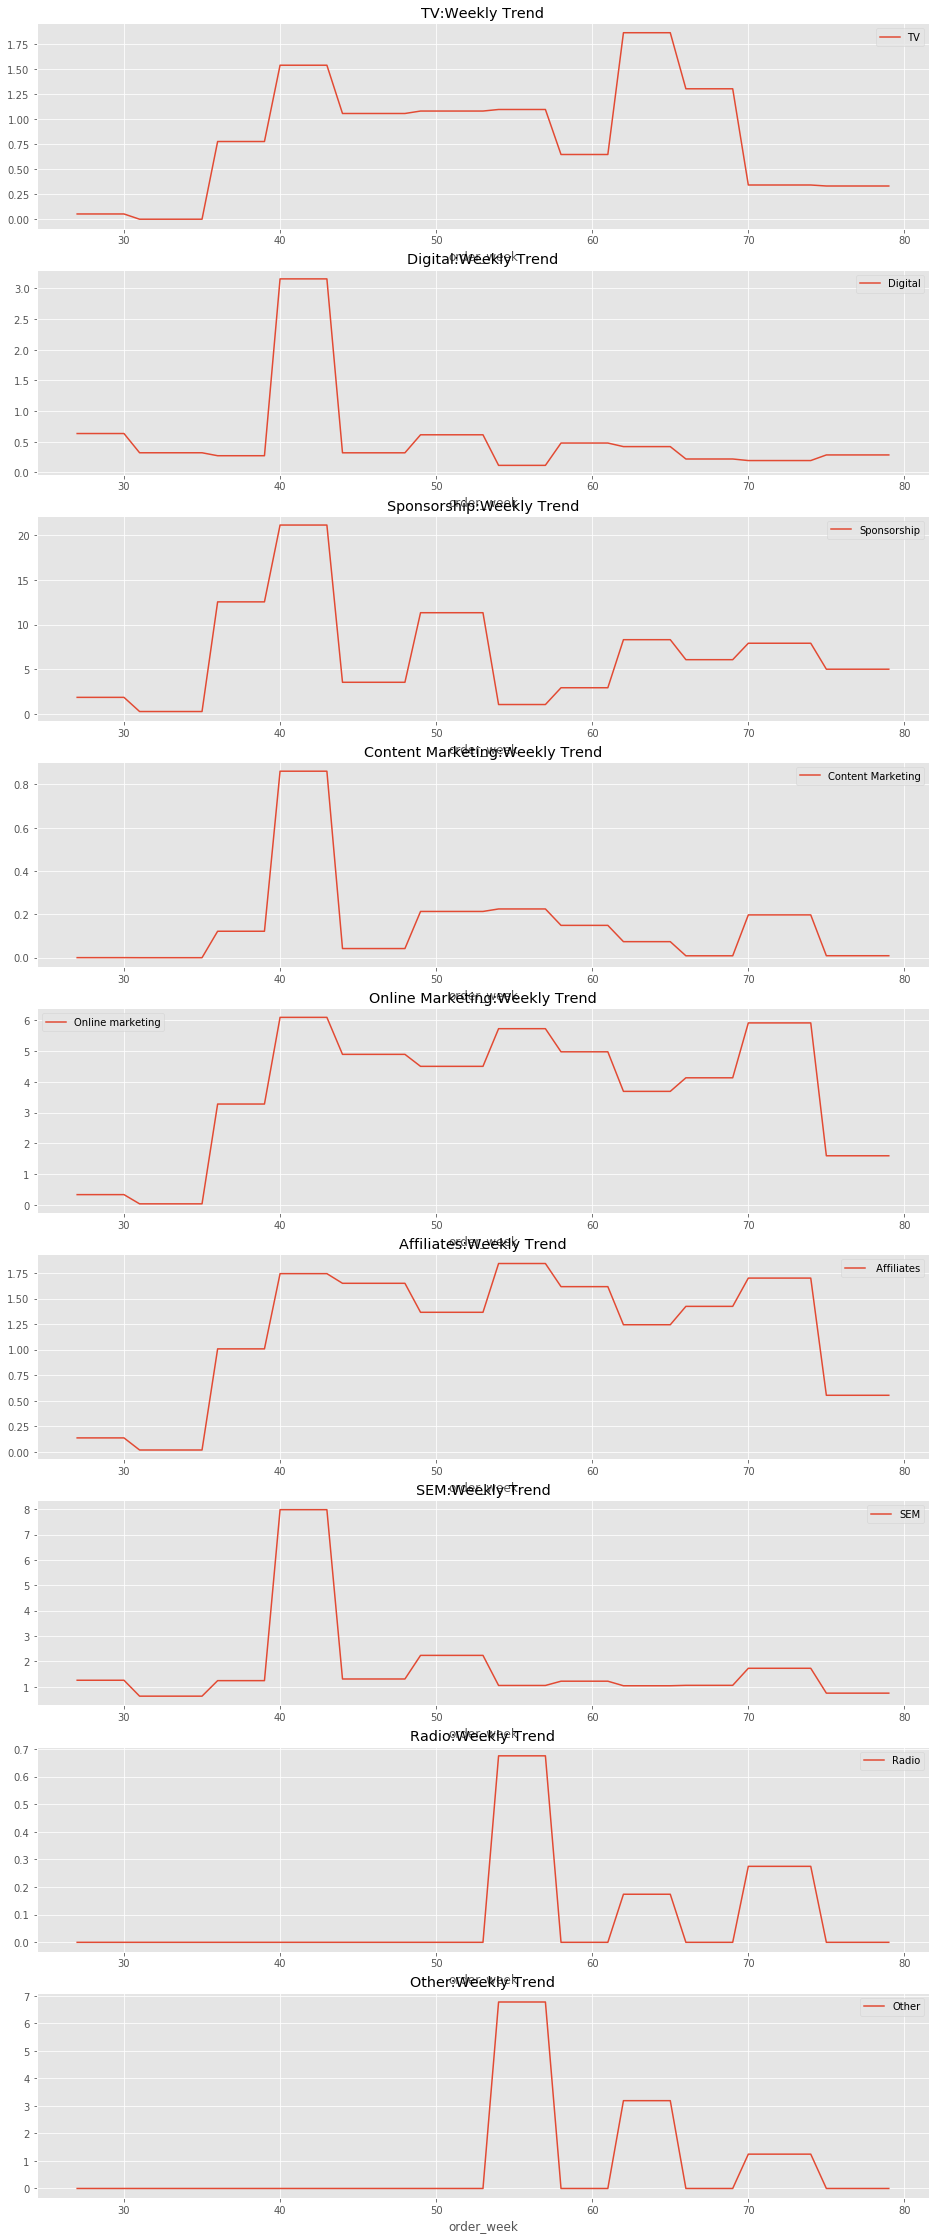

In [127]:
# Lets Analyze the Weekly Spends on different channels
fig = plt.figure(figsize=(16,40))

ax1 = fig.add_subplot(911)
ax1.set_title('TV:Weekly Trend')
ax2 = fig.add_subplot(912)
ax2.set_title('Digital:Weekly Trend')
ax3 = fig.add_subplot(913)
ax3.set_title('Sponsorship:Weekly Trend')
ax4 = fig.add_subplot(914)
ax4.set_title('Content Marketing:Weekly Trend')
ax5 = fig.add_subplot(915)
ax5.set_title('Online Marketing:Weekly Trend')
ax6 = fig.add_subplot(916)
ax6.set_title('Affiliates:Weekly Trend')
ax7 = fig.add_subplot(917)
ax7.set_title('SEM:Weekly Trend')
ax8 = fig.add_subplot(918)
ax8.set_title('Radio:Weekly Trend')
ax9 = fig.add_subplot(919)
ax9.set_title('Other:Weekly Trend')

media_investment_weekly.plot(x= 'order_week',y=['TV'],ax = ax1)
media_investment_weekly.plot(x= 'order_week',y=['Digital'],ax = ax2)
media_investment_weekly.plot(x= 'order_week',y=['Sponsorship'],ax = ax3)
media_investment_weekly.plot(x= 'order_week',y=['Content Marketing'],ax = ax4)
media_investment_weekly.plot(x= 'order_week',y=['Online marketing'],ax = ax5)
media_investment_weekly.plot(x= 'order_week',y=[' Affiliates'],ax = ax6)
media_investment_weekly.plot(x= 'order_week',y=['SEM'],ax = ax7)
media_investment_weekly.plot(x= 'order_week',y=['Radio'],ax = ax8)
media_investment_weekly.plot(x= 'order_week',y=['Other'],ax = ax9)

#### The maximum investments are done between week 39-45 for most channels & maximum investment was done through Sponsorship media

**KPI 9 : Adstock creation**
**Fucntion to create adstocks** 

In [128]:
def getAdStockValue(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [129]:
#Creating adstocks for each of the investments by calling the above created function
adStock_TV = getAdStockValue(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockValue(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockValue(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockValue(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockValue(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockValue(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockValue(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockValue(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockValue(media_investment_weekly[['Other','order_week']],"Other", 0.5)

In [130]:
# Concatenating all individual adstocks to form the final DF containing all the adstock data
all_adstock = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [131]:
#Exploring first few rows
all_adstock.head()

adStock_TV  adStock_Digital  adStock_Sponsorship  \
0    0.053833         0.633253             1.853567   
1    0.080749         0.949880             2.780351   
2    0.094207         1.108193             3.243743   
3    0.100936         1.187350             3.475439   
4    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  order_week  adStock_Other  
0     1.255924            0.0          27            0.0  
1     1.883887            0.0          28            0.0  
2     2.197868            0.0          29            0.0  
3     2.354858            0.0          30            0.0  
4     1.805811            0.0          31            0.0

**Merging the adstock data with the media investment data on order week**

In [132]:
final_adstock_data = pd.merge(media_investment_weekly,all_adstock, on = "order_week", how = 'inner')

In [133]:
final_adstock_data

order_week  Month  Year  Total Investment        TV   Digital  \
0           27      7  2015         17.061775  0.053833  0.633253   
1           28      7  2015         17.061775  0.053833  0.633253   
2           29      7  2015         17.061775  0.053833  0.633253   
3           30      7  2015         17.061775  0.053833  0.633253   
4           31      8  2015          5.064306  0.001610  0.319518   
5           32      8  2015          5.064306  0.001610  0.319518   
6           33      8  2015          5.064306  0.001610  0.319518   
7           34      8  2015          5.064306  0.001610  0.319518   
8           35      8  2015          5.064306  0.001610  0.319518   
9           36      9  2015         96.254380  0.775901  0.271306   
10          37      9  2015         96.254380  0.775901  0.271306   
11          38      9  2015         96.254380  0.775901  0.271306   
12          39      9  2015         96.254380  0.775901  0.271306   
13          40     10  2015        170.156297  1.536178  3.155620   
14          41     10  2015        170.156297  1.536178  3.155620   
15          42     10  2015        170.156297  1.536178  3.155620   
16          43     10  2015        170.156297  1.536178  3.155620   
17          44     11  2015         51.216220  1.055157  0.318867   
18          45     11  2015         51.216220  1.055157  0.318867   
19          46     11  2015         51.216220  1.055157  0.318867   
20          47     11  2015         51.216220  1.055157  0.318867   
21          48     11  2015         51.216220  1.055157  0.318867   
22          49     12  2015        106.745312  1.079500  0.612672   
23          50     12  2015        106.745312  1.079500  0.612672   
24          51     12  2015        106.745312  1.079500  0.612672   
25          52     12  2015        106.745312  1.079500  0.612672   
26          53     12  2015        106.745312  1.079500  0.612672   
27          54      1  2016         74.196000  1.095000  0.114000   
28          55      1  2016         74.196000  1.095000  0.114000   
29          56      1  2016         74.196000  1.095000  0.114000   
30          57      1  2016         74.196000  1.095000  0.114000   
31          58      2  2016         48.052000  0.646502  0.478163   
32          59      2  2016         48.052000  0.646502  0.478163   
33          60      2  2016         48.052000  0.646502  0.478163   
34          61      2  2016         48.052000  0.646502  0.478163   
35          62      3  2016        100.024621  1.860000  0.420000   
36          63      3  2016        100.024621  1.860000  0.420000   
37          64      3  2016        100.024621  1.860000  0.420000   
38          65      3  2016        100.024621  1.860000  0.420000   
39          66      4  2016         56.848241  1.301299  0.217973   
40          67      4  2016         56.848241  1.301299  0.217973   
41          68      4  2016         56.848241  1.301299  0.217973   
42          69      4  2016         56.848241  1.301299  0.217973   
43          70      5  2016         78.057000  0.342500  0.192500   
44          71      5  2016         78.057000  0.342500  0.192500   
45          72      5  2016         78.057000  0.342500  0.192500   
46          73      5  2016         78.057000  0.342500  0.192500   
47          74      5  2016         78.057000  0.342500  0.192500   
48          75      6  2016         42.834216  0.332543  0.284152   
49          76      6  2016         42.834216  0.332543  0.284152   
50          77      6  2016         42.834216  0.332543  0.284152   
51          78      6  2016         42.834216  0.332543  0.284152   
52          79      6  2016         42.834216  0.332543  0.284152   

    Sponsorship  Content Marketing  Online marketing   Affiliates  \
0      1.853567           0.000233          0.331819     0.136813   
1      1.853567           0.000233          0.331819     0.136813   
2      1.853567           0.000233          0.331819     0.136813   
3

In [134]:
final_adstock_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

In [135]:
#Checking the first few rows
final_adstock_data.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other  
0     1.255924            0.0            0.0  
1     1.883887            0.0            0.0  
2     2.197868            0.0            0.0  
3     2.354858            0.0            0.0  
4     1.805811            0.0            0.0

**Let's now visualise the correlations b/w the adstocks to check for colinearity**

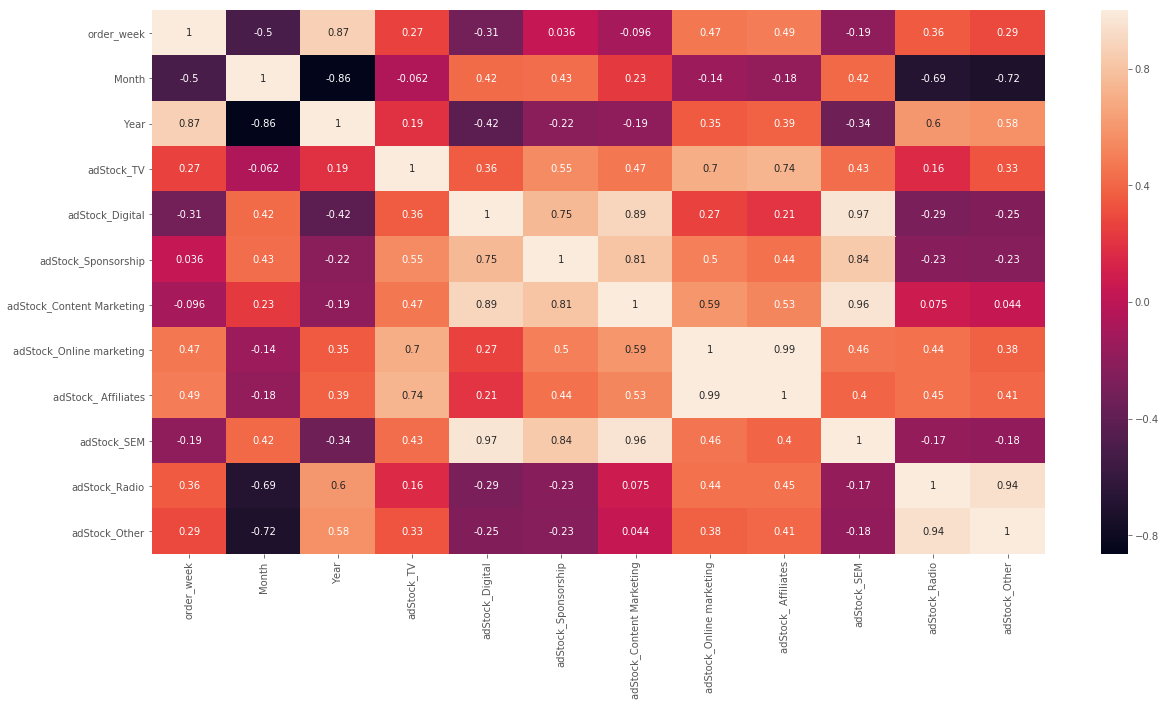

In [136]:

plt.figure(figsize = (20,10))
sns.heatmap(final_adstock_data.corr(), annot = True)

**As we see above, there is high correlation b/w**

- order_week & month, year & month, order_week & year
- adStock_Affiliates & adStock_Online marketing
- adStock_Other & adStock_Radio
- adStock_Digital & adStock_SEM
- adStock_Content Marketing & adStock_SEM
- Month & adstock_radio, Month & adstock_others
- adStock_TV & adStock_affiliates
- adStock_Sponsorship & adStock_Content Marketing

In [137]:
#Preparing final_data for 3 categories by adding the adstock data
final_camera_data = pd.merge(final_adstock_data,final_camera_data, on = "order_week", how = 'right')
final_gaming_data = pd.merge(final_adstock_data,final_gaming_data, on = "order_week", how = 'right')
final_home_audio_data = pd.merge(final_adstock_data,final_home_audio_data, on = "order_week", how = 'right')

In [138]:
#Checking the shape of the final dataframes
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 43)
Shape of Camera Accessory DF (52, 50)
Shape of Home Audio DF (50, 38)


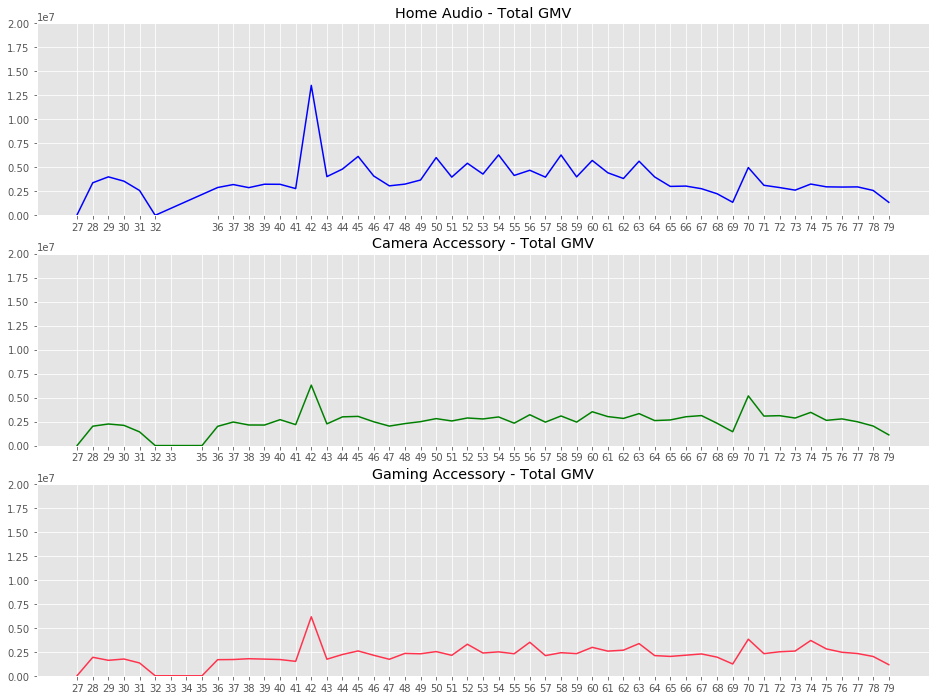

In [139]:
## Total GMV vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,20000000)
ax1 = plt.title('Home Audio - Total GMV')
ax1 = plt.plot(final_home_audio_data['order_week'],final_home_audio_data['gmv'],color='blue')
plt.xticks(final_home_audio_data['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,20000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['gmv'],color='g')
plt.xticks(final_camera_data['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,20000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['gmv'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()


#### Highest GMV seems to be around week 42 for all categories with the maximum gmv for HomeAudio

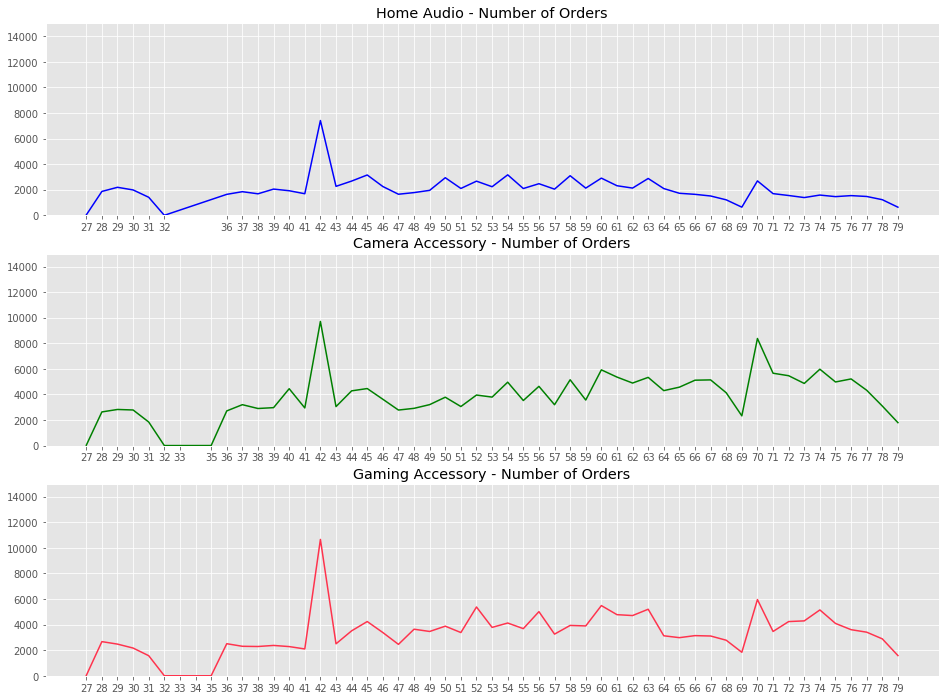

In [140]:
## No of Orders vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,15000)
ax1 = plt.title('Home Audio - Number of Orders')
ax1 = plt.plot(final_home_audio_data['order_week'],final_home_audio_data['total_transactions'],color='blue')
plt.xticks(final_home_audio_data['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,15000)
ax2 = plt.title('Camera Accessory - Number of Orders')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['total_transactions'],color='g')
plt.xticks(final_camera_data['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,15000)
ax3 = plt.title('Gaming Accessory - Number of Orders')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['total_transactions'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()

#### Highest number of transactions are around week 42 with maximum transactions for Gaming Accessory

In [141]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].mean().reset_index()

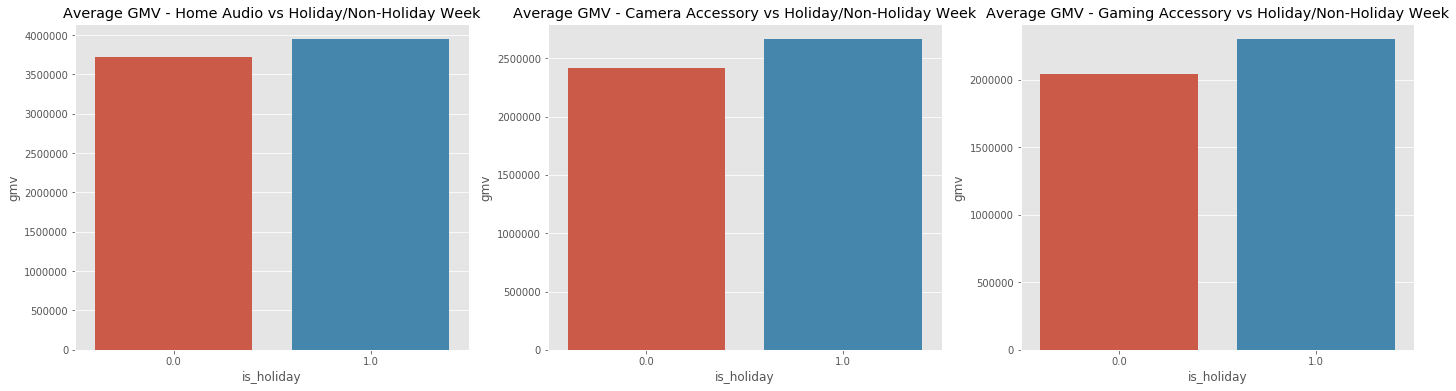

In [142]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

In [143]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].sum().reset_index()

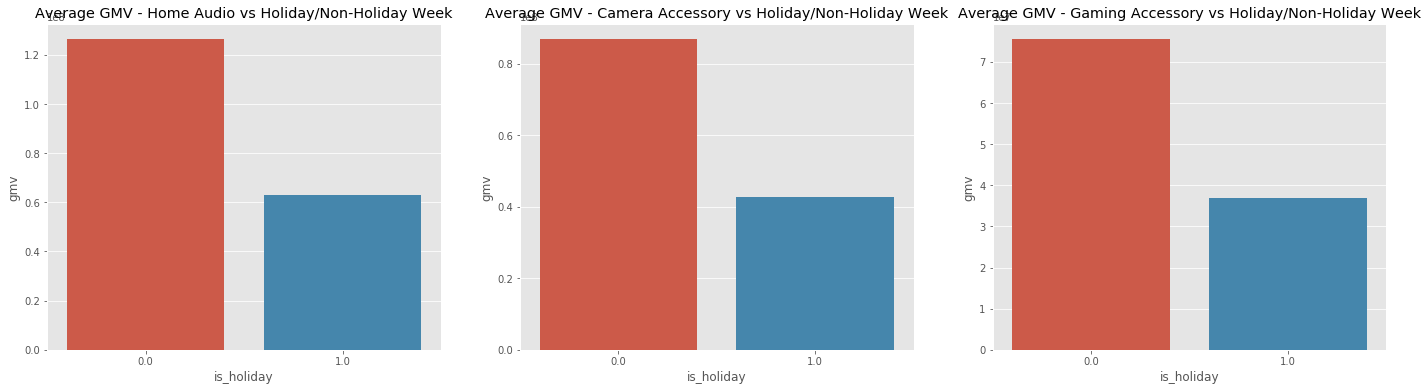

In [144]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

#### From the above two graphs(mean and sum), overall, total gmv on weeks without holidays is more, however mean_gmv for weeks with holiday is higher.


In [145]:
## Speacial Sale week vs Average GMV
Special_week_sale_HA = final_home_audio_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_CA = final_camera_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_GA = final_gaming_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()

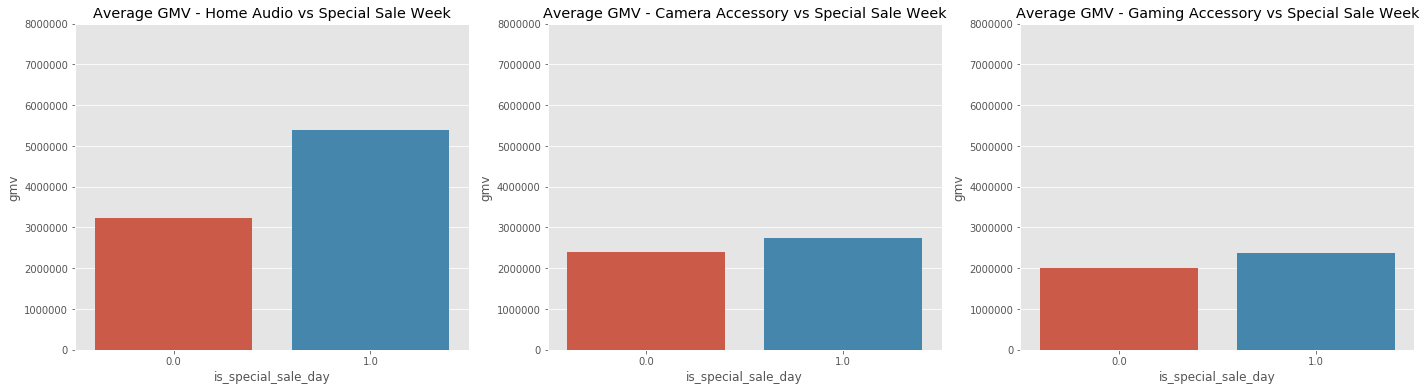

In [146]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Special Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Special Sale Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Special Sale Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Special Sale Week")

plt.show()

In [147]:
## Pay day week vs Average GMV
PayDay_week_sale_HA = final_home_audio_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].mean().reset_index()

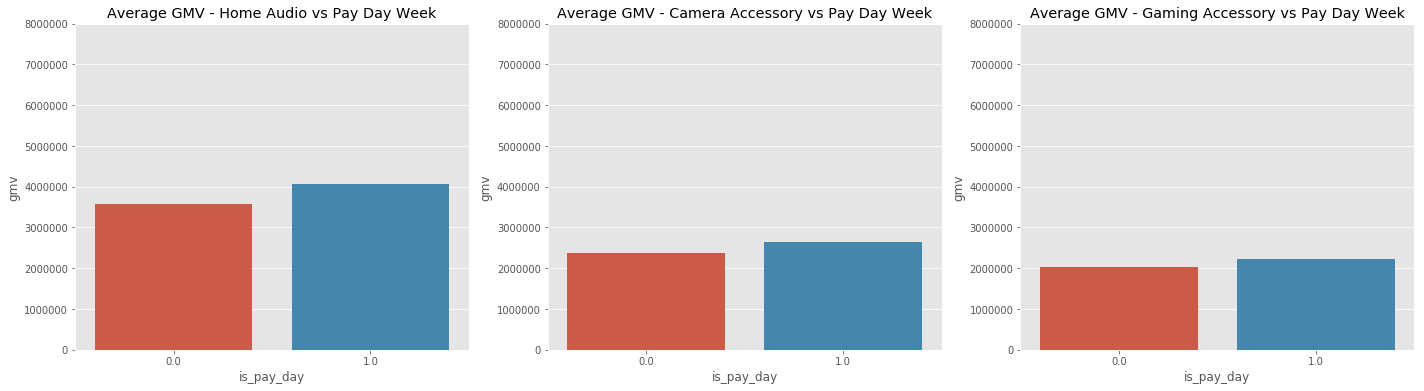

In [148]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Pay Day Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Pay Day Week")

# subplot 3: Average GMV - Camera Accessory vs Pay Day Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Pay Day Week")

# subplot 5: Average GMV - Gaming Accessory vs Pay Day Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Pay Day Week")

plt.show()

In [149]:
## Pay Day week vs Total GMV
PayDay_week_sale_HA = final_home_audio_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].sum().reset_index()

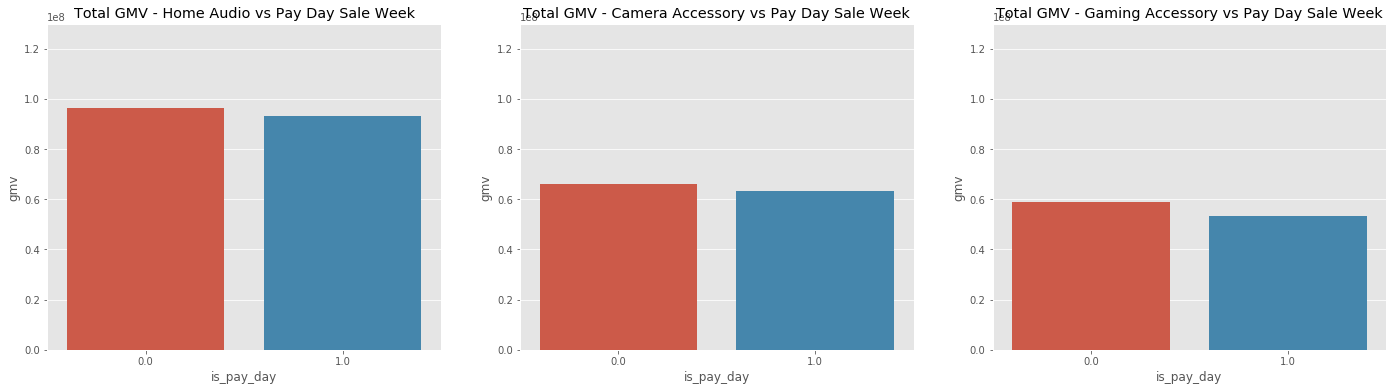

In [150]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Total GMV - Home Audio vs Pay Day Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,130000000)
ax1 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Total GMV - Home Audio vs Pay Day Sale Week")

# subplot 3: Total GMV - Camera Accessory vs Pay Day Sale Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,130000000)
ax2 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Total GMV - Camera Accessory vs Pay Day Sale Week")

# subplot 5: Total GMV - Gaming Accessory vs Pay Day Sale Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,130000000)
ax3 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Total GMV - Gaming Accessory vs Pay Day Sale Week")

plt.show()

#### From the above two graphs(mean and sum), overall, total gmv on weeks without holidays is more, however mean_gmv for weeks with holiday is higher

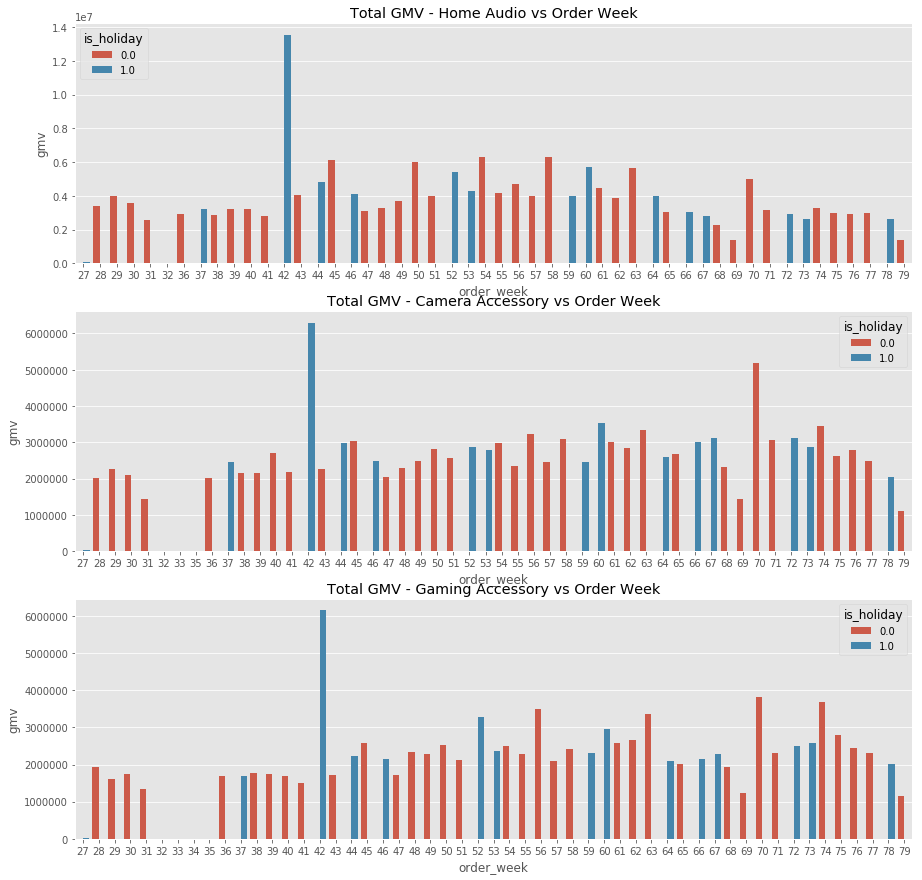

In [151]:
#Analyzing the total gmv over the weeks based upon whether the week contained a holiday or not for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")


**Highest amoung of  sales can be seen in the 42nd week across all the 3 categories.**

**Analyzing the total gmv over the weeks based upon specialday present in week for all the three 
categories**

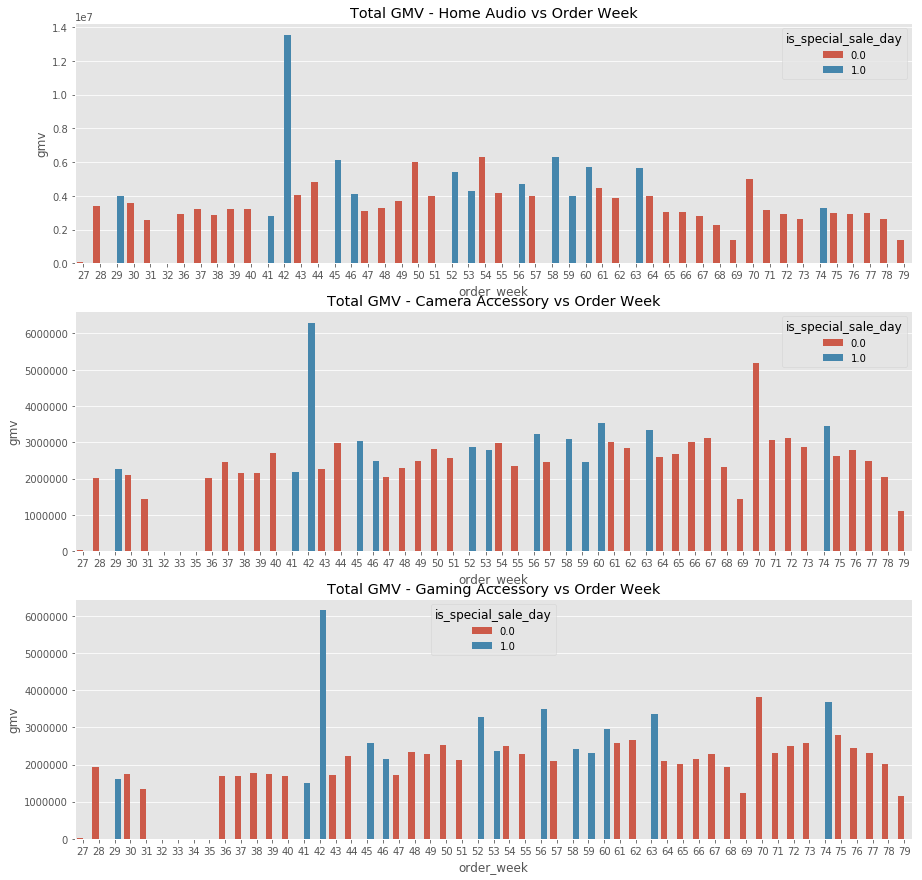

In [152]:

plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")


**Plot to see the trend b/w product_procurement_sla & NPS**

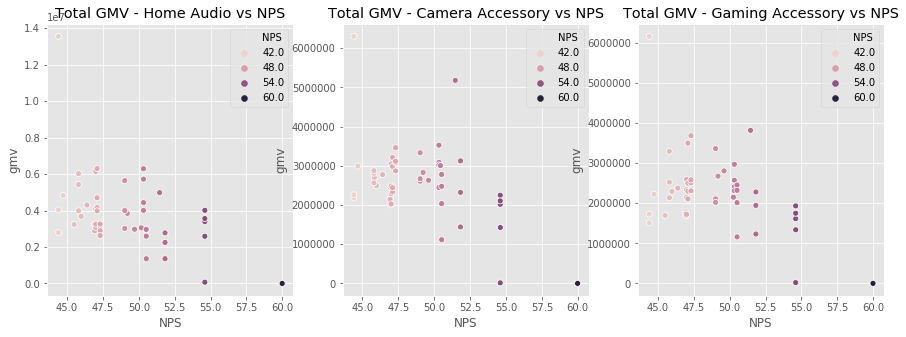

In [153]:
plt.figure(figsize = (15,5))
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_home_audio_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Home Audio vs NPS")

ax1 = plt.subplot(1, 3, 2)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_camera_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Camera Accessory vs NPS")

ax1 = plt.subplot(1, 3, 3)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_gaming_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Gaming Accessory vs NPS")


**A negative relation can be seen b/w the NPS & GMV for all the three categories**

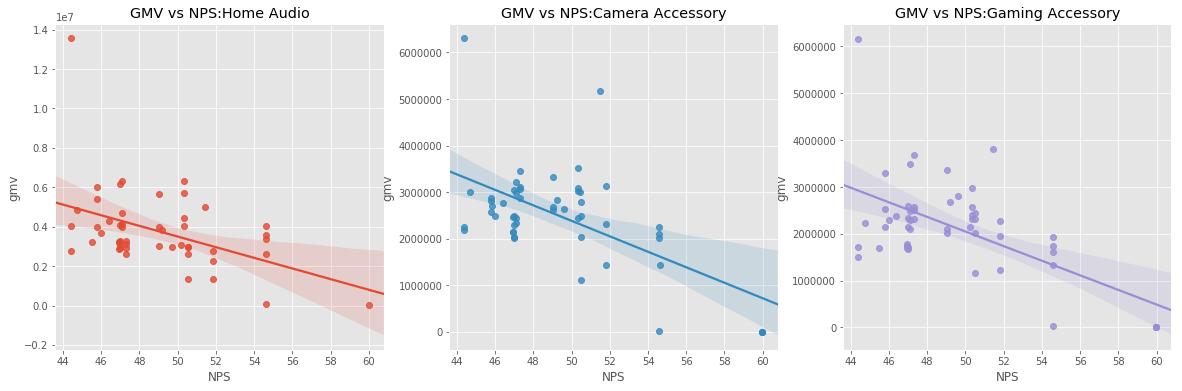

In [154]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS:Home Audio')
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS:Camera Accessory')
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS:Gaming Accessory')

sns.regplot(final_home_audio_data['NPS'],final_home_audio_data['gmv'],ax = ax1)
sns.regplot(final_camera_data['NPS'],final_camera_data['gmv'],ax = ax2)
sns.regplot(final_gaming_data['NPS'],final_gaming_data['gmv'],ax = ax3) 

##### A negative realtion can be seen b/w the NPS & GMV

### Climate Feature

In [155]:
climate_2015 = pd.read_csv('ONTARIO-2015.csv', skiprows=24)

climate_2015.head()


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2015-01-01  2015      1    1            †            0.0           NaN   
1  2015-01-02  2015      1    2            †            3.0           NaN   
2  2015-01-03  2015      1    3            †            2.5           NaN   
3  2015-01-04  2015      1    4            †            2.5           NaN   
4  2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)          ...           \
0           -8.5           NaN            -4.3          ...            
1           -3.0           NaN             0.0          ...            
2           -4.0           NaN            -0.8          ...            
3            0.0           NaN             1.3          ...            
4          -13.5           NaN           -11.8          ...            

  Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
0             0.0              NaN               0.0                NaN   
1             0.0              NaN               0.0                NaN   
2             0.0              NaN              24.0                NaN   
3             1.0              NaN               1.0                NaN   
4             3.0              NaN               3.0                NaN   

  Snow on Grnd (cm)  Snow on Grnd Flag Dir of Max Gust (10s deg)  \
0               0.0                NaN                       NaN   
1               0.0                NaN                       NaN   
2               0.0                NaN                       NaN   
3               0.0                NaN                       NaN   
4               1.0                NaN                       NaN   

   Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                   NaN                    NaN                   NaN  
1                   NaN                    NaN                   NaN  
2                   NaN                    NaN                   NaN  
3                   NaN                    NaN                   NaN  
4                   NaN                    NaN                   NaN  

[5 rows x 27 columns]

In [156]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate_2016 = pd.read_csv('ONTARIO-2016.csv', skiprows=24)

climate_2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2016-01-01  2016      1    1          NaN            NaN           NaN   
1  2016-01-02  2016      1    2          NaN            NaN           NaN   
2  2016-01-03  2016      1    3          NaN            NaN           NaN   
3  2016-01-04  2016      1    4          NaN            NaN           NaN   
4  2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)          ...           \
0            NaN           NaN             NaN          ...            
1            NaN           NaN             NaN          ...            
2            NaN           NaN             NaN          ...            
3            NaN           NaN             NaN          ...            
4            NaN           NaN             NaN          ...            

  Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
0             NaN              NaN               NaN                NaN   
1             NaN              NaN               NaN                NaN   
2             NaN              NaN               NaN                NaN   
3             NaN              NaN               NaN                NaN   
4             NaN              NaN               NaN                NaN   

  Snow on Grnd (cm)  Snow on Grnd Flag Dir of Max Gust (10s deg)  \
0               NaN                NaN                       NaN   
1               NaN                NaN                       NaN   
2               NaN                NaN                       NaN   
3               NaN                NaN                       NaN   
4               NaN                NaN                       NaN   

   Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                   NaN                    NaN                   NaN  
1                   NaN                    NaN                   NaN  
2                   NaN                    NaN                   NaN  
3                   NaN                    NaN                   NaN  
4                   NaN                    NaN                   NaN  

[5 rows x 27 columns]

In [157]:
# Dropping the columns with all nulls

climate_2015.dropna(axis=1, thresh=1, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(axis=1, thresh=1, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head(10)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2016-01-01  2016      1    1          NaN            NaN           NaN   
1  2016-01-02  2016      1    2          NaN            NaN           NaN   
2  2016-01-03  2016      1    3          NaN            NaN           NaN   
3  2016-01-04  2016      1    4          NaN            NaN           NaN   
4  2016-01-05  2016      1    5          NaN            NaN           NaN   
5  2016-01-06  2016      1    6          NaN            NaN           NaN   
6  2016-01-07  2016      1    7          NaN            NaN           NaN   
7  2016-01-08  2016      1    8            †            7.0           NaN   
8  2016-01-09  2016      1    9            †           11.0           NaN   
9  2016-01-10  2016      1   10            †           -1.5           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)        ...          \
0            NaN           NaN             NaN        ...           
1            NaN           NaN             NaN        ...           
2            NaN           NaN             NaN        ...           
3            NaN           NaN             NaN        ...           
4            NaN           NaN             NaN        ...           
5            NaN           NaN             NaN        ...           
6            NaN           NaN             NaN        ...           
7          -14.0           NaN            -3.5        ...           
8            3.0           NaN             7.0        ...           
9           -5.0           NaN            -3.3        ...           

  Cool Deg Days (°C)  Cool Deg Days Flag Total Rain (mm)  Total Rain Flag  \
0                NaN                 NaN             NaN              NaN   
1                NaN                 NaN             NaN              NaN   
2                NaN                 NaN             NaN              NaN   
3                NaN                 NaN             NaN              NaN   
4                NaN                 NaN             NaN              NaN   
5                NaN                 NaN             NaN              NaN   
6                NaN                 NaN             NaN              NaN   
7                0.0                 NaN             9.0              NaN   
8                0.0                 NaN            14.6              NaN   
9                0.0                 NaN             0.0              NaN   

  Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
0             NaN              NaN               NaN                NaN   
1             NaN              NaN               NaN                NaN   
2             NaN              NaN               NaN                NaN   
3             NaN              NaN               NaN                NaN   
4             NaN              NaN               NaN                NaN   
5             NaN              NaN               NaN                NaN   
6             NaN              NaN               NaN                NaN   
7             0.0              NaN               9.0                NaN   
8             0.0                T              14.6                NaN   
9             7.0              NaN               7.0                NaN   

  Snow on Grnd (cm)  Snow on Grnd Flag  
0               NaN                NaN  
1               NaN                NaN  
2               NaN                NaN  
3               NaN                NaN  
4               NaN                NaN  
5               NaN                NaN  
6               NaN                NaN  
7               0.0                NaN  
8               0.0                NaN  
9               0.0                  T  

[10 rows x 23 columns]

In [158]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2015.columns:
    if 'Flag' in col:
        print(climate_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [159]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2016.columns:
    if 'Flag' in col:
        print(climate_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [160]:
# Formatting column names

climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]
climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [161]:
# Dropping rows where all the columns have nulls

cols = ['Mean Temp',
 'Total Rain (mm)']

climate_2015.dropna(subset=cols, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(subset=cols, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
Date/Time            190 non-null object
Year                 190 non-null int64
Month                190 non-null int64
Day                  190 non-null int64
Max Temp             190 non-null float64
Min Temp             190 non-null float64
Mean Temp            190 non-null float64
Heat Deg Days        190 non-null float64
Cool Deg Days        190 non-null float64
Total Rain (mm)      190 non-null float64
Total Snow (cm)      190 non-null float64
Total Precip (mm)    190 non-null float64
Snow on Grnd (cm)    190 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 19.4+ KB


In [162]:
climate_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-01-01  2015      1    1       0.0      -8.5       -4.3           22.3   
1  2015-01-02  2015      1    2       3.0      -3.0        0.0           18.0   
2  2015-01-03  2015      1    3       2.5      -4.0       -0.8           18.8   
3  2015-01-04  2015      1    4       2.5       0.0        1.3           16.7   
4  2015-01-05  2015      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm)  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                1.0

In [163]:
import datetime

In [164]:
# Extracting week # from the date field and formatting it

climate_2015['order_week'] = climate_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_2015['order_week'] = climate_2015['order_week'].apply(lambda x: str(x).lstrip('0'))

climate_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-01-01  2015      1    1       0.0      -8.5       -4.3           22.3   
1  2015-01-02  2015      1    2       3.0      -3.0        0.0           18.0   
2  2015-01-03  2015      1    3       2.5      -4.0       -0.8           18.8   
3  2015-01-04  2015      1    4       2.5       0.0        1.3           16.7   
4  2015-01-05  2015      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm) order_week  
0                0.0          1  
1                0.0          1  
2                0.0          1  
3                0.0          1  
4                1.0          2

In [165]:
# Extracting week # from the date field and formatting it

climate_2016['order_week'] = climate_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_2016['order_week'] = climate_2016['order_week'].apply(lambda x: str(x).lstrip('0'))

climate_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm) order_week  
0                0.0          1  
1                0.0          1  
2                0.0          1  
3               12.0          2  
4               11.0          2

In [166]:
climate_2015['order_week'] = climate_2015['order_week'].astype(int)

In [167]:
climate_2016['order_week'] = climate_2016['order_week'].astype(int)

In [168]:
#Mapping order_week according to the new logic
climate_2016['order_week'] = climate_2016.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)

In [169]:
climate_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm)  order_week  
0                0.0          54  
1                0.0          54  
2                0.0          54  
3               12.0          55  
4               11.0          55

In [170]:


# Extracting July to Dec month's data

climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)

climate_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-07-01  2015      7    1      24.5      17.0       20.8            0.0   
1  2015-07-02  2015      7    2      24.0      14.0       19.0            0.0   
2  2015-07-03  2015      7    3      25.0      10.0       17.5            0.5   
3  2015-07-04  2015      7    4      26.0      11.0       18.5            0.0   
4  2015-07-05  2015      7    5      28.0      14.0       21.0            0.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            2.8              0.0              0.0                0.0   
1            1.0              0.0              0.0                0.0   
2            0.0              0.0              0.0                0.0   
3            0.5              0.0              0.0                0.0   
4            3.0              0.0              0.0                0.0   

   Snow on Grnd (cm)  order_week  
0                0.0          27  
1                0.0          27  
2                0.0          27  
3                0.0          27  
4                0.0          27

In [171]:
# Extracting Jan to June month's data

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm)  order_week  
0                0.0          54  
1                0.0          54  
2                0.0          54  
3               12.0          55  
4               11.0          55

In [172]:
climate_2015.sort_values(by=['order_week'], ascending = True, inplace = True)


In [173]:
climate_2016.sort_values(by=['order_week'], ascending = True, inplace = True)

In [174]:
# Getting weekly data

climate_2015 = climate_2015.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2015.head()

order_week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0          27      28.0      10.0  19.360000       0.100000       1.460000   
1          28      28.0      12.5  20.100000       0.283333       2.383333   
2          29      33.0      11.0  23.183333       0.000000       5.183333   
3          30      31.5      14.5  23.060000       0.000000       5.060000   
4          31      33.5      16.0  24.566667       0.000000       6.566667   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         0.000000              0.0           0.000000                0.0  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0  
3         1.080000              0.0           1.080000                0.0  
4         4.633333              0.0           4.633333                0.0

In [175]:
# Getting weekly data

climate_2016 = climate_2016.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2016.head()

order_week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0          54      11.0     -14.0   0.066667      17.933333            0.0   
1          55       4.5     -12.0  -3.733333      21.733333            0.0   
2          57       5.5      -9.0  -1.800000      19.800000            0.0   
3          58      13.0      -5.5   3.200000      14.800000            0.0   
4          59       5.0     -18.0  -7.266667      25.266667            0.0   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         7.866667         2.333333          10.200000           0.000000  
1         2.533333         0.000000           2.533333          10.333333  
2         0.000000         0.000000           0.000000           0.000000  
3         3.400000         0.000000           3.400000           0.000000  
4         0.000000         2.666667           2.666667           2.000000

**Checking duplicates**

In [176]:
climate_2015.duplicated().any()

False

In [177]:
climate_2016.duplicated().any()

False

In [178]:
climate_2015.isnull().values.any()

False

In [179]:
climate_2016.isnull().values.any()

False

In [180]:
climate = pd.concat([climate_2015, climate_2016], axis = 0)

climate.shape

(52, 10)

In [181]:
# Dropping redundant columns
climate_data=climate.drop('Max Temp',axis=1)
climate_data=climate_data.drop('Min Temp',axis=1)
climate_data=climate_data.drop('Heat Deg Days',axis=1)
climate_data=climate_data.drop('Cool Deg Days',axis=1)
climate_data=climate_data.drop('Total Snow (cm)',axis=1)
climate_data=climate_data.drop('Total Precip (mm)',axis=1)
climate_data=climate_data.drop('Snow on Grnd (cm)',axis=1)
climate_data.head()

order_week  Mean Temp  Total Rain (mm)
0          27  19.360000         0.000000
1          28  20.100000         4.416667
2          29  23.183333         1.400000
3          30  23.060000         1.080000
4          31  24.566667         4.633333

**Final data Preparation for modeling for  the  3 categories**

In [182]:
final_camera_data_climate = pd.merge(final_camera_data,climate_data, on = "order_week", how = 'inner')
final_gaming_data_climate = pd.merge(final_gaming_data,climate_data, on = "order_week", how = 'inner')
final_home_audio_data_climate = pd.merge(final_home_audio_data,climate_data, on = "order_week", how = 'inner')

#### We're not including the climate data for modelling as its not a factor that can be controlled by the company.

## Data Modelling
**Function to calculate elasticity of the required KPIs**

In [183]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = df_train[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

## Building the Basic Linear Models

#### I. Camera Accessory - Basic Linear Model

In [184]:
# taking the final camera accessory data for basic linear mode
final_camera_data.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM    ...      CameraTripod  ExtensionTube  Filter  Flash  \
0     1.255924    ...              13.0            0.0     0.0    0.0   
1     1.883887    ...             433.0            0.0   226.0   17.0   
2     2.197868    ...             491.0            0.0   188.0   23.0   
3     2.354858    ...             457.0            0.0   194.0   18.0   
4     1.805811    ...             363.0            0.0   112.0   26.0   

   FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  Telescope  
0               0.0    2.0                0.0      0.0    0.0        0.0  
1               0.0  366.0                0.0      0.0   13.0       16.0  
2               0.0  382.0                0.0      0.0   24.0       22.0  
3               0.0  423.0                0.0      0.0   23.0       30.0  
4               0.0  233.0                0.0      0.0   23.0       13.0  

[5 rows x 50 columns]

#### Let's drop the columns which cannot be controlled by the company

In [185]:
# dropping the uncontrolable factors=
df = final_camera_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [186]:
# checking the number of columns in the dataset
len(df.columns)

46

In [187]:
# printing the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [188]:
# splitting the data into test and train set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [189]:
scaler = MinMaxScaler()

In [190]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [191]:
# assigning the x_train and y_train values
y_train = df_train.pop('gmv')
X_train = df_train

## RFE

In [192]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [193]:
# selecting  the top 20 features selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'product_procurement_sla', 'NPS', 'Binoculars', 'CameraBattery',
       'CameraBatteryCharger', 'CameraFilmRolls', 'CameraMicrophone', 'Filter',
       'Flash', 'ReflectorUmbrella', 'Strap', 'Telescope'],
      dtype='object')

In [194]:
#checking  the features which are not included in the top 20 
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day',
       'CameraAccessory', 'CameraBag', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraHousing', 'CameraMount', 'CameraRemoteControl', 'CameraTripod',
       'ExtensionTube', 'FlashShoeAdapter', 'Lens', 'Softbox'],
      dtype='object')

In [195]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [196]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.29e-19
Time:                        19:14:44   Log-Likelihood:                 125.60
No. Observations:                  41   AIC:                            -209.2
Df Residuals:                      20   BIC:                            -173.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  5004.65
2            adStock_Digital  3555.79
3   adStock_Online marketing  2679.83
4        adStock_ Affiliates  2408.77
6              adStock_Radio  1566.53
7              adStock_Other  1500.77
0                      const   549.55
1                 adStock_TV   234.17
13      CameraBatteryCharger    23.97
15          CameraMicrophone    21.33
12             CameraBattery    17.76
10                       NPS    14.27
20                 Telescope    13.54
19                     Strap    12.99
11                Binoculars    10.46
14           CameraFilmRolls    10.25
17                     Flash     8.71
9    product_procurement_sla     8.39
18         ReflectorUmbrella     6.15
16                    Filter     6.04
8                        sla     2.88

In [197]:
#removing the feature with highest p-values
X_train_new= X_train_rfe.drop(["CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     215.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.05e-20
Time:                        19:14:44   Log-Likelihood:                 125.10
No. Observations:                  41   AIC:                            -210.2
Df Residuals:                      21   BIC:                            -175.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  4578.06
2            adStock_Digital  3268.93
3   adStock_Online marketing  2436.39
4        adStock_ Affiliates  2249.87
6              adStock_Radio  1564.57
7              adStock_Other  1496.67
0                      const   546.16
1                 adStock_TV   226.77
10                       NPS    14.23
19                 Telescope    12.20
12             CameraBattery    10.48
11                Binoculars     9.92
18                     Strap     9.69
13           CameraFilmRolls     9.09
14          CameraMicrophone     9.08
16                     Flash     8.66
9    product_procurement_sla     8.14
15                    Filter     5.63
17         ReflectorUmbrella     4.54
8                        sla     2.84

In [198]:
#removing the feature with highest p-values
X_train_new1 = X_train_new.drop(["NPS"], axis = 1)

X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     221.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.76e-21
Time:                        19:14:44   Log-Likelihood:                 123.63
No. Observations:                  41   AIC:                            -209.3
Df Residuals:                      22   BIC:                            -176.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  3367.34
2            adStock_Digital  2381.04
3   adStock_Online marketing  2293.59
4        adStock_ Affiliates  2073.27
6              adStock_Radio  1198.73
7              adStock_Other  1146.46
0                      const   523.80
1                 adStock_TV   187.18
18                 Telescope    11.68
11             CameraBattery    10.02
17                     Strap     9.48
10                Binoculars     9.11
12           CameraFilmRolls     8.57
13          CameraMicrophone     8.53
15                     Flash     8.36
9    product_procurement_sla     7.41
14                    Filter     5.61
16         ReflectorUmbrella     4.06
8                        sla     2.74

In [199]:
#removing the feature with highest p-values
X_train_new2 = X_train_new1.drop(["CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.17e-21
Time:                        19:14:44   Log-Likelihood:                 121.35
No. Observations:                  41   AIC:                            -206.7
Df Residuals:                      23   BIC:                            -175.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  2767.76
2            adStock_Digital  1999.06
3   adStock_Online marketing  1681.75
4        adStock_ Affiliates  1512.07
6              adStock_Radio  1164.16
7              adStock_Other  1107.41
0                      const   504.77
1                 adStock_TV   155.35
17                 Telescope    11.00
11             CameraBattery     9.55
16                     Strap     8.96
10                Binoculars     8.52
14                     Flash     7.83
12           CameraFilmRolls     7.60
9    product_procurement_sla     7.32
13                    Filter     5.48
8                        sla     2.73
15         ReflectorUmbrella     1.83

In [200]:
# dropping feature based on the highest p-value
X_train_new3 = X_train_new2.drop(["Telescope"], axis = 1)

X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     216.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.46e-22
Time:                        19:14:44   Log-Likelihood:                 118.96
No. Observations:                  41   AIC:                            -203.9
Df Residuals:                      24   BIC:                            -174.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [201]:
#removing the feature with highest p-values
X_train_new4 = X_train_new3.drop(["ReflectorUmbrella"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
 
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.27e-21
Time:                        19:14:44   Log-Likelihood:                 112.05
No. Observations:                  41   AIC:                            -192.1
Df Residuals:                      25   BIC:                            -164.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  2460.57
2            adStock_Digital  1795.34
3   adStock_Online marketing  1259.12
6              adStock_Radio  1137.83
4        adStock_ Affiliates  1125.10
7              adStock_Other  1079.66
0                      const   476.12
1                 adStock_TV   144.54
10                Binoculars     7.85
14                     Flash     7.79
15                     Strap     7.76
11             CameraBattery     7.13
12           CameraFilmRolls     7.10
9    product_procurement_sla     7.03
13                    Filter     5.25
8                        sla     2.64

In [202]:
#removing the feature with highest p-values
X_train_new5 = X_train_new4.drop(["sla"], axis = 1)
# Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.23e-21
Time:                        19:14:44   Log-Likelihood:                 106.86
No. Observations:                  41   AIC:                            -183.7
Df Residuals:                      26   BIC:                            -158.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  1507.33
2            adStock_Digital  1097.42
3   adStock_Online marketing   954.14
4        adStock_ Affiliates   807.28
6              adStock_Radio   711.74
7              adStock_Other   670.66
0                      const   135.61
1                 adStock_TV    84.85
9                 Binoculars     7.83
13                     Flash     7.79
14                     Strap     7.74
10             CameraBattery     6.43
11           CameraFilmRolls     5.82
12                    Filter     5.25
8    product_procurement_sla     3.02

In [203]:
#removing the feature with highest p-values
X_train_new6 = X_train_new5.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.98e-22
Time:                        19:14:44   Log-Likelihood:                 105.91
No. Observations:                  41   AIC:                            -183.8
Df Residuals:                      27   BIC:                            -159.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  1123.96
2            adStock_Digital   815.11
3   adStock_Online marketing   802.82
4        adStock_ Affiliates   652.26
6              adStock_Radio   562.10
7              adStock_Other   531.45
1                 adStock_TV    63.90
0                      const    59.92
8                 Binoculars     7.83
12                     Flash     7.79
13                     Strap     7.74
9              CameraBattery     6.09
10           CameraFilmRolls     5.33
11                    Filter     5.23

In [204]:
#removing the feature with highest p-values
X_train_new7= X_train_new6.drop(["CameraFilmRolls"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.02e-22
Time:                        19:14:44   Log-Likelihood:                 104.65
No. Observations:                  41   AIC:                            -183.3
Df Residuals:                      28   BIC:                            -161.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  1095.51
3   adStock_Online marketing   787.26
2            adStock_Digital   787.01
4        adStock_ Affiliates   638.86
6              adStock_Radio   550.70
7              adStock_Other   522.79
1                 adStock_TV    63.03
0                      const    56.18
8                 Binoculars     7.82
11                     Flash     6.77
12                     Strap     6.20
9              CameraBattery     5.73
10                    Filter     5.20

In [205]:
#removing the feature with highest p-values
X_train_new8= X_train_new7.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     94.61
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.18e-19
Time:                        19:14:45   Log-Likelihood:                 90.860
No. Observations:                  41   AIC:                            -157.7
Df Residuals:                      29   BIC:                            -137.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
3   adStock_Online marketing  316.59
4        adStock_ Affiliates  251.80
5              adStock_Radio  207.36
6              adStock_Other  183.66
1                 adStock_TV   23.80
0                      const   12.83
7                 Binoculars    7.81
11                     Strap    5.92
10                     Flash    5.67
8              CameraBattery    5.52
2            adStock_Digital    5.17
9                     Filter    4.62

In [206]:
#removing the feature with highest p-values
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.10e-20
Time:                        19:14:45   Log-Likelihood:                 90.859
No. Observations:                  41   AIC:                            -159.7
Df Residuals:                      30   BIC:                            -140.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
4        adStock_ Affiliates  182.29
3   adStock_Online marketing  165.05
0                      const   12.49
9                      Flash    5.63
10                     Strap    5.45
6                 Binoculars    5.40
1                 adStock_TV    4.88
8                     Filter    4.56
2            adStock_Digital    4.24
7              CameraBattery    3.91
5              adStock_Other    1.68

In [207]:
#removing the feature with highest p-values
X_train_new10= X_train_new9.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.11e-21
Time:                        19:14:45   Log-Likelihood:                 90.660
No. Observations:                  41   AIC:                            -161.3
Df Residuals:                      31   BIC:                            -144.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
4       adStock_ Affiliates  175.44
3  adStock_Online marketing  158.62
0                     const   11.07
1                adStock_TV    4.83
6                Binoculars    4.70
8                    Filter    4.54
2           adStock_Digital    3.76
7             CameraBattery    3.58
9                     Strap    2.74
5             adStock_Other    1.51

In [208]:
#removing the feature with highest p-values
X_train_new11= X_train_new10.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.38e-22
Time:                        19:14:45   Log-Likelihood:                 90.100
No. Observations:                  41   AIC:                            -162.2
Df Residuals:                      32   BIC:                            -146.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
2  adStock_Online marketing  93.03
3       adStock_ Affiliates  86.79
0                     const  10.83
5                Binoculars   4.70
7                    Filter   4.45
6             CameraBattery   3.39
8                     Strap   2.70
1           adStock_Digital   2.35
4             adStock_Other   1.48

In [209]:
#removing the feature with highest p-values
X_train_new12= X_train_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new12)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     155.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.13e-23
Time:                        19:14:45   Log-Likelihood:                 89.195
No. Observations:                  41   AIC:                            -162.4
Df Residuals:                      33   BIC:                            -148.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
2  adStock_Online marketing  92.97
3       adStock_ Affiliates  86.10
0                     const  10.78
4                Binoculars   4.43
6                    Filter   4.36
5             CameraBattery   3.39
7                     Strap   2.68
1           adStock_Digital   2.23

In [210]:
#removing the feature with highest vif as all the p-values were in the acceptable range.
X_train_new13= X_train_new12.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.09e-24
Time:                        19:14:45   Log-Likelihood:                 87.702
No. Observations:                  41   AIC:                            -161.4
Df Residuals:                      34   BIC:                            -149.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  10.30
3                Binoculars   4.42
5                    Filter   4.32
4             CameraBattery   3.34
6                     Strap   2.65
2  adStock_Online marketing   1.83
1           adStock_Digital   1.79

In [211]:
#removing the feature with highest p-values
X_train_new14= X_train_new13.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.16e-24
Time:                        19:14:45   Log-Likelihood:                 86.219
No. Observations:                  41   AIC:                            -160.4
Df Residuals:                      35   BIC:                            -150.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  10.14
4                    Filter   4.22
2                Binoculars   4.16
3             CameraBattery   3.34
5                     Strap   2.07
1  adStock_Online marketing   1.68

##### Selecting this as our first model for evaluation as all the p-values & VIFs are in the acceptable range

In [212]:
# Dropping feature based on the highest p-value
X_train_new15= X_train_new14.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.11e-24
Time:                        19:14:45   Log-Likelihood:                 83.029
No. Observations:                  41   AIC:                            -156.1
Df Residuals:                      36   BIC:                            -147.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0197      0.016      1.231

Features   VIF
0          const  9.03
3         Filter  4.09
1     Binoculars  3.98
2  CameraBattery  3.15
4          Strap  1.73

##### Selecting this as our second model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [213]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new16= X_train_new15.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.30e-24
Time:                        19:14:45   Log-Likelihood:                 77.408
No. Observations:                  41   AIC:                            -146.8
Df Residuals:                      37   BIC:                            -140.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.016      2.733      0.0

Features   VIF
0       const  7.18
1  Binoculars  3.91
2      Filter  3.27
3       Strap  1.38

##### Selecting this as our third model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [214]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new17= X_train_new16.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm4 = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm4 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4 .values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.08e-21
Time:                        19:14:45   Log-Likelihood:                 68.984
No. Observations:                  41   AIC:                            -132.0
Df Residuals:                      38   BIC:                            -126.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0523      0.019      2.691      0.0

Features   VIF
0    const  7.08
1   Filter  1.11
2    Strap  1.11

##### Selecting this as our fourth model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [215]:
# k-fold CV - adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_test, y_test , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.5671595846317571
lr model 2 r2_score 0.4742062650940855
lr model 3 r2_score 0.41555786604494804
lr model 4 r2_score 0.3736566495627497


In [216]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [217]:
# k-fold CV
lm = LinearRegression()
# scores = cross_val_score(lm, X_train_lm4, y_train, scoring='r2', cv=5)
# scores

#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_trains[i], y_train , scoring='neg_mean_squared_error', cv=10)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0018071001396917073
lr model 2 MSE 0.002366523396743714
lr model 3 MSE 0.0034810533940532427
lr model 4 MSE 0.004558406628348934


##### Based upon the above adjusted r-squared from cross-validation & MSE, the first model seems the best model with accuracy of 56%

### Model Evaluation

In [218]:
y_test = df_test.pop('gmv')
X_test = df_test

In [219]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [220]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           33      8  2015    0.000000         0.387803             0.000000   
32          60      2  2016    0.440584         0.588921             0.211609   
38          66      4  2016    0.990971         0.300736             0.617353   
35          63      3  2016    1.000000         0.579623             0.611897   
33          61      2  2016    0.422372         0.644730             0.222695   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.000000                  0.000000             0.000000   
32                   0.718614                  0.866206             0.972552   
38                   0.191557                  0.671023             0.790947   
35                   0.418960                  0.681721             0.785803   
33                   0.696666                  0.857921             0.963873   

    adStock_SEM    ...      CameraTripod  ExtensionTube    Filter     Flash  \
6      0.000000    ...          0.000000            0.0  0.000000  0.000000   
32     0.329271    ...          0.969427            0.0  0.692308  0.686877   
38     0.230894    ...          0.713376            0.4  0.720000  0.627544   
35     0.251681    ...          0.791083            1.0  1.000000  0.657861   
33     0.336290    ...          0.960510            0.6  0.649231  0.879168   

    FlashShoeAdapter      Lens  ReflectorUmbrella  Softbox     Strap  \
6                0.0  0.000000                0.0      0.0  0.000000   
32               0.0  0.626277                0.0      0.0  0.767442   
38               0.0  0.600000                0.0      0.5  0.720930   
35               0.0  0.681752                1.0      0.0  0.976744   
33               0.0  0.551825                0.0      0.5  0.976744   

    Telescope  
6    0.000000  
32   0.460317  
38   0.666667  
35   0.746032  
33   0.682540  

[5 rows x 45 columns]

In [221]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Digital  adStock_Online marketing  adStock_ Affiliates  \
6     1.0         0.387803                  0.000000             0.000000   
32    1.0         0.588921                  0.866206             0.972552   
38    1.0         0.300736                  0.671023             0.790947   
35    1.0         0.579623                  0.681721             0.785803   
33    1.0         0.644730                  0.857921             0.963873   
51    1.0         0.214785                  0.277200             0.326371   
5     1.0         0.483964                  0.006601             0.009083   
26    1.0         0.399872                  0.877653             0.952215   
25    1.0         1.000000                  0.770804             0.808525   
45    1.0         0.000000                  1.000000             1.000000   
48    1.0         0.165624                  0.443742             0.480278   

    Binoculars  CameraBattery    Filter     Strap  
6     0.000000       0.000000  0.000000  0.000000  
32    0.876866       1.000000  0.692308  0.767442  
38    0.925373       0.746073  0.720000  0.720930  
35    0.910448       0.749346  1.000000  0.976744  
33    0.985075       0.545812  0.649231  0.976744  
51    0.417910       0.165576  0.335385  0.465116  
5     0.000000       0.000000  0.000000  0.000000  
26    0.858209       0.363874  0.695385  0.604651  
25    0.861940       0.419503  0.784615  0.651163  
45    1.000000       0.496073  0.640000  1.000000  
48    0.899254       0.433246  0.670769  0.813953

In [222]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

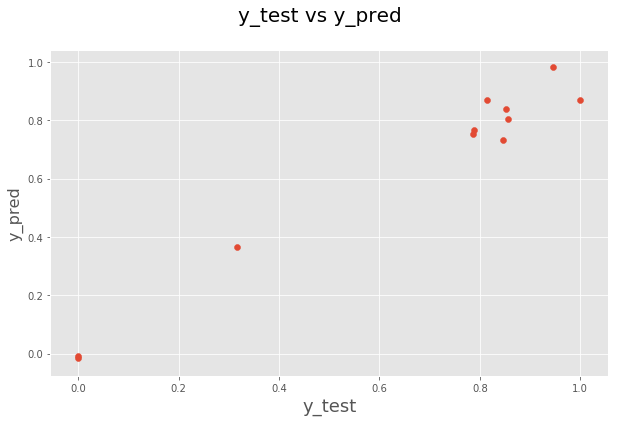

In [223]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity - Camera Accessory - Basic Linear Model

In [224]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

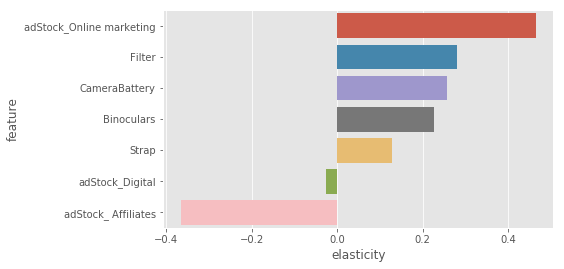

In [225]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Basic Linear Model

In [226]:
# Creating df1 by dropping the features which the company cannot control
df1= final_gaming_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [227]:
#Checking the columns
df1.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [228]:
#Doing the test train split
np.random.seed(0)
df1_train, df1_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [229]:
#Scaling the features
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars1=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df1_train[num_vars1] = scaler.fit_transform(df1_train[num_vars1])
df1_test[num_vars1] = scaler.fit_transform(df1_test[num_vars1])

In [230]:
# assiging the values for x_train & y_train
y_train1 = df1_train.pop('gmv')
X_train1 = df1_train

## RFE

In [231]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train1, y_train1)

In [232]:
## selecting the top 20 rfe features
col = X_train1.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'NPS', 'total_holidays', 'is_holiday',
       'GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingMemoryCard',
       'GamingMouse', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController'],
      dtype='object')

In [233]:
## checking the columns excluded by rfe
X_train1.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Sponsorship', 'sla',
       'product_procurement_sla', 'discount', 'total_premiumness',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamingAdapter',
       'GamingChargingStation', 'GamingKeyboard', 'GamingMousePad',
       'TVOutCableAccessory'],
      dtype='object')

In [234]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train1[col]

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe1)
# Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     137.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.49e-18
Time:                        19:14:50   Log-Likelihood:                 118.75
No. Observations:                  42   AIC:                            -195.5
Df Residuals:                      21   BIC:                            -159.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  8.774629e+08
7                 adStock_SEM  8.909730e+03
3             adStock_Digital  5.452830e+03
8               adStock_Radio  4.357210e+03
9               adStock_Other  4.244040e+03
5    adStock_Online marketing  1.604660e+03
6         adStock_ Affiliates  1.325360e+03
2                  adStock_TV  5.534300e+02
4   adStock_Content Marketing  3.227700e+02
1                        Year  5.395000e+01
19        JoystickGamingWheel  2.643000e+01
11             total_holidays  2.391000e+01
12                 is_holiday  2.293000e+01
10                        NPS  1.577000e+01
15              GamingHeadset  1.470000e+01
14         GamingAccessoryKit  1.436000e+01
16           GamingMemoryCard  9.420000e+00
17                GamingMouse  7.550000e+00
13                    GamePad  6.400000e+00
18              GamingSpeaker  6.210000e+00
20           MotionController  4.280000e+00

In [235]:
# removing the feature with highest p-value
X_train1_new= X_train_rfe1.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new)
  
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.28e-19
Time:                        19:14:50   Log-Likelihood:                 118.70
No. Observations:                  42   AIC:                            -197.4
Df Residuals:                      22   BIC:                            -162.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  8.724485e+08
6                 adStock_SEM  8.395770e+03
3             adStock_Digital  4.934500e+03
7               adStock_Radio  4.309530e+03
8               adStock_Other  4.202250e+03
2                  adStock_TV  5.425100e+02
4   adStock_Content Marketing  2.850700e+02
5         adStock_ Affiliates  9.552000e+01
1                        Year  5.364000e+01
18        JoystickGamingWheel  2.595000e+01
10             total_holidays  2.299000e+01
11                 is_holiday  2.226000e+01
9                         NPS  1.572000e+01
13         GamingAccessoryKit  1.435000e+01
14              GamingHeadset  1.340000e+01
15           GamingMemoryCard  7.700000e+00
16                GamingMouse  7.290000e+00
12                    GamePad  6.390000e+00
17              GamingSpeaker  5.560000e+00
19           MotionController  4.260000e+00

In [236]:
# removing the feature with highest p-values
X_train1_new1= X_train1_new.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new1)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     151.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.15e-19
Time:                        19:14:50   Log-Likelihood:                 116.76
No. Observations:                  42   AIC:                            -195.5
Df Residuals:                      23   BIC:                            -162.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.662845e+08
6                 adStock_SEM  7.365640e+03
3             adStock_Digital  4.229900e+03
7               adStock_Radio  4.068200e+03
8               adStock_Other  4.000240e+03
2                  adStock_TV  4.886900e+02
4   adStock_Content Marketing  2.790400e+02
5         adStock_ Affiliates  9.431000e+01
1                        Year  2.252000e+01
10             total_holidays  2.123000e+01
11                 is_holiday  2.092000e+01
9                         NPS  1.521000e+01
14              GamingHeadset  1.102000e+01
13         GamingAccessoryKit  8.280000e+00
12                    GamePad  6.130000e+00
15           GamingMemoryCard  5.430000e+00
16                GamingMouse  4.850000e+00
17              GamingSpeaker  4.430000e+00
18           MotionController  3.430000e+00

In [237]:
# dropping feature on the basis of highest p-value
X_train1_new2= X_train1_new1.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new2)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.66e-20
Time:                        19:14:50   Log-Likelihood:                 112.52
No. Observations:                  42   AIC:                            -189.0
Df Residuals:                      24   BIC:                            -157.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.353356e+08
6                 adStock_SEM  6.026470e+03
3             adStock_Digital  3.483790e+03
7               adStock_Radio  3.301400e+03
8               adStock_Other  3.260580e+03
2                  adStock_TV  3.864500e+02
4   adStock_Content Marketing  2.450300e+02
5         adStock_ Affiliates  8.486000e+01
9                         NPS  1.505000e+01
1                        Year  1.447000e+01
13              GamingHeadset  1.056000e+01
12         GamingAccessoryKit  8.280000e+00
11                    GamePad  5.950000e+00
14           GamingMemoryCard  5.240000e+00
15                GamingMouse  4.730000e+00
16              GamingSpeaker  4.020000e+00
17           MotionController  3.180000e+00
10                 is_holiday  1.250000e+00

In [238]:
# removing feature on the basis of highest vif value  as all the p-values are in acceptable range
X_train1_new3= X_train1_new2.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new3)
    # Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     140.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.00e-20
Time:                        19:14:50   Log-Likelihood:                 110.90
No. Observations:                  42   AIC:                            -187.8
Df Residuals:                      25   BIC:                            -158.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.312249e+08
6                 adStock_SEM  5.745570e+03
3             adStock_Digital  3.319270e+03
7               adStock_Radio  3.142070e+03
8               adStock_Other  3.097410e+03
2                  adStock_TV  3.696500e+02
4   adStock_Content Marketing  2.397300e+02
5         adStock_ Affiliates  8.158000e+01
1                        Year  1.422000e+01
9                         NPS  1.421000e+01
12              GamingHeadset  1.047000e+01
11         GamingAccessoryKit  7.980000e+00
10                    GamePad  5.610000e+00
13           GamingMemoryCard  5.210000e+00
14                GamingMouse  4.660000e+00
15              GamingSpeaker  4.000000e+00
16           MotionController  3.080000e+00

In [239]:
# removing feature on the basis of highest p-value
X_train1_new4= X_train1_new3.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new4)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.30e-21
Time:                        19:14:50   Log-Likelihood:                 109.25
No. Observations:                  42   AIC:                            -186.5
Df Residuals:                      26   BIC:                            -158.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [240]:
# removing feature on the basis of highest p-value
X_train1_new5= X_train1_new4.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new5)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.82e-22
Time:                        19:14:50   Log-Likelihood:                 108.37
No. Observations:                  42   AIC:                            -186.7
Df Residuals:                      27   BIC:                            -160.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0163    

Features      VIF
4           adStock_SEM  1144.51
2       adStock_Digital   948.01
5         adStock_Radio   905.64
6         adStock_Other   881.35
1            adStock_TV    98.08
0                 const    64.06
3   adStock_ Affiliates    43.02
7                   NPS    11.15
10        GamingHeadset     6.60
9    GamingAccessoryKit     5.02
11     GamingMemoryCard     4.78
8               GamePad     4.26
12          GamingMouse     3.89
13        GamingSpeaker     3.04
14     MotionController     2.61

In [241]:
# removing feature on the basis of highest p-value
X_train1_new6= X_train1_new5.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new6)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.10e-22
Time:                        19:14:50   Log-Likelihood:                 106.96
No. Observations:                  42   AIC:                            -185.9
Df Residuals:                      28   BIC:                            -161.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0051    

Features     VIF
4           adStock_SEM  450.40
5         adStock_Radio  439.70
6         adStock_Other  433.25
2       adStock_Digital  389.38
1            adStock_TV   54.71
0                 const   44.38
3   adStock_ Affiliates   29.25
9         GamingHeadset    6.37
8    GamingAccessoryKit    4.99
10     GamingMemoryCard    4.34
11          GamingMouse    3.89
7               GamePad    3.65
12        GamingSpeaker    2.92
13     MotionController    2.58

In [242]:
# removing feature on the basis of highest p-value
X_train1_new7= X_train1_new6.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new7)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     173.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.22e-23
Time:                        19:14:50   Log-Likelihood:                 106.34
No. Observations:                  42   AIC:                            -186.7
Df Residuals:                      29   BIC:                            -164.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0141    

Features     VIF
4         adStock_Radio  144.68
5         adStock_Other  137.54
1            adStock_TV   29.14
2   adStock_ Affiliates   28.21
0                 const   10.25
8         GamingHeadset    6.26
7    GamingAccessoryKit    4.92
10          GamingMouse    3.84
6               GamePad    3.64
11        GamingSpeaker    2.92
9      GamingMemoryCard    2.64
12     MotionController    2.58
3           adStock_SEM    2.35

In [243]:
# removing feature on the basis of highest p-value
X_train1_new8= X_train1_new7.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new8)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.07e-24
Time:                        19:14:51   Log-Likelihood:                 106.00
No. Observations:                  42   AIC:                            -188.0
Df Residuals:                      30   BIC:                            -167.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0135    

Features    VIF
0                 const  10.17
2   adStock_ Affiliates   7.18
6    GamingAccessoryKit   4.76
1            adStock_TV   4.16
7         GamingHeadset   3.78
5               GamePad   3.64
9           GamingMouse   3.30
4         adStock_Radio   2.62
11     MotionController   2.52
8      GamingMemoryCard   2.27
3           adStock_SEM   2.19
10        GamingSpeaker   1.88

In [244]:
# removing feature on the basis of highest p-value
X_train1_new9= X_train1_new8.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new9)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     212.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.17e-25
Time:                        19:14:51   Log-Likelihood:                 105.31
No. Observations:                  42   AIC:                            -188.6
Df Residuals:                      31   BIC:                            -169.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0142    

Features    VIF
0                 const  10.13
2   adStock_ Affiliates   5.89
5    GamingAccessoryKit   4.76
1            adStock_TV   4.13
4               GamePad   3.63
6         GamingHeadset   3.18
10     MotionController   2.50
3         adStock_Radio   2.48
8           GamingMouse   2.33
7      GamingMemoryCard   2.26
9         GamingSpeaker   1.87

In [245]:
# removing feature on the basis of highest p-value
X_train1_new10= X_train1_new9.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new10)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.48e-26
Time:                        19:14:51   Log-Likelihood:                 103.24
No. Observations:                  42   AIC:                            -186.5
Df Residuals:                      32   BIC:                            -169.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0167    

Features   VIF
0                const  9.97
2  adStock_ Affiliates  5.75
5   GamingAccessoryKit  4.67
1           adStock_TV  4.02
4              GamePad  3.61
6        GamingHeadset  3.17
7          GamingMouse  2.33
9     MotionController  2.23
8        GamingSpeaker  1.85
3        adStock_Radio  1.81

In [246]:
# removing feature on the basis of highest p-value
X_train1_new11= X_train1_new10.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new11)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     182.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.66e-25
Time:                        19:14:51   Log-Likelihood:                 96.334
No. Observations:                  42   AIC:                            -174.7
Df Residuals:                      33   BIC:                            -159.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0185    

Features   VIF
0                const  9.95
2  adStock_ Affiliates  5.02
4   GamingAccessoryKit  4.22
1           adStock_TV  3.93
3              GamePad  3.39
5        GamingHeadset  3.11
6          GamingMouse  2.29
8     MotionController  2.17
7        GamingSpeaker  1.72

In [247]:
# removing feature on the basis of highest p-value
X_train1_new12= X_train1_new11.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new12)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.21e-26
Time:                        19:14:51   Log-Likelihood:                 96.267
No. Observations:                  42   AIC:                            -176.5
Df Residuals:                      34   BIC:                            -162.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0176      0

Features   VIF
0               const  9.56
3  GamingAccessoryKit  4.08
2             GamePad  3.33
4       GamingHeadset  2.51
5         GamingMouse  2.23
7    MotionController  2.17
1          adStock_TV  1.95
6       GamingSpeaker  1.44

In [248]:
# removing feature on the basis of highest p-value
X_train1_new13= X_train1_new12.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new13)
    
lr= sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     247.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.80e-27
Time:                        19:14:51   Log-Likelihood:                 95.437
No. Observations:                  42   AIC:                            -176.9
Df Residuals:                      35   BIC:                            -164.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0201      0

Features   VIF
0               const  9.29
3  GamingAccessoryKit  3.45
2             GamePad  3.18
4       GamingHeadset  2.51
5         GamingMouse  2.23
1          adStock_TV  1.45
6       GamingSpeaker  1.44

In [249]:
# removing feature on the basis of highest p-value
X_train1_new14= X_train1_new13.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new14)
    
lr1= sm.OLS(y_train1, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     299.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.86e-28
Time:                        19:14:51   Log-Likelihood:                 95.049
No. Observations:                  42   AIC:                            -178.1
Df Residuals:                      36   BIC:                            -167.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0225      0

Features   VIF
0               const  8.83
1             GamePad  3.10
2  GamingAccessoryKit  3.03
3       GamingHeadset  2.40
4         GamingMouse  2.22
5       GamingSpeaker  1.35

##### Selecting this as the first model as the VIFs & p-values are in the acceptable range

In [250]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new15= X_train1_new14.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train1_new15)

lr2= sm.OLS(y_train1, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     285.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.96e-27
Time:                        19:14:51   Log-Likelihood:                 88.928
No. Observations:                  42   AIC:                            -167.9
Df Residuals:                      37   BIC:                            -159.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0371      0.013      2.767

Features   VIF
0          const  7.83
3    GamingMouse  2.22
2  GamingHeadset  2.14
1        GamePad  1.82
4  GamingSpeaker  1.35

##### Selecting this as the second model as the VIFs & p-values are in the acceptable range

In [251]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new16= X_train1_new15.drop(["GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train1_new16)
    # Create a first fitted model
lr3= sm.OLS(y_train1, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     308.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.01e-26
Time:                        19:14:51   Log-Likelihood:                 84.172
No. Observations:                  42   AIC:                            -160.3
Df Residuals:                      38   BIC:                            -153.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0314      0.015      2.142

Features   VIF
0          const  7.68
3    GamingMouse  2.06
2  GamingHeadset  1.81
1        GamePad  1.71

##### Selecting this as the third model as the VIFs & p-values are in the acceptable range

In [252]:
#Checking performance of top 3 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9377335563874419
lr model 2 r2_score 0.9141626387750058
lr model 3 r2_score 0.8897243136453243


In [253]:
#Checking performance of top 4 models finding MSE
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.001865174806754378
lr model 2 MSE 0.0026909844942524246
lr model 3 MSE 0.00379531936237854


##### We select the model 2 as the best model as one less feature can still explain 88% variance of the model

### Model Evaluation

In [254]:
y_test = df1_test.pop('gmv')
X_test = df1_test

In [255]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [256]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
25          52     12  2015    0.623447         0.505849             1.000000   
48          75      6  2016    0.192129         0.056635             0.569889   
52          79      6  2016    0.189369         0.111151             0.438248   
37          64      3  2016    1.000000         0.290729             0.691260   
6           33      8  2015    0.000000         0.200688             0.000000   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
25                   0.865790                  0.772951             0.797967   
48                   0.429084                  0.634075             0.643276   
52                   0.050530                  0.277200             0.319957   
37                   0.347230                  0.653390             0.742328   
6                    0.000000                  0.000000             0.000000   

    adStock_SEM         ...           GamingChargingStation  GamingHeadset  \
25     0.679923         ...                             1.0       0.856222   
48     0.241883         ...                             0.0       0.512686   
52     0.029384         ...                             0.0       0.220701   
37     0.164123         ...                             0.0       0.361257   
6      0.000000         ...                             0.0       0.000000   

    GamingKeyboard  GamingMemoryCard  GamingMouse  GamingMousePad  \
25        0.618056          1.000000     0.605735           0.720   
48        0.861111          0.108020     0.513142           0.464   
52        0.479167          0.013093     0.158303           0.128   
37        1.000000          0.076923     0.328554           0.448   
6         0.000000          0.000000     0.000000           0.000   

    GamingSpeaker  JoystickGamingWheel  MotionController  TVOutCableAccessory  
25       0.236364             0.156627          0.823529             0.653631  
48       1.000000             1.000000          0.352941             0.893855  
52       0.145455             0.518072          0.647059             0.340782  
37       0.145455             0.192771          0.529412             1.000000  
6        0.000000             0.000000          0.000000             0.000000  

[5 rows x 38 columns]

In [257]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const   GamePad  GamingAccessoryKit  GamingHeadset  GamingMouse  \
25    1.0  1.000000            0.931193       0.856222     0.605735   
48    1.0  0.944306            1.000000       0.512686     0.513142   
52    1.0  0.348296            0.472477       0.220701     0.158303   
37    1.0  0.820449            0.972477       0.361257     0.328554   
6     1.0  0.000831            0.000000       0.000000     0.000000   
18    1.0  0.972569            0.977064       0.415224     1.000000   
20    1.0  0.600166            0.848624       0.326621     0.236559   
46    1.0  0.781380            0.912844       0.801853     0.367981   
5     1.0  0.000000            0.000000       0.000000     0.000000   
31    1.0  0.719867            0.619266       0.643576     0.429510   
33    1.0  0.733167            0.564220       1.000000     0.814217   

    GamingSpeaker  
25       0.236364  
48       1.000000  
52       0.145455  
37       0.145455  
6        0.000000  
18       0.054545  
20       0.018182  
46       0.581818  
5        0.000000  
31       0.381818  
33       0.090909

In [258]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

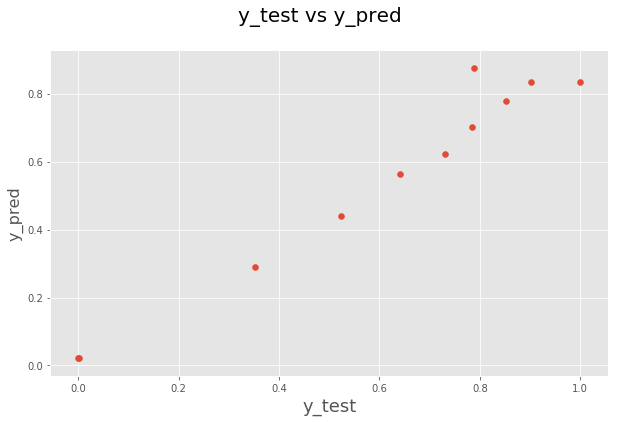

In [259]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity - Gaming Accessory - Basic Linear Model

In [260]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train1, coefficients_df)

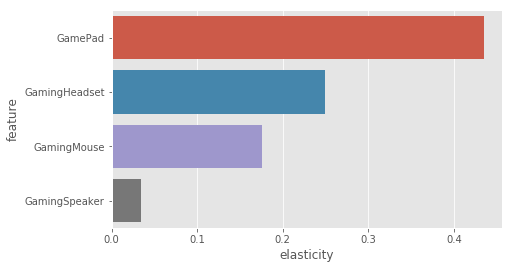

In [261]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### III. Home Audio - Basic Linear Model

In [262]:
# Dropping the unnecessary features which the company cannot control from the Home Audio data frame with KPIs
df2= final_home_audio_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
df2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [263]:
#Doing the test-train split
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [264]:
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars2=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df2_train[num_vars2] = scaler.fit_transform(df2_train[num_vars2])
df2_test[num_vars2] = scaler.fit_transform(df2_test[num_vars2])

In [265]:
# Splitting into X_train & y_train
y_train2 = df2_train.pop('gmv')
X_train2 = df2_train

#### RFE

In [266]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train2, y_train2)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train2, y_train2)

In [267]:
# selecting the top 20 features given by rfe
col = X_train2.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'discount', 'NPS', 'BoomBox', 'DJController',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [268]:
# checking the features not selected in top 20
X_train2.columns[~rfe.support_]

Index(['order_week', 'Month', 'sla', 'total_premiumness', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'Dock', 'DockingStation', 'SlingBox'],
      dtype='object')

In [269]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train2[col]

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)
# Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.54e-25
Time:                        19:14:56   Log-Likelihood:                 163.51
No. Observations:                  40   AIC:                            -285.0
Df Residuals:                      19   BIC:                            -249.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  5.152366e+08
8                 adStock_SEM  6.435800e+03
3             adStock_Digital  4.596150e+03
10              adStock_Other  3.343800e+03
9               adStock_Radio  3.330620e+03
7         adStock_ Affiliates  3.048150e+03
6    adStock_Online marketing  2.554740e+03
5   adStock_Content Marketing  5.735500e+02
2                  adStock_TV  4.600800e+02
4         adStock_Sponsorship  3.147700e+02
13                        NPS  3.541000e+01
1                        Year  3.168000e+01
18           HomeAudioSpeaker  2.083000e+01
16                    FMRadio  2.076000e+01
14                    BoomBox  1.363000e+01
20              VoiceRecorder  6.380000e+00
12                   discount  6.110000e+00
17                 HiFiSystem  4.340000e+00
19                 SoundMixer  4.130000e+00
11    product_procurement_sla  3.630000e+00
15               DJController  1.210000e+00

In [270]:
# removing the feature based on the highest p-value
X_train2_new= X_train_rfe2.drop(["adStock_ Affiliates"], axis = 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train2_new)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1294.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.04e-27
Time:                        19:14:56   Log-Likelihood:                 163.19
No. Observations:                  40   AIC:                            -286.4
Df Residuals:                      20   BIC:                            -252.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  4.639621e+08
7                 adStock_SEM  6.435050e+03
3             adStock_Digital  4.481370e+03
8               adStock_Radio  3.325900e+03
9               adStock_Other  3.259240e+03
5   adStock_Content Marketing  4.094100e+02
2                  adStock_TV  2.871000e+02
6    adStock_Online marketing  1.320000e+02
4         adStock_Sponsorship  7.846000e+01
12                        NPS  3.465000e+01
1                        Year  2.852000e+01
15                    FMRadio  1.687000e+01
17           HomeAudioSpeaker  1.359000e+01
13                    BoomBox  6.650000e+00
19              VoiceRecorder  6.270000e+00
11                   discount  5.880000e+00
16                 HiFiSystem  3.970000e+00
10    product_procurement_sla  3.520000e+00
18                 SoundMixer  3.240000e+00
14               DJController  1.190000e+00

In [271]:
# removing the feature based on the highest p-value
X_train2_new1= X_train2_new.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new1)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1371.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.32e-28
Time:                        19:14:56   Log-Likelihood:                 162.29
No. Observations:                  40   AIC:                            -286.6
Df Residuals:                      21   BIC:                            -254.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  4.618482e+08
7                 adStock_SEM  6.429010e+03
3             adStock_Digital  4.472120e+03
8               adStock_Radio  3.322460e+03
9               adStock_Other  3.257320e+03
5   adStock_Content Marketing  4.041900e+02
2                  adStock_TV  2.870900e+02
6    adStock_Online marketing  1.290400e+02
4         adStock_Sponsorship  7.518000e+01
12                        NPS  3.380000e+01
1                        Year  2.839000e+01
15                    FMRadio  1.636000e+01
16           HomeAudioSpeaker  1.274000e+01
13                    BoomBox  6.650000e+00
18              VoiceRecorder  6.050000e+00
11                   discount  5.750000e+00
10    product_procurement_sla  3.470000e+00
17                 SoundMixer  3.000000e+00
14               DJController  1.190000e+00

In [272]:
# removing the feature on the basis of highest p-value
X_train2_new2= X_train2_new1.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new2)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1440.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.50e-29
Time:                        19:14:56   Log-Likelihood:                 161.20
No. Observations:                  40   AIC:                            -286.4
Df Residuals:                      22   BIC:                            -256.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  4.187530e+08
7                 adStock_SEM  6.343390e+03
3             adStock_Digital  4.442900e+03
8               adStock_Radio  3.302670e+03
9               adStock_Other  3.239950e+03
5   adStock_Content Marketing  3.961000e+02
2                  adStock_TV  2.814400e+02
6    adStock_Online marketing  1.279400e+02
4         adStock_Sponsorship  7.513000e+01
12                        NPS  3.029000e+01
1                        Year  2.574000e+01
15                    FMRadio  1.617000e+01
16           HomeAudioSpeaker  1.254000e+01
17              VoiceRecorder  5.880000e+00
11                   discount  5.510000e+00
13                    BoomBox  5.460000e+00
10    product_procurement_sla  3.430000e+00
14               DJController  1.190000e+00

In [273]:
# removing the feature based on highest p-value
X_train2_new3= X_train2_new2.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new3)
    # Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1543.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.52e-31
Time:                        19:14:56   Log-Likelihood:                 160.49
No. Observations:                  40   AIC:                            -287.0
Df Residuals:                      23   BIC:                            -258.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.820926e+08
7                 adStock_SEM  3.079370e+03
3             adStock_Digital  2.339970e+03
8               adStock_Radio  1.321580e+03
9               adStock_Other  1.233710e+03
5   adStock_Content Marketing  3.478200e+02
2                  adStock_TV  1.196400e+02
6    adStock_Online marketing  7.773000e+01
4         adStock_Sponsorship  7.437000e+01
1                        Year  2.349000e+01
14                    FMRadio  1.507000e+01
15           HomeAudioSpeaker  1.107000e+01
11                   discount  5.490000e+00
16              VoiceRecorder  5.280000e+00
12                    BoomBox  5.030000e+00
10    product_procurement_sla  3.420000e+00
13               DJController  1.190000e+00

In [274]:
# removing the feature on the basis of highest p-value
X_train2_new4= X_train2_new3.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new4)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1554.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.30e-32
Time:                        19:14:56   Log-Likelihood:                 158.49
No. Observations:                  40   AIC:                            -285.0
Df Residuals:                      24   BIC:                            -258.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.820525e+08
7                 adStock_SEM  3.075660e+03
3             adStock_Digital  2.335470e+03
8               adStock_Radio  1.310120e+03
9               adStock_Other  1.212610e+03
5   adStock_Content Marketing  3.099200e+02
2                  adStock_TV  1.142400e+02
4         adStock_Sponsorship  6.974000e+01
6    adStock_Online marketing  6.330000e+01
1                        Year  2.349000e+01
13                    FMRadio  1.498000e+01
14           HomeAudioSpeaker  9.880000e+00
15              VoiceRecorder  5.260000e+00
11                    BoomBox  4.930000e+00
10                   discount  3.980000e+00
12               DJController  1.190000e+00

In [275]:
# removing the features in the basis of highest p-values
X_train2_new5= X_train2_new4.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new5)
  
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1607.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.60e-33
Time:                        19:14:56   Log-Likelihood:                 156.97
No. Observations:                  40   AIC:                            -283.9
Df Residuals:                      25   BIC:                            -258.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.183017e+08
6                 adStock_SEM  1.823730e+03
8               adStock_Other  1.072630e+03
7               adStock_Radio  1.019670e+03
3             adStock_Digital  8.534600e+02
4   adStock_Content Marketing  1.774600e+02
2                  adStock_TV  1.138800e+02
5    adStock_Online marketing  2.799000e+01
1                        Year  1.341000e+01
12                    FMRadio  1.095000e+01
13           HomeAudioSpeaker  7.800000e+00
14              VoiceRecorder  4.940000e+00
10                    BoomBox  4.700000e+00
9                    discount  3.950000e+00
11               DJController  1.190000e+00

In [276]:
# removing column on the bsis of highest p-value
X_train2_new6= X_train2_new5.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new6)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1752.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.50e-35
Time:                        19:14:56   Log-Likelihood:                 156.42
No. Observations:                  40   AIC:                            -284.8
Df Residuals:                      26   BIC:                            -261.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  896.83
7               adStock_Other  640.00
6               adStock_Radio  581.72
2             adStock_Digital  383.29
3   adStock_Content Marketing  137.31
1                  adStock_TV   70.09
0                       const   42.36
4    adStock_Online marketing   26.67
11                    FMRadio    6.01
12           HomeAudioSpeaker    5.96
9                     BoomBox    4.48
8                    discount    3.36
13              VoiceRecorder    2.58
10               DJController    1.13

In [277]:
# dropping feature on the basis of highest vif values as all the p-values are in acceptable range
X_train2_new7= X_train2_new6.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new7)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1736.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.03e-35
Time:                        19:14:56   Log-Likelihood:                 153.88
No. Observations:                  40   AIC:                            -281.8
Df Residuals:                      27   BIC:                            -259.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  822.73
7               adStock_Other  571.59
6               adStock_Radio  519.49
2             adStock_Digital  366.49
3   adStock_Content Marketing  124.48
1                  adStock_TV   64.31
0                       const   39.14
4    adStock_Online marketing   23.71
11           HomeAudioSpeaker    4.93
9                     BoomBox    3.41
8                    discount    3.24
12              VoiceRecorder    2.15
10               DJController    1.12

In [278]:
# removinf feature on the basis of highest p-value
X_train2_new8= X_train2_new7.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new8)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1762.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.02e-36
Time:                        19:14:56   Log-Likelihood:                 151.72
No. Observations:                  40   AIC:                            -279.4
Df Residuals:                      28   BIC:                            -259.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  796.79
7               adStock_Other  554.19
6               adStock_Radio  507.56
2             adStock_Digital  366.45
3   adStock_Content Marketing  107.44
1                  adStock_TV   61.48
0                       const   36.57
4    adStock_Online marketing   23.05
8                     BoomBox    2.88
10           HomeAudioSpeaker    2.69
11              VoiceRecorder    1.85
9                DJController    1.12

In [279]:
# removing features on the basis of highest p-value
X_train2_new9= X_train2_new8.drop(["DJController"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new9)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1791.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.15e-37
Time:                        19:14:56   Log-Likelihood:                 149.44
No. Observations:                  40   AIC:                            -276.9
Df Residuals:                      29   BIC:                            -258.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  786.00
7               adStock_Other  550.50
6               adStock_Radio  504.94
2             adStock_Digital  361.35
3   adStock_Content Marketing  106.80
1                  adStock_TV   60.80
0                       const   35.60
4    adStock_Online marketing   22.96
8                     BoomBox    2.87
9            HomeAudioSpeaker    2.69
10              VoiceRecorder    1.85

In [280]:
# removing feature on the basis of highest p-value
X_train2_new10= X_train2_new9.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new10)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1644.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.07e-38
Time:                        19:14:56   Log-Likelihood:                 144.95
No. Observations:                  40   AIC:                            -269.9
Df Residuals:                      30   BIC:                            -253.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
6              adStock_Other  112.53
5              adStock_Radio   95.01
4                adStock_SEM   76.92
2  adStock_Content Marketing   74.09
1                 adStock_TV   18.77
3   adStock_Online marketing   18.04
0                      const   17.14
7                    BoomBox    2.84
8           HomeAudioSpeaker    2.64
9              VoiceRecorder    1.43

In [281]:
# removing feature on the basis of highest p-value
X_train2_new11= X_train2_new10.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new11)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1596.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.53e-38
Time:                        19:14:56   Log-Likelihood:                 141.35
No. Observations:                  40   AIC:                            -264.7
Df Residuals:                      31   BIC:                            -249.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
2  adStock_Content Marketing  55.64
4                adStock_SEM  55.40
0                      const  16.07
3   adStock_Online marketing   4.41
5              adStock_Other   3.94
1                 adStock_TV   2.91
6                    BoomBox   2.62
7           HomeAudioSpeaker   2.25
8              VoiceRecorder   1.34

In [282]:
# removing feature on the basis of highest p-value
X_train2_new12= X_train2_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new12)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1818.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.72e-40
Time:                        19:14:56   Log-Likelihood:                 140.66
No. Observations:                  40   AIC:                            -265.3
Df Residuals:                      32   BIC:                            -251.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
2  adStock_Content Marketing  21.73
4                adStock_SEM  19.40
0                      const  14.94
3   adStock_Online marketing   3.78
5                    BoomBox   2.38
1                 adStock_TV   2.25
6           HomeAudioSpeaker   2.13
7              VoiceRecorder   1.33

In [283]:
# removing feature on the basis of highest p-value
X_train2_new13= X_train2_new12.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new13)

lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2153.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.57e-41
Time:                        19:14:56   Log-Likelihood:                 140.34
No. Observations:                  40   AIC:                            -266.7
Df Residuals:                      33   BIC:                            -254.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
1  adStock_Content Marketing  20.90
3                adStock_SEM  18.04
0                      const  14.80
2   adStock_Online marketing   2.73
4                    BoomBox   2.36
5           HomeAudioSpeaker   2.13
6              VoiceRecorder   1.33

In [284]:
# removing feature on the basis of highest p-value
X_train2_new14= X_train2_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm2_1 = sm.add_constant(X_train2_new14)

lr1 = sm.OLS(y_train2, X_train_lm2_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_1.values, i) for i in range(X_train_lm2_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2553.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.56e-43
Time:                        19:14:56   Log-Likelihood:                 139.51
No. Observations:                  40   AIC:                            -267.0
Df Residuals:                      34   BIC:                            -256.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
2                adStock_SEM  16.63
1  adStock_Content Marketing  16.12
0                      const   7.99
4           HomeAudioSpeaker   1.90
3                    BoomBox   1.80
5              VoiceRecorder   1.31

#### Selecting this as our first model based on the vif and p -values acceptable ranges

In [285]:
## removing features on the basis of features which give lesser drop in adj. r2 values 
X_train2_new15= X_train2_new14.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm2_2 = sm.add_constant(X_train2_new15)

lr = sm.OLS(y_train2, X_train_lm2_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_2.values, i) for i in range(X_train_lm2_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2931.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.14e-43
Time:                        19:14:56   Log-Likelihood:                 137.23
No. Observations:                  40   AIC:                            -264.5
Df Residuals:                      35   BIC:                            -256.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0200      0.004  

Features   VIF
0             const  7.99
3  HomeAudioSpeaker  1.75
2           BoomBox  1.69
1       adStock_SEM  1.56
4     VoiceRecorder  1.24

In [286]:
# removing features to get lesser drop in adj r2 square value
X_train2_new16= X_train2_new15.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_new16)

lr3 = sm.OLS(y_train2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3882.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.07e-45
Time:                        19:14:56   Log-Likelihood:                 136.54
No. Observations:                  40   AIC:                            -265.1
Df Residuals:                      36   BIC:                            -258.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0202      0.004  

Features   VIF
0             const  7.98
1           BoomBox  1.60
2  HomeAudioSpeaker  1.51
3     VoiceRecorder  1.17

In [287]:
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9778904281959498
lr model 2 r2_score 0.9749546464440317
lr model 3 r2_score 0.9738550597877802


In [288]:
#Checking MSE of top 4 models
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00014911740498965432
lr model 2 MSE 0.00011449711514170059
lr model 3 MSE 0.00011138949581708738


#### Based upon the lowest number of features & the best model performance, we select model 3 as the best basic linear model for Home Audio Category

### Residual analysis

In [289]:
y_train_price = lr3.predict(X_train_lm2_3)

Text(0.5, 0, 'Errors')

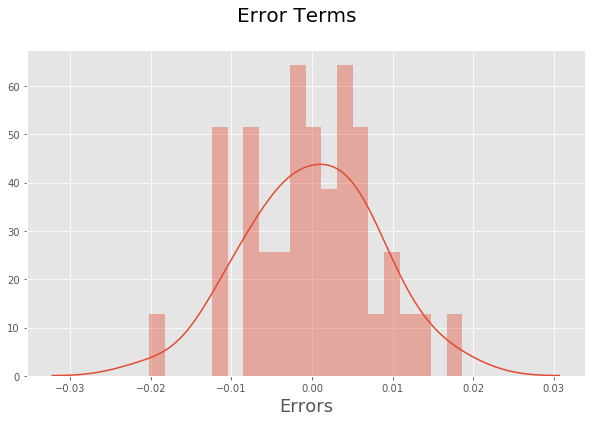

In [290]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train2 - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [291]:
y_test = df2_test.pop('gmv')
X_test = df2_test

In [292]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [293]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           36      9  2015    0.244605         0.290300             0.663463   
36          66      4  2016    0.990932         0.356995             0.729638   
37          67      4  2016    0.912173         0.207337             0.674933   
28          58      2  2016    0.547775         0.324276             0.172513   
43          73      5  2016    0.240274         0.000000             0.813115   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.328685                  0.275383             0.283422   
36                   0.222751                  0.668837             0.773385   
37                   0.128442                  0.684842             0.797143   
28                   0.988332                  0.911965             1.000000   
43                   1.000000                  1.000000             0.980171   

    adStock_SEM      ...         BoomBox  DJController      Dock  \
6      0.141059      ...        1.000000           0.0  1.000000   
36     0.229379      ...        0.447761           0.0  0.437500   
37     0.230402      ...        0.388060           0.0  0.666667   
28     0.312876      ...        0.492537           0.0  0.645833   
43     0.745088      ...        0.358209           0.0  0.020833   

    DockingStation   FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  \
6         0.000000  0.833648    0.666667          0.416162       0.0   
36        0.526316  0.720227    0.454545          0.446061       0.0   
37        0.684211  0.725898    0.878788          0.379394       1.0   
28        0.210526  0.897921    0.515152          1.000000       0.0   
43        0.842105  0.551985    0.333333          0.381414       0.0   

    SoundMixer  VoiceRecorder  
6          0.0       0.375000  
36         0.0       0.894231  
37         0.0       0.894231  
28         0.0       0.730769  
43         0.5       1.000000  

[5 rows x 33 columns]

In [294]:
X_test = X_test[X_train_lm2_3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const   BoomBox  HomeAudioSpeaker  VoiceRecorder
6     1.0  1.000000          0.416162       0.375000
36    1.0  0.447761          0.446061       0.894231
37    1.0  0.388060          0.379394       0.894231
28    1.0  0.492537          1.000000       0.730769
43    1.0  0.358209          0.381414       1.000000
49    1.0  0.462687          0.194343       0.240385
5     1.0  0.000000          0.000000       0.000000
33    1.0  0.582090          0.871515       0.798077
20    1.0  0.402985          0.960000       0.394231
42    1.0  0.402985          0.426263       0.932692

In [295]:
# Making predictions using the final model
y_pred = lr3.predict(X_test)

Text(0, 0.5, 'y_pred')

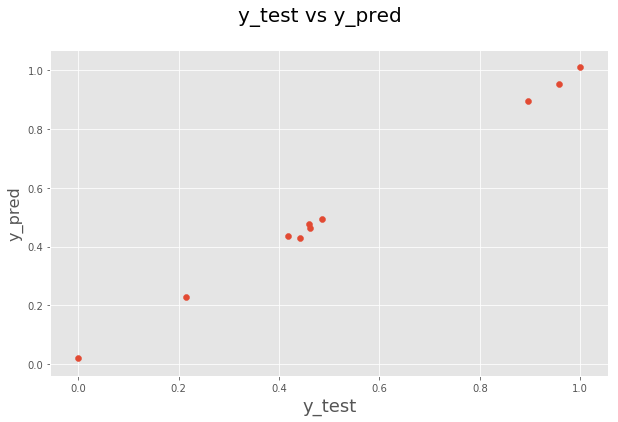

In [296]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity - Home Audio - Basic Linear model

In [297]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2_3, y_train2, coefficients_df)

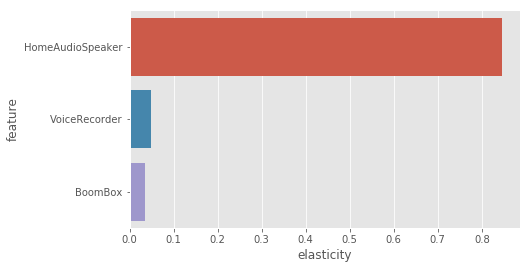

In [298]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Building the Multiplicative models

#### I. Camera Accessory - Multiplicative model

In [299]:
# taking the camera accessory dataset
final_camera_data.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM    ...      CameraTripod  ExtensionTube  Filter  Flash  \
0     1.255924    ...              13.0            0.0     0.0    0.0   
1     1.883887    ...             433.0            0.0   226.0   17.0   
2     2.197868    ...             491.0            0.0   188.0   23.0   
3     2.354858    ...             457.0            0.0   194.0   18.0   
4     1.805811    ...             363.0            0.0   112.0   26.0   

   FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  Telescope  
0               0.0    2.0                0.0      0.0    0.0        0.0  
1               0.0  366.0                0.0      0.0   13.0       16.0  
2               0.0  382.0                0.0      0.0   24.0       22.0  
3               0.0  423.0                0.0      0.0   23.0       30.0  
4               0.0  233.0                0.0      0.0   23.0       13.0  

[5 rows x 50 columns]

**Begin by replacing '0' with '0.0000001' to avaoid NAN values when we take log of values in dataset**

In [300]:
final_camera_data.replace(0.0, 0.000001).head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM    ...      CameraTripod  ExtensionTube      Filter      Flash  \
0     1.255924    ...              13.0       0.000001    0.000001   0.000001   
1     1.883887    ...             433.0       0.000001  226.000000  17.000000   
2     2.197868    ...             491.0       0.000001  188.000000  23.000000   
3     2.354858    ...             457.0       0.000001  194.000000  18.000000   
4     1.805811    ...             363.0       0.000001  112.000000  26.000000   

   FlashShoeAdapter   Lens  ReflectorUmbrella   Softbox      Strap  Telescope  
0          0.000001    2.0           0.000001  0.000001   0.000001   0.000001  
1          0.000001  366.0           0.000001  0.000001  13.000000  16.000000  
2          0.000001  382.0           0.000001  0.000001  24.000000  22.000000  
3          0.000001  423.0           0.000001  0.000001  23.000000  30.000000  
4          0.000001  233.0           0.000001  0.000001  23.000000  13.000000  

[5 rows x 50 columns]

**Taking log and dropping the uncotrollable features for the company**

In [301]:
df = np.log(final_camera_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [302]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [303]:
# scaling 
scaler = MinMaxScaler()

In [304]:
# checking the features in the dataset
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [305]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [306]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [307]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [308]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'adStock_TV', 'adStock_Digital',
       'adStock_Content Marketing', 'adStock_Online marketing', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'discount',
       'total_premiumness', 'Binoculars', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraTripod', 'Flash',
       'Lens', 'Telescope'],
      dtype='object')

In [309]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['Month', 'Year', 'adStock_Sponsorship', 'adStock_ Affiliates',
       'product_procurement_sla', 'NPS', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CameraAccessory', 'CameraEyeCup', 'CameraFilmRolls',
       'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'ExtensionTube', 'Filter', 'FlashShoeAdapter',
       'ReflectorUmbrella', 'Softbox', 'Strap'],
      dtype='object')

In [310]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [311]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4682.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.82e-32
Time:                        19:14:58   Log-Likelihood:                 188.50
No. Observations:                  41   AIC:                            -335.0
Df Residuals:                      20   BIC:                            -299.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features       VIF
0                       const  10241.62
7               adStock_Radio   3860.97
8               adStock_Other   3686.64
14              CameraBattery   1716.17
13                  CameraBag   1705.36
15       CameraBatteryCharger    819.46
11          total_premiumness    674.36
12                 Binoculars    664.75
17               CameraTripod    518.87
18                      Flash    220.27
19                       Lens    205.19
5    adStock_Online marketing    173.61
20                  Telescope    170.57
2                  adStock_TV    119.37
16          CameraBatteryGrip     86.88
4   adStock_Content Marketing     60.17
6                 adStock_SEM     50.43
9                         sla     49.68
1                  order_week     41.81
3             adStock_Digital     31.51
10                   discount     20.09

In [312]:
# Let's drop feature units with highest p-value 
X_train_new= X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5116.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.78e-34
Time:                        19:14:58   Log-Likelihood:                 188.27
No. Observations:                  41   AIC:                            -336.5
Df Residuals:                      21   BIC:                            -302.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  8908.34
6              adStock_Radio  2077.60
7              adStock_Other  1978.67
12                 CameraBag  1680.98
13             CameraBattery  1606.31
14      CameraBatteryCharger   819.38
11                Binoculars   649.76
10         total_premiumness   620.95
16              CameraTripod   516.64
17                     Flash   207.26
18                      Lens   200.62
19                 Telescope   164.95
4   adStock_Online marketing   156.74
2                 adStock_TV    90.97
15         CameraBatteryGrip    84.10
5                adStock_SEM    50.28
8                        sla    49.67
1                 order_week    34.29
3            adStock_Digital    29.58
9                   discount    18.87

In [313]:
# Let's drop featuree with highest p-value
X_train_new1 = X_train_new.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5430.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.66e-36
Time:                        19:14:58   Log-Likelihood:                 187.43
No. Observations:                  41   AIC:                            -336.9
Df Residuals:                      22   BIC:                            -304.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  8426.62
6              adStock_Radio  1627.13
12             CameraBattery  1604.70
7              adStock_Other  1557.36
11                 CameraBag  1149.31
13      CameraBatteryCharger   812.49
10         total_premiumness   600.64
15              CameraTripod   507.53
16                     Flash   202.60
17                      Lens   187.87
18                 Telescope   158.29
4   adStock_Online marketing   156.62
2                 adStock_TV    88.06
14         CameraBatteryGrip    83.36
8                        sla    48.84
5                adStock_SEM    43.35
1                 order_week    32.84
3            adStock_Digital    27.13
9                   discount    18.85

In [314]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5506.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.95e-37
Time:                        19:14:58   Log-Likelihood:                 185.63
No. Observations:                  41   AIC:                            -335.3
Df Residuals:                      23   BIC:                            -304.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  7362.60
11             CameraBattery  1603.96
10                 CameraBag  1125.96
12      CameraBatteryCharger   804.00
9          total_premiumness   599.85
14              CameraTripod   504.47
15                     Flash   196.42
16                      Lens   185.08
17                 Telescope   151.54
4   adStock_Online marketing   109.85
13         CameraBatteryGrip    83.34
5                adStock_SEM    43.35
2                 adStock_TV    41.36
7                        sla    39.91
1                 order_week    32.26
3            adStock_Digital    27.10
8                   discount    17.93
6              adStock_Other     7.48

In [315]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5932.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.43e-39
Time:                        19:14:58   Log-Likelihood:                 185.04
No. Observations:                  41   AIC:                            -336.1
Df Residuals:                      24   BIC:                            -307.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  6985.99
10             CameraBattery  1594.26
9                  CameraBag  1117.30
11      CameraBatteryCharger   797.53
8          total_premiumness   554.66
13              CameraTripod   423.34
14                     Flash   196.42
15                      Lens   156.65
16                 Telescope   151.14
4   adStock_Online marketing   108.68
12         CameraBatteryGrip    82.06
5                adStock_SEM    42.83
2                 adStock_TV    40.10
6                        sla    38.87
1                 order_week    31.67
3            adStock_Digital    25.96
7                   discount    17.26

In [316]:
# drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5903.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.63e-40
Time:                        19:14:58   Log-Likelihood:                 182.79
No. Observations:                  41   AIC:                            -333.6
Df Residuals:                      25   BIC:                            -306.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  5119.21
9              CameraBattery  1482.30
8                  CameraBag  1021.26
10      CameraBatteryCharger   707.85
12              CameraTripod   411.34
7          total_premiumness   400.45
13                     Flash   177.81
14                      Lens   145.72
15                 Telescope   112.76
4   adStock_Online marketing   108.22
11         CameraBatteryGrip    72.25
5                adStock_SEM    42.79
2                 adStock_TV    40.06
1                 order_week    31.62
3            adStock_Digital    25.88
6                   discount    11.17

In [317]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5900.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.03e-42
Time:                        19:14:58   Log-Likelihood:                 180.56
No. Observations:                  41   AIC:                            -331.1
Df Residuals:                      26   BIC:                            -305.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  5045.53
9              CameraBattery  1270.93
8                  CameraBag   907.21
10      CameraBatteryCharger   693.95
12              CameraTripod   409.56
7          total_premiumness   400.03
13                     Flash   135.07
14                      Lens   134.34
4   adStock_Online marketing   100.37
11         CameraBatteryGrip    69.34
2                 adStock_TV    40.05
5                adStock_SEM    40.05
1                 order_week    30.96
3            adStock_Digital    23.73
6                   discount    10.86

In [318]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["Lens"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6227.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.10e-43
Time:                        19:14:58   Log-Likelihood:                 179.37
No. Observations:                  41   AIC:                            -330.7
Df Residuals:                      27   BIC:                            -306.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  4038.91
9              CameraBattery  1165.07
10      CameraBatteryCharger   532.70
8                  CameraBag   455.15
12              CameraTripod   398.95
7          total_premiumness   143.21
13                     Flash   123.61
4   adStock_Online marketing    96.95
11         CameraBatteryGrip    57.41
2                 adStock_TV    39.82
5                adStock_SEM    39.34
1                 order_week    27.11
3            adStock_Digital    23.71
6                   discount     9.75

In [319]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6267.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.14e-44
Time:                        19:14:58   Log-Likelihood:                 177.12
No. Observations:                  41   AIC:                            -328.2
Df Residuals:                      28   BIC:                            -306.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  4014.05
9       CameraBatteryCharger   348.86
11              CameraTripod   334.90
8                  CameraBag   315.26
7          total_premiumness   137.58
12                     Flash   121.71
4   adStock_Online marketing    82.05
10         CameraBatteryGrip    57.41
2                 adStock_TV    36.34
1                 order_week    26.40
5                adStock_SEM    24.04
3            adStock_Digital    16.62
6                   discount     9.12

In [320]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6518.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.35e-46
Time:                        19:14:58   Log-Likelihood:                 175.42
No. Observations:                  41   AIC:                            -326.8
Df Residuals:                      29   BIC:                            -306.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  3372.30
9       CameraBatteryCharger   342.47
11              CameraTripod   320.75
8                  CameraBag   296.17
7          total_premiumness    97.03
4   adStock_Online marketing    79.24
10         CameraBatteryGrip    38.83
2                 adStock_TV    36.20
1                 order_week    23.56
5                adStock_SEM    22.95
3            adStock_Digital    16.42
6                   discount     9.10

In [321]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["CameraBatteryGrip"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6994.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.18e-47
Time:                        19:14:58   Log-Likelihood:                 174.21
No. Observations:                  41   AIC:                            -326.4
Df Residuals:                      30   BIC:                            -307.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                      const  3252.62
9       CameraBatteryCharger   341.31
10              CameraTripod   300.63
8                  CameraBag   269.44
4   adStock_Online marketing    68.63
2                 adStock_TV    33.19
1                 order_week    23.35
5                adStock_SEM    20.71
7          total_premiumness    16.85
3            adStock_Digital    14.41
6                   discount     5.63

In [322]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6598.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.66e-48
Time:                        19:14:59   Log-Likelihood:                 170.19
No. Observations:                  41   AIC:                            -320.4
Df Residuals:                      31   BIC:                            -303.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                     const  3116.34
8      CameraBatteryCharger   255.33
9              CameraTripod   242.56
4  adStock_Online marketing    67.21
2                adStock_TV    28.05
1                order_week    22.35
5               adStock_SEM    20.71
7         total_premiumness    16.77
3           adStock_Digital    14.41
6                  discount     5.23

In [323]:
# dropping the feature with highest p-value
X_train_new11= X_train_new10.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7045.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.12e-49
Time:                        19:14:59   Log-Likelihood:                 168.47
No. Observations:                  41   AIC:                            -318.9
Df Residuals:                      32   BIC:                            -303.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
0                     const  3101.82
7      CameraBatteryCharger   255.33
8              CameraTripod   242.53
1                order_week    22.02
3  adStock_Online marketing    21.97
6         total_premiumness    16.74
4               adStock_SEM    11.81
2           adStock_Digital     7.74
5                  discount     5.23

In [324]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["order_week"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6066.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.08e-49
Time:                        19:14:59   Log-Likelihood:                 162.04
No. Observations:                  41   AIC:                            -308.1
Df Residuals:                      33   BIC:                            -294.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
6      CameraBatteryCharger  79.64
0                     const  53.51
7              CameraTripod  48.69
5         total_premiumness  14.90
3               adStock_SEM   9.47
1           adStock_Digital   7.06
2  adStock_Online marketing   4.36
4                  discount   1.43

In [325]:
# # dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6437.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.93e-50
Time:                        19:14:59   Log-Likelihood:                 159.48
No. Observations:                  41   AIC:                            -305.0
Df Residuals:                      34   BIC:                            -293.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  51.14
3               adStock_SEM   8.79
1           adStock_Digital   7.05
5         total_premiumness   6.19
6              CameraTripod   5.01
2  adStock_Online marketing   4.30
4                  discount   1.43

In [326]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6807.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.09e-51
Time:                        19:14:59   Log-Likelihood:                 156.30
No. Observations:                  41   AIC:                            -300.6
Df Residuals:                      35   BIC:                            -290.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1185      0.00

Features    VIF
0              const  49.74
4  total_premiumness   5.59
2        adStock_SEM   5.00
5       CameraTripod   4.98
1    adStock_Digital   4.68
3           discount   1.42

In [327]:
# dropping the feature with highest vif
X_train_new15= X_train_new14.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7883.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.02e-52
Time:                        19:14:59   Log-Likelihood:                 154.16
No. Observations:                  41   AIC:                            -298.3
Df Residuals:                      36   BIC:                            -289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1240      0.00

Features    VIF
0              const  40.16
3  total_premiumness   4.91
4       CameraTripod   4.71
2           discount   1.21
1        adStock_SEM   1.16

In [328]:
# dropping the feature with highest vif
X_train_new16= X_train_new15.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new16)
  
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.49e-54
Time:                        19:14:59   Log-Likelihood:                 153.41
No. Observations:                  41   AIC:                            -298.8
Df Residuals:                      37   BIC:                            -292.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1249      0.00

Features    VIF
0              const  39.34
2  total_premiumness   4.84
3       CameraTripod   4.68
1           discount   1.21

##### Selecting the above model as the first model as all the p-values & VIFs are in the acceptable range

In [329]:
# dropping the feature with highest p-value
X_train_new17= X_train_new16.drop(["total_premiumness"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new17)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.74
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.80e-15
Time:                        19:14:59   Log-Likelihood:                 50.818
No. Observations:                  41   AIC:                            -95.64
Df Residuals:                      38   BIC:                            -90.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0715      0.071     -1.011   

Features    VIF
0         const  38.75
1      discount   1.17
2  CameraTripod   1.17

##### Selecting the above model as the second model as all the p-values & VIFs are in the acceptable range

In [330]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 2 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9757094192634053
lr model 2 r2_score -0.21295527198031983


In [331]:
import numpy as np
from sklearn import metrics

# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0001647293308378221
lr model 2 MSE 0.059486415355590086


#### As we see linear model 1 performs much better than the second one, therefore we choose that as the best among the multiplicative models for Camera Category

### Residual Analysis


In [332]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

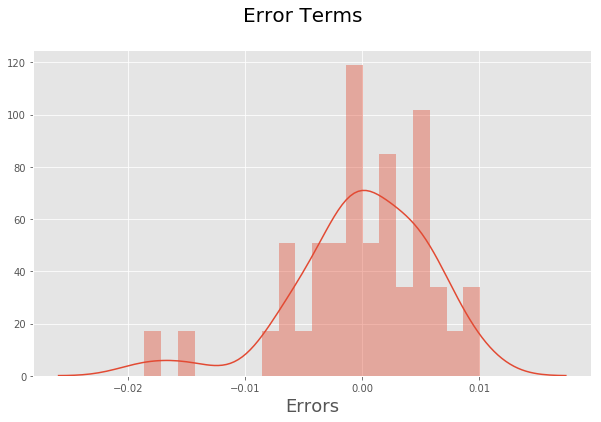

In [333]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [334]:
y_test = df_test.pop('gmv')
X_test = df_test

In [335]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [336]:
X_test.head()

order_week     Month      Year  adStock_TV  adStock_Digital  \
6     3.496508  2.079442  7.608374    0.000000         0.528047   
32    4.094345  0.693147  7.608871    0.848092         0.712667   
38    4.189655  1.386294  7.608871    0.998315         0.434195   
35    4.143135  1.098612  7.608871    1.000000         0.704939   
33    4.110874  0.693147  7.608871    0.840296         0.757672   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              0.000000                   0.000000                  0.000000   
32             0.562074                   0.963253                  0.968376   
38             0.858298                   0.816250                  0.912312   
35             0.855724                   0.903255                  0.915779   
33             0.575356                   0.959803                  0.966262   

    adStock_ Affiliates  adStock_SEM    ...      CameraTripod  ExtensionTube  \
6              0.000000     0.000000    ...          0.000000       0.000000   
32             0.993137     0.467760    ...          0.995349       0.000000   
38             0.942289     0.352485    ...          0.949417       0.940597   
35             0.940687     0.378158    ...          0.964899       1.000000   
33             0.990927     0.475426    ...          0.993964       0.966883   

      Filter     Flash  FlashShoeAdapter      Lens  ReflectorUmbrella  \
6   0.000000  0.000000               0.0  0.000000                0.0   
32  0.981238  0.982579               0.0  0.976999                0.0   
38  0.983239  0.978389               0.0  0.974892                0.0   
35  1.000000  0.980577               0.0  0.981170                1.0   
33  0.977960  0.994027               0.0  0.970778                0.0   

     Softbox     Strap  Telescope  
6   0.000000  0.000000   0.000000  
32  0.000000  0.984941   0.956799  
38  0.952225  0.981384   0.977422  
35  0.000000  0.998661   0.983685  
33  0.952225  0.998661   0.978733  

[5 rows x 45 columns]

In [337]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  discount  total_premiumness  CameraTripod
6     1.0  1.000000           0.000000      0.000000
32    1.0  0.073731           8.686092      0.995349
38    1.0  0.166549           8.539150      0.949417
35    1.0  0.175447           8.581482      0.964899
33    1.0  0.258246           8.585786      0.993964
51    1.0  0.161667           7.491088      0.671571
5     1.0  0.171340           0.000000      0.000000
26    1.0  0.154162           8.508354      1.000000
25    1.0  0.000000           8.239857      0.976496
45    1.0  0.297622           8.488382      0.907066
48    1.0  0.364627           8.558335      0.813707

In [338]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

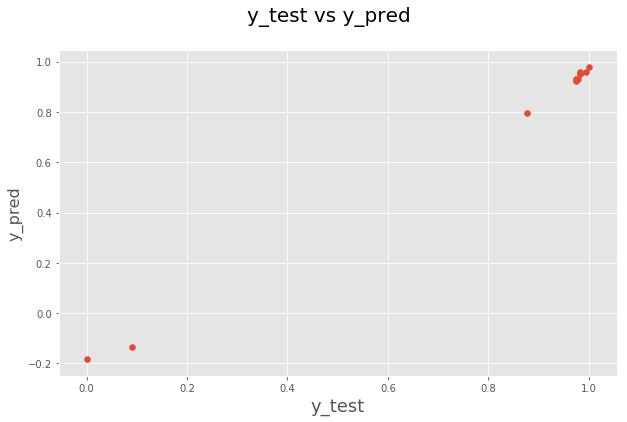

In [339]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity Analysis

In [340]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

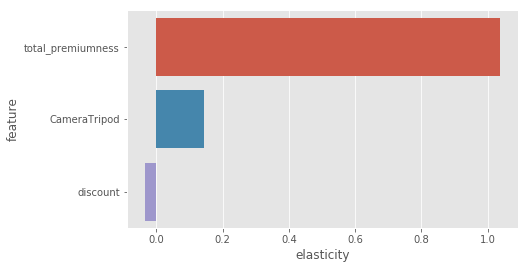

In [341]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Multiplicative model

In [342]:
# replacing '0.0' with '0.0000001' and taking log of the dataset to avaoid the nana values for log 0
df = np.log(final_gaming_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [343]:
df.head()

order_week     Month      Year  adStock_TV  adStock_Digital  \
0    3.295837  1.945910  7.608374   -2.921877        -0.456885   
1    3.332205  1.945910  7.608374   -2.516412        -0.051419   
2    3.367296  1.945910  7.608374   -2.362261         0.102731   
3    3.401197  1.945910  7.608374   -2.293268         0.171724   
4    3.433987  2.079442  7.608374   -2.955022        -0.090807   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.617112                  -8.363510                 -1.103164   
1             1.022577                  -7.958044                 -0.697699   
2             1.176728                  -7.803894                 -0.543549   
3             1.245721                  -7.734901                 -0.474556   
4             0.694922                  -8.420842                 -1.068883   

   adStock_ Affiliates  adStock_SEM         ...           \
0            -1.989137     0.227872         ...            
1            -1.583672     0.633337         ...            
2            -1.429521     0.787488         ...            
3            -1.360528     0.856481         ...            
4            -1.919477     0.591010         ...            

   GamingChargingStation  GamingHeadset  GamingKeyboard  GamingMemoryCard  \
0             -13.815511       0.693147        0.000000        -13.815511   
1             -13.815511       5.176150        6.070738          3.583519   
2             -13.815511       5.187386        5.111988          3.295837   
3             -13.815511       5.645447        5.159055          3.332205   
4             -13.815511       6.049733        4.356709          2.397895   

   GamingMouse  GamingMousePad  GamingSpeaker  JoystickGamingWheel  \
0     1.386294        0.000000     -13.815511           -13.815511   
1     6.878326        4.007333     -13.815511             2.397895   
2     5.883322        3.871201     -13.815511             2.079442   
3     6.107023        4.204693     -13.815511             2.484907   
4     5.476464        3.663562       0.000000             2.944439   

   MotionController  TVOutCableAccessory  
0        -13.815511           -13.815511  
1          2.772589             4.290459  
2          2.397895             4.521789  
3          2.397895             4.532599  
4          2.079442             4.369448  

[5 rows x 39 columns]

In [344]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [345]:
# initialising scaler
scaler = MinMaxScaler()

In [346]:
# checking the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [347]:
# Apply scaler() to all the columns except the categorical features
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [348]:
# assigning the values for x_train and y_train
y_train = df_train.pop('gmv')
X_train = df_train

In [349]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [350]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_Radio', 'NPS', 'discount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [351]:
# neglecting the features not selected in top 20 by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Digital', 'adStock_SEM',
       'adStock_Other', 'sla', 'product_procurement_sla', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamingChargingStation', 'GamingSpeaker'],
      dtype='object')

In [352]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [353]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2420.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.11e-31
Time:                        19:15:00   Log-Likelihood:                 172.67
No. Observations:                  42   AIC:                            -303.3
Df Residuals:                      21   BIC:                            -266.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.970380e+11
5    adStock_Online marketing  2.080142e+04
6         adStock_ Affiliates  1.892141e+04
12              GamingAdapter  4.814400e+02
14             GamingKeyboard  4.554700e+02
11         GamingAccessoryKit  4.462100e+02
17             GamingMousePad  3.897700e+02
20        TVOutCableAccessory  3.774500e+02
4   adStock_Content Marketing  2.366900e+02
16                GamingMouse  2.097900e+02
1                        Year  2.090200e+02
13              GamingHeadset  2.062100e+02
7               adStock_Radio  1.675900e+02
2                  adStock_TV  1.471200e+02
18        JoystickGamingWheel  1.375400e+02
19           MotionController  1.132100e+02
10                    GamePad  1.008100e+02
15           GamingMemoryCard  6.194000e+01
8                         NPS  3.680000e+01
3         adStock_Sponsorship  3.250000e+01
9                    discount  1.134000e+01

In [354]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["TVOutCableAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2594.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.58e-32
Time:                        19:15:00   Log-Likelihood:                 172.07
No. Observations:                  42   AIC:                            -304.1
Df Residuals:                      22   BIC:                            -269.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.882658e+11
5    adStock_Online marketing  2.047966e+04
6         adStock_ Affiliates  1.852108e+04
14             GamingKeyboard  4.486300e+02
11         GamingAccessoryKit  4.458100e+02
17             GamingMousePad  3.838100e+02
12              GamingAdapter  3.402900e+02
4   adStock_Content Marketing  2.361500e+02
16                GamingMouse  2.069900e+02
13              GamingHeadset  2.029200e+02
1                        Year  1.997100e+02
7               adStock_Radio  1.552800e+02
18        JoystickGamingWheel  1.374300e+02
2                  adStock_TV  1.339700e+02
19           MotionController  1.039700e+02
10                    GamePad  9.351000e+01
15           GamingMemoryCard  4.866000e+01
8                         NPS  3.622000e+01
3         adStock_Sponsorship  3.131000e+01
9                    discount  1.133000e+01

In [355]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2720.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.19e-34
Time:                        19:15:00   Log-Likelihood:                 170.99
No. Observations:                  42   AIC:                            -304.0
Df Residuals:                      23   BIC:                            -271.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.822951e+11
5    adStock_Online marketing  1.907664e+04
6         adStock_ Affiliates  1.710203e+04
14             GamingKeyboard  3.824500e+02
12              GamingAdapter  3.384100e+02
11         GamingAccessoryKit  2.578500e+02
4   adStock_Content Marketing  2.333900e+02
16                GamingMouse  2.047000e+02
13              GamingHeadset  2.028400e+02
1                        Year  1.933800e+02
7               adStock_Radio  1.526100e+02
17        JoystickGamingWheel  1.374200e+02
18           MotionController  1.023500e+02
2                  adStock_TV  9.777000e+01
10                    GamePad  9.132000e+01
15           GamingMemoryCard  4.861000e+01
8                         NPS  3.586000e+01
3         adStock_Sponsorship  2.355000e+01
9                    discount  9.080000e+00

In [356]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2606.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.08e-35
Time:                        19:15:00   Log-Likelihood:                 168.01
No. Observations:                  42   AIC:                            -300.0
Df Residuals:                      24   BIC:                            -268.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.225753e+11
5    adStock_Online marketing  1.893538e+04
6         adStock_ Affiliates  1.696291e+04
13             GamingKeyboard  3.823000e+02
11              GamingAdapter  3.372500e+02
10         GamingAccessoryKit  2.554100e+02
4   adStock_Content Marketing  2.129900e+02
15                GamingMouse  2.019900e+02
12              GamingHeadset  1.968600e+02
16        JoystickGamingWheel  1.310500e+02
1                        Year  1.300200e+02
7               adStock_Radio  1.190500e+02
17           MotionController  9.857000e+01
2                  adStock_TV  9.696000e+01
9                     GamePad  8.749000e+01
14           GamingMemoryCard  4.797000e+01
3         adStock_Sponsorship  2.350000e+01
8                    discount  8.990000e+00

In [357]:
# Let's remove feature  with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2682.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.29e-36
Time:                        19:15:00   Log-Likelihood:                 166.48
No. Observations:                  42   AIC:                            -299.0
Df Residuals:                      25   BIC:                            -269.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.224386e+11
5        adStock_ Affiliates  3.550390e+03
4   adStock_Online marketing  3.450790e+03
10             GamingAdapter  2.891000e+02
9         GamingAccessoryKit  2.457700e+02
12            GamingKeyboard  2.263300e+02
14               GamingMouse  1.456800e+02
11             GamingHeadset  1.312700e+02
1                       Year  1.298700e+02
6              adStock_Radio  1.182500e+02
16          MotionController  9.774000e+01
8                    GamePad  8.702000e+01
15       JoystickGamingWheel  8.549000e+01
2                 adStock_TV  6.080000e+01
13          GamingMemoryCard  4.737000e+01
3        adStock_Sponsorship  2.093000e+01
7                   discount  8.380000e+00

In [358]:
# Let's drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2761.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.08e-37
Time:                        19:15:01   Log-Likelihood:                 164.91
No. Observations:                  42   AIC:                            -297.8
Df Residuals:                      26   BIC:                            -270.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.045440e+11
5        adStock_ Affiliates  3.535390e+03
4   adStock_Online marketing  3.450340e+03
10             GamingAdapter  2.890900e+02
9         GamingAccessoryKit  2.314500e+02
1                       Year  1.109000e+02
6              adStock_Radio  1.064500e+02
13               GamingMouse  9.601000e+01
11             GamingHeadset  9.392000e+01
15          MotionController  9.186000e+01
14       JoystickGamingWheel  8.526000e+01
8                    GamePad  7.071000e+01
2                 adStock_TV  6.076000e+01
12          GamingMemoryCard  4.720000e+01
3        adStock_Sponsorship  2.093000e+01
7                   discount  7.560000e+00

In [359]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.32e-39
Time:                        19:15:01   Log-Likelihood:                 163.30
No. Observations:                  42   AIC:                            -296.6
Df Residuals:                      27   BIC:                            -270.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.023429e+11
3   adStock_Online marketing  2.732640e+03
4        adStock_ Affiliates  2.567450e+03
9              GamingAdapter  2.831200e+02
8         GamingAccessoryKit  2.235000e+02
1                       Year  1.085600e+02
5              adStock_Radio  1.053300e+02
10             GamingHeadset  9.300000e+01
12               GamingMouse  9.149000e+01
14          MotionController  8.242000e+01
13       JoystickGamingWheel  7.696000e+01
7                    GamePad  6.574000e+01
11          GamingMemoryCard  4.236000e+01
2        adStock_Sponsorship  1.226000e+01
6                   discount  6.130000e+00

In [360]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2820.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.89e-40
Time:                        19:15:01   Log-Likelihood:                 160.79
No. Observations:                  42   AIC:                            -293.6
Df Residuals:                      28   BIC:                            -269.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  7.441137e+10
7         GamingAccessoryKit  2.235000e+02
8              GamingAdapter  1.499900e+02
9              GamingHeadset  9.246000e+01
11               GamingMouse  9.038000e+01
4              adStock_Radio  7.983000e+01
1                       Year  7.893000e+01
6                    GamePad  6.570000e+01
13          MotionController  6.310000e+01
12       JoystickGamingWheel  5.049000e+01
10          GamingMemoryCard  4.179000e+01
3   adStock_Online marketing  1.523000e+01
2        adStock_Sponsorship  9.120000e+00
5                   discount  6.130000e+00

In [361]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2971.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.10e-41
Time:                        19:15:01   Log-Likelihood:                 159.47
No. Observations:                  42   AIC:                            -292.9
Df Residuals:                      29   BIC:                            -270.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  932.32
6         GamingAccessoryKit  223.48
7              GamingAdapter  142.78
8              GamingHeadset   90.92
10               GamingMouse   89.96
12          MotionController   63.07
5                    GamePad   56.00
11       JoystickGamingWheel   49.42
9           GamingMemoryCard   37.86
2   adStock_Online marketing   14.76
1        adStock_Sponsorship    8.94
4                   discount    6.12
3              adStock_Radio    3.14

In [362]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3189.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.44e-43
Time:                        19:15:01   Log-Likelihood:                 158.42
No. Observations:                  42   AIC:                            -292.8
Df Residuals:                      30   BIC:                            -272.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  917.56
5         GamingAccessoryKit  221.67
6              GamingAdapter  142.02
7              GamingHeadset   89.44
9                GamingMouse   88.84
11          MotionController   62.68
4                    GamePad   55.44
10       JoystickGamingWheel   40.03
8           GamingMemoryCard   29.56
3                   discount    6.11
1   adStock_Online marketing    4.87
2              adStock_Radio    1.70

In [363]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3570.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.51e-44
Time:                        19:15:01   Log-Likelihood:                 158.11
No. Observations:                  42   AIC:                            -294.2
Df Residuals:                      31   BIC:                            -275.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  864.85
4         GamingAccessoryKit  219.76
5              GamingAdapter  142.02
8                GamingMouse   86.86
6              GamingHeadset   85.54
10          MotionController   61.96
3                    GamePad   52.79
9        JoystickGamingWheel   37.10
7           GamingMemoryCard   29.31
2                   discount    6.06
1   adStock_Online marketing    4.87

In [364]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3783.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.09e-46
Time:                        19:15:01   Log-Likelihood:                 156.44
No. Observations:                  42   AIC:                            -292.9
Df Residuals:                      32   BIC:                            -275.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  845.84
4        GamingAccessoryKit  217.43
5             GamingAdapter   94.79
8               GamingMouse   85.14
6             GamingHeadset   82.56
3                   GamePad   47.08
9       JoystickGamingWheel   37.03
7          GamingMemoryCard   29.28
2                  discount    6.02
1  adStock_Online marketing    4.59

In [365]:
# dropping the feature with highest p-value

X_train_new11= X_train_new10.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4252.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.98e-47
Time:                        19:15:01   Log-Likelihood:                 155.78
No. Observations:                  42   AIC:                            -293.6
Df Residuals:                      33   BIC:                            -277.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  789.69
4        GamingAccessoryKit  202.06
7               GamingMouse   79.69
5             GamingHeadset   79.26
3                   GamePad   39.52
6          GamingMemoryCard   19.35
8       JoystickGamingWheel   17.15
2                  discount    5.80
1  adStock_Online marketing    4.39

In [366]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4493.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.69e-48
Time:                        19:15:01   Log-Likelihood:                 153.51
No. Observations:                  42   AIC:                            -291.0
Df Residuals:                      34   BIC:                            -277.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  701.24
4        GamingAccessoryKit  187.18
5             GamingHeadset   74.49
6               GamingMouse   73.60
3                   GamePad   34.81
7       JoystickGamingWheel   14.48
2                  discount    5.75
1  adStock_Online marketing    4.36

In [367]:
# dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4625.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.23e-49
Time:                        19:15:01   Log-Likelihood:                 150.27
No. Observations:                  42   AIC:                            -286.5
Df Residuals:                      35   BIC:                            -274.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  381.80
3        GamingAccessoryKit   40.76
2                   GamePad   34.81
4             GamingHeadset   27.09
5               GamingMouse   22.89
6       JoystickGamingWheel   14.37
1  adStock_Online marketing    3.93

In [368]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4578.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.14e-49
Time:                        19:15:01   Log-Likelihood:                 145.64
No. Observations:                  42   AIC:                            -279.3
Df Residuals:                      36   BIC:                            -268.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2682    

Features     VIF
0                const  260.88
2   GamingAccessoryKit   34.49
1              GamePad   31.88
3        GamingHeadset   17.45
4          GamingMouse   15.90
5  JoystickGamingWheel   13.96

In [369]:
# dropping the feature on the basis of highest p-value
X_train_new15= X_train_new14.drop(["GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1165.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.33e-38
Time:                        19:15:01   Log-Likelihood:                 111.79
No. Observations:                  42   AIC:                            -213.6
Df Residuals:                      37   BIC:                            -204.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2904    

Features     VIF
0                const  258.73
1   GamingAccessoryKit   31.97
2        GamingHeadset   15.81
3          GamingMouse   15.77
4  JoystickGamingWheel    7.04

In [370]:
# dropping the feature on the basis of highest vif
X_train_new16= X_train_new15.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1539.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.06e-39
Time:                        19:15:01   Log-Likelihood:                 111.03
No. Observations:                  42   AIC:                            -214.1
Df Residuals:                      38   BIC:                            -207.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2472    

Features    VIF
0                const  81.08
3  JoystickGamingWheel   6.35
1        GamingHeadset   3.35
2          GamingMouse   3.08

In [371]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top model finding Adjusted R-squared
x_trains = [X_train_lm]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.7922398469737189


In [372]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.005621550835212574


### Elasticity

In [373]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

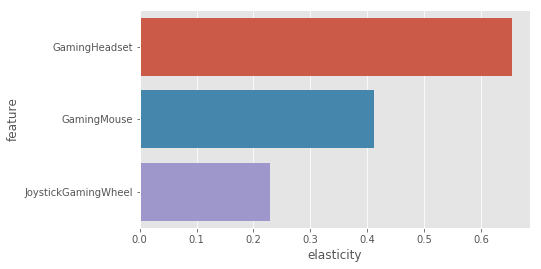

In [374]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Residual Analysis


In [375]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

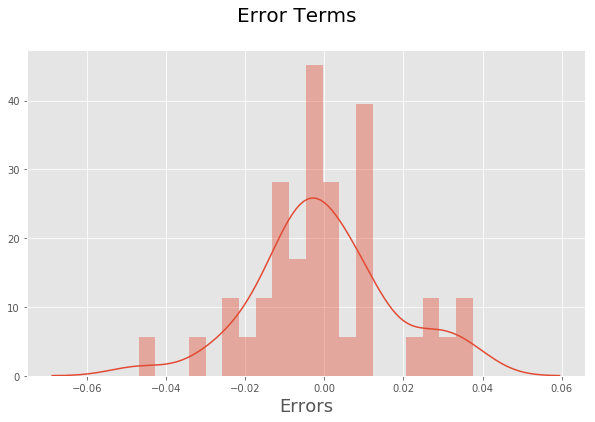

In [376]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [377]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [378]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  GamingHeadset  GamingMouse  JoystickGamingWheel
25    1.0       0.980153     0.976396             0.902053
48    1.0       0.914589     0.968585             1.000000
52    1.0       0.806907     0.913212             0.965255
37    1.0       0.869851     0.947593             0.913023
6     1.0       0.000000     0.000000             0.000000

In [379]:
# Making predictions using the model
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

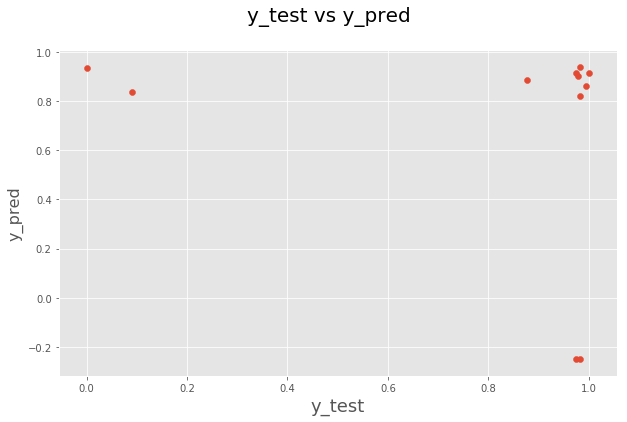

In [380]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### III. Home Audio - Multiplicative model

In [381]:
#Creating df with removal of features uncontrollable by the company, also, replacing 0.0 with lowest value to handle infinity given by log
df = np.log(final_home_audio_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [382]:
#Checking the dataset
df.head()

order_week     Month      Year  adStock_TV  adStock_Digital  \
0    3.295837  1.945910  7.608374   -2.921877        -0.456885   
1    3.332205  1.945910  7.608374   -2.516412        -0.051419   
2    3.367296  1.945910  7.608374   -2.362261         0.102731   
3    3.401197  1.945910  7.608374   -2.293268         0.171724   
4    3.433987  2.079442  7.608374   -2.955022        -0.090807   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.617112                  -8.363510                 -1.103164   
1             1.022577                  -7.958044                 -0.697699   
2             1.176728                  -7.803894                 -0.543549   
3             1.245721                  -7.734901                 -0.474556   
4             0.694922                  -8.420842                 -1.068883   

   adStock_ Affiliates  adStock_SEM      ...         BoomBox  DJController  \
0            -1.989137     0.227872      ...        1.386294    -13.815511   
1            -1.583672     0.633337      ...        4.094345    -13.815511   
2            -1.429521     0.787488      ...        4.043051    -13.815511   
3            -1.360528     0.856481      ...        4.174387    -13.815511   
4            -1.919477     0.591010      ...        3.610918    -13.815511   

        Dock  DockingStation   FMRadio  HiFiSystem  HomeAudioSpeaker  \
0 -13.815511      -13.815511  0.693147  -13.815511          3.258097   
1   3.401197        0.000000  6.169611    2.564949          7.155396   
2   3.912023        0.000000  6.276643    3.295837          7.320527   
3   4.025352      -13.815511  6.232448    2.995732          7.194437   
4   3.784190      -13.815511  5.918894    2.397895          6.844815   

    SlingBox  SoundMixer  VoiceRecorder  
0 -13.815511  -13.815511     -13.815511  
1 -13.815511  -13.815511       3.218876  
2 -13.815511  -13.815511       3.258097  
3 -13.815511  -13.815511       3.091042  
4 -13.815511  -13.815511       2.772589  

[5 rows x 34 columns]

In [383]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [384]:
scaler = MinMaxScaler()

In [385]:
#Checking columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [386]:
# Apply scaler() to all the columns except the categorical ones
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [387]:
y_train = df_train.pop('gmv')
X_train = df_train

In [388]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [389]:
#Extracting selected columns by RFE into a list
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'NPS', 'BoomBox', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [390]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'product_procurement_sla', 'discount',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'DJController', 'SlingBox'],
      dtype='object')

In [391]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [392]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2749.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.77e-29
Time:                        19:15:03   Log-Likelihood:                 182.68
No. Observations:                  40   AIC:                            -323.4
Df Residuals:                      19   BIC:                            -287.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.174567e+11
6    adStock_Online marketing  1.851995e+04
7         adStock_ Affiliates  1.557983e+04
10              adStock_Other  2.940140e+03
9               adStock_Radio  2.868780e+03
1                        Year  3.366700e+02
5   adStock_Content Marketing  3.217500e+02
20              VoiceRecorder  1.943300e+02
2                  adStock_TV  1.409600e+02
14                       Dock  1.391100e+02
17                 HiFiSystem  1.089300e+02
3             adStock_Digital  5.217000e+01
8                 adStock_SEM  5.012000e+01
16                    FMRadio  4.698000e+01
4         adStock_Sponsorship  3.839000e+01
12                        NPS  2.555000e+01
18           HomeAudioSpeaker  1.448000e+01
11                        sla  1.258000e+01
13                    BoomBox  6.180000e+00
15             DockingStation  4.770000e+00
19                 SoundMixer  3.090000e+00

In [393]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3045.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.55e-30
Time:                        19:15:03   Log-Likelihood:                 182.67
No. Observations:                  40   AIC:                            -325.3
Df Residuals:                      20   BIC:                            -291.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  3.082335e+11
6        adStock_ Affiliates  4.275460e+03
5   adStock_Online marketing  4.009960e+03
9              adStock_Other  2.575540e+03
8              adStock_Radio  2.328760e+03
1                       Year  3.268900e+02
19             VoiceRecorder  1.839900e+02
13                      Dock  1.368400e+02
2                 adStock_TV  1.099400e+02
16                HiFiSystem  1.075600e+02
15                   FMRadio  4.504000e+01
4        adStock_Sponsorship  2.470000e+01
7                adStock_SEM  2.338000e+01
11                       NPS  2.100000e+01
3            adStock_Digital  1.864000e+01
17          HomeAudioSpeaker  1.448000e+01
10                       sla  1.233000e+01
12                   BoomBox  6.150000e+00
14            DockingStation  4.660000e+00
18                SoundMixer  3.090000e+00

In [394]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3309.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.20e-32
Time:                        19:15:03   Log-Likelihood:                 182.28
No. Observations:                  40   AIC:                            -326.6
Df Residuals:                      21   BIC:                            -294.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  3.080754e+11
6        adStock_ Affiliates  4.224390e+03
5   adStock_Online marketing  3.937830e+03
9              adStock_Other  2.575490e+03
8              adStock_Radio  2.326980e+03
1                       Year  3.267200e+02
18             VoiceRecorder  1.622500e+02
13                      Dock  1.128000e+02
2                 adStock_TV  1.089800e+02
15                HiFiSystem  1.075600e+02
14                   FMRadio  4.500000e+01
4        adStock_Sponsorship  2.456000e+01
7                adStock_SEM  2.338000e+01
11                       NPS  2.076000e+01
3            adStock_Digital  1.863000e+01
16          HomeAudioSpeaker  1.428000e+01
10                       sla  1.198000e+01
12                   BoomBox  5.970000e+00
17                SoundMixer  3.080000e+00

In [395]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3564.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.11e-34
Time:                        19:15:03   Log-Likelihood:                 181.69
No. Observations:                  40   AIC:                            -327.4
Df Residuals:                      22   BIC:                            -297.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.212419e+11
6        adStock_ Affiliates  4.053250e+03
5   adStock_Online marketing  3.842800e+03
8              adStock_Radio  2.139960e+03
9              adStock_Other  2.125410e+03
1                       Year  2.346300e+02
2                 adStock_TV  9.643000e+01
15                HiFiSystem  7.232000e+01
13                      Dock  6.337000e+01
14                   FMRadio  4.389000e+01
4        adStock_Sponsorship  2.371000e+01
7                adStock_SEM  2.286000e+01
11                       NPS  2.035000e+01
3            adStock_Digital  1.862000e+01
16          HomeAudioSpeaker  1.417000e+01
10                       sla  1.130000e+01
12                   BoomBox  5.300000e+00
17                SoundMixer  2.710000e+00

In [396]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3874.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.41e-35
Time:                        19:15:03   Log-Likelihood:                 181.26
No. Observations:                  40   AIC:                            -328.5
Df Residuals:                      23   BIC:                            -299.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.140494e+11
6        adStock_ Affiliates  3.603920e+03
5   adStock_Online marketing  3.451380e+03
8              adStock_Radio  2.134890e+03
9              adStock_Other  2.091200e+03
1                       Year  2.270100e+02
2                 adStock_TV  9.536000e+01
14                HiFiSystem  7.138000e+01
12                      Dock  6.335000e+01
13                   FMRadio  4.236000e+01
4        adStock_Sponsorship  2.331000e+01
7                adStock_SEM  2.284000e+01
11                       NPS  2.033000e+01
3            adStock_Digital  1.862000e+01
15          HomeAudioSpeaker  1.386000e+01
10                       sla  1.053000e+01
16                SoundMixer  2.440000e+00

In [397]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4210.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.79e-37
Time:                        19:15:03   Log-Likelihood:                 180.78
No. Observations:                  40   AIC:                            -329.6
Df Residuals:                      24   BIC:                            -302.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.054000e+11
6        adStock_ Affiliates  3.290470e+03
5   adStock_Online marketing  3.196010e+03
8              adStock_Radio  2.130160e+03
9              adStock_Other  2.089570e+03
1                       Year  2.178300e+02
2                 adStock_TV  8.774000e+01
12                   FMRadio  3.933000e+01
13                HiFiSystem  2.961000e+01
7                adStock_SEM  2.227000e+01
11                       NPS  2.030000e+01
4        adStock_Sponsorship  1.971000e+01
3            adStock_Digital  1.842000e+01
14          HomeAudioSpeaker  1.385000e+01
10                       sla  1.053000e+01
15                SoundMixer  2.420000e+00

In [398]:
# Let's drop feature with higest p-value
X_train_new5 = X_train_new4.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.76e-38
Time:                        19:15:03   Log-Likelihood:                 178.39
No. Observations:                  40   AIC:                            -326.8
Df Residuals:                      25   BIC:                            -301.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1162.1527    

Features           VIF
0                 const  2.013457e+11
7         adStock_Radio  2.130000e+03
8         adStock_Other  2.089500e+03
1                  Year  2.135300e+02
2            adStock_TV  6.519000e+01
5   adStock_ Affiliates  4.857000e+01
11              FMRadio  3.767000e+01
12           HiFiSystem  2.538000e+01
6           adStock_SEM  2.217000e+01
3       adStock_Digital  1.780000e+01
10                  NPS  1.449000e+01
13     HomeAudioSpeaker  1.382000e+01
9                   sla  1.042000e+01
4   adStock_Sponsorship  8.450000e+00
14           SoundMixer  2.410000e+00

In [399]:
# Let's drop feature with higest p-value
X_train_new6 = X_train_new5.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.09e-39
Time:                        19:15:03   Log-Likelihood:                 176.13
No. Observations:                  40   AIC:                            -324.3
Df Residuals:                      26   BIC:                            -300.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1334.4135    

Features           VIF
0                 const  1.697774e+11
8         adStock_Other  1.679240e+03
7         adStock_Radio  1.481730e+03
1                  Year  1.800500e+02
2            adStock_TV  5.892000e+01
5   adStock_ Affiliates  4.663000e+01
11              FMRadio  2.691000e+01
6           adStock_SEM  1.985000e+01
10                  NPS  1.429000e+01
3       adStock_Digital  1.258000e+01
12     HomeAudioSpeaker  1.199000e+01
9                   sla  1.003000e+01
4   adStock_Sponsorship  7.900000e+00
13           SoundMixer  2.410000e+00

In [400]:
# Let's drop feature with higest p-value
X_train_new7= X_train_new6.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4274.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.43e-41
Time:                        19:15:03   Log-Likelihood:                 174.27
No. Observations:                  40   AIC:                            -322.5
Df Residuals:                      27   BIC:                            -300.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1322.7674    

Features           VIF
0                 const  1.696207e+11
1                  Year  1.798800e+02
7         adStock_Other  1.576400e+02
5   adStock_ Affiliates  4.173000e+01
2            adStock_TV  3.742000e+01
10              FMRadio  2.527000e+01
6           adStock_SEM  1.888000e+01
11     HomeAudioSpeaker  1.178000e+01
9                   NPS  1.177000e+01
3       adStock_Digital  1.130000e+01
8                   sla  9.580000e+00
4   adStock_Sponsorship  7.870000e+00
12           SoundMixer  2.360000e+00

In [401]:
# Let's drop feature with higest p-value
X_train_new8= X_train_new7.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4660.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.27e-42
Time:                        19:15:03   Log-Likelihood:                 173.53
No. Observations:                  40   AIC:                            -323.1
Df Residuals:                      28   BIC:                            -302.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1467.3019    

Features           VIF
0                 const  1.118587e+11
1                  Year  1.186200e+02
7         adStock_Other  1.179600e+02
5   adStock_ Affiliates  3.969000e+01
2            adStock_TV  3.725000e+01
9               FMRadio  2.458000e+01
6           adStock_SEM  1.749000e+01
10     HomeAudioSpeaker  1.172000e+01
3       adStock_Digital  1.086000e+01
8                   sla  8.620000e+00
4   adStock_Sponsorship  7.570000e+00
11           SoundMixer  2.290000e+00

In [402]:
# Let's drop feature with higest VIF

X_train_new9= X_train_new8.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1812.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.72e-38
Time:                        19:15:03   Log-Likelihood:                 152.05
No. Observations:                  40   AIC:                            -282.1
Df Residuals:                      29   BIC:                            -263.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0073    

Features    VIF
0                 const  44.69
4   adStock_ Affiliates  34.08
1            adStock_TV  30.96
8               FMRadio  23.67
5           adStock_SEM  13.81
9      HomeAudioSpeaker  10.98
2       adStock_Digital   8.85
7                   sla   8.41
3   adStock_Sponsorship   6.57
6         adStock_Other   3.01
10           SoundMixer   2.29

In [403]:
# Let's drop feature with higest p-value
X_train_new10= X_train_new9.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2072.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.22e-39
Time:                        19:15:03   Log-Likelihood:                 151.94
No. Observations:                  40   AIC:                            -283.9
Df Residuals:                      30   BIC:                            -267.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

Features    VIF
0                const  35.63
1           adStock_TV  22.47
7              FMRadio  20.56
4  adStock_ Affiliates  19.28
8     HomeAudioSpeaker  10.19
6                  sla   7.20
3  adStock_Sponsorship   4.78
5        adStock_Other   3.00
2      adStock_Digital   2.33
9           SoundMixer   2.22

In [404]:
# Let's drop feature with higest p-value
X_train_new11= X_train_new10.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2405.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.46e-41
Time:                        19:15:03   Log-Likelihood:                 151.91
No. Observations:                  40   AIC:                            -285.8
Df Residuals:                      31   BIC:                            -270.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0062    

Features    VIF
0                const  35.50
3  adStock_ Affiliates  18.69
1           adStock_TV  18.19
6              FMRadio  17.61
7     HomeAudioSpeaker   9.55
5                  sla   6.00
4        adStock_Other   2.36
2      adStock_Digital   2.07
8           SoundMixer   1.80

In [405]:
# Let's drop feature with higest p-value
X_train_new12= X_train_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2812.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.19e-43
Time:                        19:15:03   Log-Likelihood:                 151.74
No. Observations:                  40   AIC:                            -287.5
Df Residuals:                      32   BIC:                            -274.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

Features    VIF
0                const  35.44
5              FMRadio  15.67
6     HomeAudioSpeaker   7.85
4                  sla   5.88
3        adStock_Other   2.35
2  adStock_ Affiliates   2.32
1      adStock_Digital   1.93
7           SoundMixer   1.27

In [406]:
# Let's drop feature with higest p-value
X_train_new13= X_train_new12.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3324.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.02e-44
Time:                        19:15:03   Log-Likelihood:                 151.39
No. Observations:                  40   AIC:                            -288.8
Df Residuals:                      33   BIC:                            -276.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0055    

Features    VIF
0                const  34.78
4              FMRadio  15.67
5     HomeAudioSpeaker   7.72
3                  sla   5.87
1  adStock_ Affiliates   2.28
2        adStock_Other   1.49
6           SoundMixer   1.26

In [407]:
# Let's drop feature with higest p-value
X_train_new14= X_train_new13.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3821.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.02e-45
Time:                        19:15:03   Log-Likelihood:                 149.93
No. Observations:                  40   AIC:                            -287.9
Df Residuals:                      34   BIC:                            -277.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0069    

Features    VIF
0                const  33.96
3              FMRadio  15.65
4     HomeAudioSpeaker   7.67
2                  sla   5.50
1  adStock_ Affiliates   2.24
5           SoundMixer   1.20

In [408]:
# Let's drop feature with higest VIF
X_train_new15= X_train_new14.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4608.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.23e-47
Time:                        19:15:03   Log-Likelihood:                 148.64
No. Observations:                  40   AIC:                            -287.3
Df Residuals:                      35   BIC:                            -278.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0066      0.006  

Features    VIF
0             const  33.91
2           FMRadio  12.51
3  HomeAudioSpeaker   7.67
1               sla   3.35
4        SoundMixer   1.15

In [409]:
# Let's drop feature with higest p-value
X_train_new16= X_train_new15.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2701.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.05e-42
Time:                        19:15:04   Log-Likelihood:                 131.69
No. Observations:                  40   AIC:                            -255.4
Df Residuals:                      36   BIC:                            -248.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0186      0.008  

Features    VIF
0             const  30.76
1               sla   1.48
2  HomeAudioSpeaker   1.38
3        SoundMixer   1.08

##### Selecting this model as the final model as the VIFs & the p-values are in acceptable range

In [410]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='r2', cv=10)
scores.mean()

0.904274791706268

In [411]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='neg_mean_squared_error', cv=10)
-scores.mean()

0.000249637442552072

### Residual Analysis


In [412]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

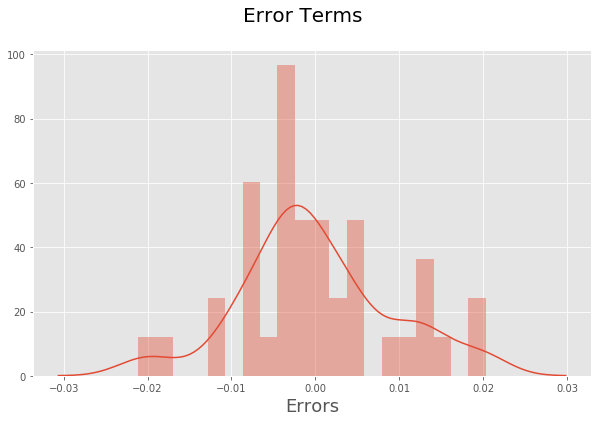

In [413]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Elasticity

In [414]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

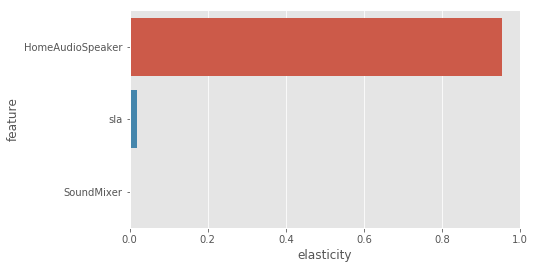

In [415]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Model Evaluation

In [416]:
X_test = df_test
y_test = df_test.pop('gmv')

In [417]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const       sla  HomeAudioSpeaker  SoundMixer
6     1.0  0.429915          0.887885    0.000000
36    1.0  0.390431          0.896755    0.000000
37    1.0  0.473084          0.876060    0.000000
28    1.0  0.255891          1.000000    0.000000
43    1.0  0.291969          0.876738    0.954404
49    1.0  0.000000          0.790585    0.000000
5     1.0  1.000000          0.000000    0.000000
33    1.0  0.363384          0.982409    0.000000
20    1.0  0.268393          0.994778    0.000000
42    1.0  0.302368          0.890951    1.000000

In [418]:
# Making predictions using the fourth model
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

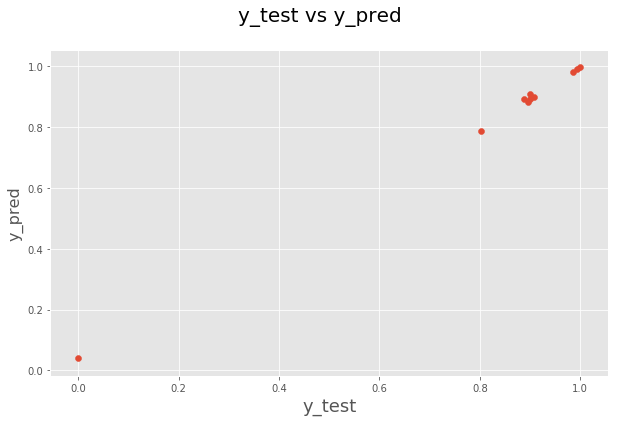

In [419]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Koyk Model building

**Function to create lagged GMV for each of the three categories for creating this model**

In [420]:
def createKyockKPI(df):
    df['gmv_lag'] = df['gmv'].shift(1)
    return df.fillna(0)

### I. Camera Accessory - Kyock's Model

In [421]:
# adding lag variable in the camera data set
df = createKyockKPI(final_camera_data)
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM    ...      ExtensionTube  Filter  Flash  FlashShoeAdapter  \
0     1.255924    ...                0.0     0.0    0.0               0.0   
1     1.883887    ...                0.0   226.0   17.0               0.0   
2     2.197868    ...                0.0   188.0   23.0               0.0   
3     2.354858    ...                0.0   194.0   18.0               0.0   
4     1.805811    ...                0.0   112.0   26.0               0.0   

    Lens  ReflectorUmbrella  Softbox  Strap  Telescope    gmv_lag  
0    2.0                0.0      0.0    0.0        0.0        0.0  
1  366.0                0.0      0.0   13.0       16.0    15375.0  
2  382.0                0.0      0.0   24.0       22.0  2019042.0  
3  423.0                0.0      0.0   23.0       30.0  2249245.0  
4  233.0                0.0      0.0   23.0       13.0  2105858.0  

[5 rows x 51 columns]

In [422]:
df.shape

(52, 51)

In [423]:
#Dropping the features which cannot be handled by the company
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [424]:
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM    ...      ExtensionTube  Filter  Flash  FlashShoeAdapter  \
0     1.255924    ...                0.0     0.0    0.0               0.0   
1     1.883887    ...                0.0   226.0   17.0               0.0   
2     2.197868    ...                0.0   188.0   23.0               0.0   
3     2.354858    ...                0.0   194.0   18.0               0.0   
4     1.805811    ...                0.0   112.0   26.0               0.0   

    Lens  ReflectorUmbrella  Softbox  Strap  Telescope    gmv_lag  
0    2.0                0.0      0.0    0.0        0.0        0.0  
1  366.0                0.0      0.0   13.0       16.0    15375.0  
2  382.0                0.0      0.0   24.0       22.0  2019042.0  
3  423.0                0.0      0.0   23.0       30.0  2249245.0  
4  233.0                0.0      0.0   23.0       13.0  2105858.0  

[5 rows x 47 columns]

In [425]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [426]:
scaler = MinMaxScaler()

In [427]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope',
       'gmv_lag'],
      dtype='object')

In [428]:
# Apply scaler() to all the columns except the categoriacal variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days', 
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [429]:
y_train = df_train.pop('gmv')
X_train = df_train

In [430]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [431]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'Binoculars', 'CameraBattery', 'CameraMicrophone',
       'CameraTripod', 'Filter', 'Flash', 'ReflectorUmbrella', 'Strap'],
      dtype='object')

In [432]:
# negelecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Sponsorship',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CameraAccessory', 'CameraBag', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMount', 'CameraRemoteControl', 'ExtensionTube',
       'FlashShoeAdapter', 'Lens', 'Softbox', 'Telescope', 'gmv_lag'],
      dtype='object')

In [433]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [434]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.91e-19
Time:                        19:15:10   Log-Likelihood:                 127.76
No. Observations:                  41   AIC:                            -213.5
Df Residuals:                      20   BIC:                            -177.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6                 adStock_SEM  6782.18
2             adStock_Digital  5000.14
4    adStock_Online marketing  4531.15
5         adStock_ Affiliates  4063.24
7               adStock_Radio  2288.20
8               adStock_Other  2231.61
0                       const   778.15
1                  adStock_TV   343.16
3   adStock_Content Marketing   185.06
11                   discount    26.04
18                      Flash    19.80
12                        NPS    14.91
14              CameraBattery    14.37
16               CameraTripod    13.88
15           CameraMicrophone    11.65
13                 Binoculars     9.37
10    product_procurement_sla     8.22
9                         sla     7.26
20                      Strap     7.22
17                     Filter     6.22
19          ReflectorUmbrella     6.03

In [435]:
# Let's drop feature  with highest p-value 
X_train_new= X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     242.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.04e-20
Time:                        19:15:10   Log-Likelihood:                 127.52
No. Observations:                  41   AIC:                            -215.0
Df Residuals:                      21   BIC:                            -180.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  6741.69
2            adStock_Digital  4788.79
3   adStock_Online marketing  3088.98
4        adStock_ Affiliates  2974.58
6              adStock_Radio  2281.21
7              adStock_Other  2208.32
0                      const   720.04
1                 adStock_TV   342.53
10                  discount    25.64
17                     Flash    19.79
11                       NPS    14.87
15              CameraTripod    13.87
13             CameraBattery    13.35
14          CameraMicrophone    11.12
12                Binoculars     9.36
9    product_procurement_sla     7.91
19                     Strap     7.22
8                        sla     6.95
16                    Filter     6.12
18         ReflectorUmbrella     4.91

In [436]:
# # Let's drop feature  with highest p-value 
X_train_new1 = X_train_new.drop(["CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     252.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.33e-21
Time:                        19:15:10   Log-Likelihood:                 126.30
No. Observations:                  41   AIC:                            -214.6
Df Residuals:                      22   BIC:                            -182.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  3885.26
2            adStock_Digital  2844.05
6              adStock_Radio  1663.72
3   adStock_Online marketing  1601.27
7              adStock_Other  1591.23
4        adStock_ Affiliates  1455.38
0                      const   718.95
1                 adStock_TV   188.32
10                  discount    18.01
16                     Flash    14.21
11                       NPS    12.86
13             CameraBattery    11.12
14              CameraTripod    10.27
12                Binoculars     8.44
9    product_procurement_sla     7.67
18                     Strap     6.62
8                        sla     6.31
15                    Filter     5.84
17         ReflectorUmbrella     2.02

In [437]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     272.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.88e-22
Time:                        19:15:10   Log-Likelihood:                 125.73
No. Observations:                  41   AIC:                            -215.5
Df Residuals:                      23   BIC:                            -184.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  2505.59
2            adStock_Digital  1781.50
3   adStock_Online marketing  1554.50
4        adStock_ Affiliates  1380.63
6              adStock_Radio  1081.10
7              adStock_Other  1038.03
0                      const   706.68
1                 adStock_TV   139.53
10                  discount    17.41
15                     Flash    13.68
12             CameraBattery     9.79
13              CameraTripod     9.50
11                Binoculars     8.34
9    product_procurement_sla     7.57
17                     Strap     6.59
8                        sla     6.22
14                    Filter     5.83
16         ReflectorUmbrella     1.91

In [438]:
# Let's drop feature  with highest p-value 
X_train_new3 = X_train_new2.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.13e-23
Time:                        19:15:10   Log-Likelihood:                 123.38
No. Observations:                  41   AIC:                            -212.8
Df Residuals:                      24   BIC:                            -183.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  1396.50
3   adStock_Online marketing  1048.26
2            adStock_Digital   987.43
4        adStock_ Affiliates   896.60
6              adStock_Radio   712.08
7              adStock_Other   685.43
0                      const   168.22
1                 adStock_TV    85.32
9                   discount    15.38
14                     Flash    13.67
12              CameraTripod     9.50
10                Binoculars     8.33
11             CameraBattery     8.25
16                     Strap     6.34
13                    Filter     5.78
8                        sla     2.96
15         ReflectorUmbrella     1.81

In [439]:
# Let's drop feature  with highest p-value 
X_train_new4 = X_train_new3.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     251.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.00e-23
Time:                        19:15:10   Log-Likelihood:                 119.84
No. Observations:                  41   AIC:                            -207.7
Df Residuals:                      25   BIC:                            -180.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  1358.01
3   adStock_Online marketing  1020.66
2            adStock_Digital   961.44
4        adStock_ Affiliates   857.96
6              adStock_Radio   668.87
7              adStock_Other   642.32
1                 adStock_TV    80.00
0                      const    59.18
13                     Flash     9.94
9                 Binoculars     8.26
10             CameraBattery     7.57
15                     Strap     6.26
11              CameraTripod     6.25
8                   discount     5.99
12                    Filter     5.78
14         ReflectorUmbrella     1.76

In [440]:
# Let's drop feature  with highest p-value 
X_train_new5 = X_train_new4.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     261.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.75e-24
Time:                        19:15:10   Log-Likelihood:                 118.48
No. Observations:                  41   AIC:                            -207.0
Df Residuals:                      26   BIC:                            -181.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5                adStock_SEM  1198.32
3   adStock_Online marketing   959.26
2            adStock_Digital   851.16
4        adStock_ Affiliates   783.40
6              adStock_Radio   553.62
7              adStock_Other   525.12
1                 adStock_TV    64.91
0                      const    57.64
8                 Binoculars     8.06
12                     Flash     7.02
9              CameraBattery     6.62
14                     Strap     6.20
11                    Filter     5.78
10              CameraTripod     2.99
13         ReflectorUmbrella     1.75

In [441]:
# Let's drop feature  with highest  vif
X_train_new6 = X_train_new5.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.98e-22
Time:                        19:15:10   Log-Likelihood:                 105.91
No. Observations:                  41   AIC:                            -183.8
Df Residuals:                      27   BIC:                            -159.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0857    

Features     VIF
5         adStock_Radio  503.49
6         adStock_Other  469.41
4           adStock_SEM  468.94
2       adStock_Digital  386.73
1            adStock_TV   50.26
0                 const   36.78
3   adStock_ Affiliates   14.63
7            Binoculars    7.35
13                Strap    6.20
11                Flash    6.05
10               Filter    5.31
8         CameraBattery    5.01
9          CameraTripod    2.98
12    ReflectorUmbrella    1.44

In [442]:
# Let's drop feature  with highest p-value 
X_train_new7= X_train_new6.drop(["ReflectorUmbrella"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     176.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.53e-23
Time:                        19:15:10   Log-Likelihood:                 105.85
No. Observations:                  41   AIC:                            -185.7
Df Residuals:                      28   BIC:                            -163.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0866    

Features     VIF
5         adStock_Radio  491.74
4           adStock_SEM  465.60
6         adStock_Other  458.09
2       adStock_Digital  383.84
1            adStock_TV   50.19
0                 const   35.86
3   adStock_ Affiliates   14.57
7            Binoculars    7.35
12                Strap    6.20
11                Flash    5.69
10               Filter    5.28
8         CameraBattery    4.83
9          CameraTripod    2.98

In [443]:
# Let's drop feature  with highest p-value 
X_train_new8= X_train_new7.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.82e-24
Time:                        19:15:10   Log-Likelihood:                 105.56
No. Observations:                  41   AIC:                            -187.1
Df Residuals:                      29   BIC:                            -166.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0859      0.020     

Features     VIF
3       adStock_SEM  458.83
2   adStock_Digital  379.26
4     adStock_Radio  361.50
5     adStock_Other  344.79
0             const   35.78
1        adStock_TV   26.75
6        Binoculars    6.70
11            Strap    6.19
10            Flash    5.64
9            Filter    5.05
7     CameraBattery    4.61
8      CameraTripod    2.95

In [444]:
# Let's drop feature  with highest p-value 
X_train_new9= X_train_new8.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.80e-22
Time:                        19:15:10   Log-Likelihood:                 96.513
No. Observations:                  41   AIC:                            -171.0
Df Residuals:                      30   BIC:                            -152.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0193      0.015     

Features    VIF
4     adStock_Other  30.82
3     adStock_Radio  29.95
0             const  12.19
5        Binoculars   6.05
9             Flash   5.61
10            Strap   5.55
8            Filter   4.91
6     CameraBattery   4.49
1        adStock_TV   3.22
7      CameraTripod   2.77
2   adStock_Digital   2.31

In [445]:
# Let's drop feature  with highest p-value 
X_train_new10= X_train_new9.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.91e-23
Time:                        19:15:10   Log-Likelihood:                 95.496
No. Observations:                  41   AIC:                            -171.0
Df Residuals:                      31   BIC:                            -153.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.015      1.325

Features    VIF
3  adStock_Other  30.51
2  adStock_Radio  29.82
0          const  12.19
4     Binoculars   5.80
9          Strap   5.55
8          Flash   5.25
7         Filter   4.72
5  CameraBattery   4.36
1     adStock_TV   2.93
6   CameraTripod   2.73

In [446]:
# Let's drop feature  with highest p-value 
X_train_new11= X_train_new10.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.26e-24
Time:                        19:15:10   Log-Likelihood:                 94.918
No. Observations:                  41   AIC:                            -171.8
Df Residuals:                      32   BIC:                            -156.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.014      1.647

Features    VIF
1  adStock_Radio  14.72
2  adStock_Other  13.40
0          const  11.28
7          Flash   5.25
8          Strap   5.06
3     Binoculars   5.01
6         Filter   4.70
4  CameraBattery   3.81
5   CameraTripod   2.37

In [447]:
## Let's drop feature on the vif values to get less drop in adj. r2 value
X_train_new12= X_train_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     204.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.78e-25
Time:                        19:15:10   Log-Likelihood:                 94.609
No. Observations:                  41   AIC:                            -173.2
Df Residuals:                      33   BIC:                            -159.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0228      0.014      1.626

Features    VIF
0          const  11.25
6          Flash   5.25
7          Strap   4.90
2     Binoculars   4.74
5         Filter   4.69
3  CameraBattery   3.39
4   CameraTripod   2.36
1  adStock_Radio   1.52

In [448]:
# dropping feature on the basis of highest p-value
X_train_new13= X_train_new12.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     219.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.10e-25
Time:                        19:15:10   Log-Likelihood:                 92.344
No. Observations:                  41   AIC:                            -170.7
Df Residuals:                      34   BIC:                            -158.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0113      0.013      0.851

Features   VIF
0          const  9.28
5         Filter  4.67
2     Binoculars  4.25
3  CameraBattery  3.27
6          Strap  2.31
4   CameraTripod  2.22
1  adStock_Radio  1.30

In [449]:
X_train_new14= X_train_new13
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     219.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.10e-25
Time:                        19:15:10   Log-Likelihood:                 92.344
No. Observations:                  41   AIC:                            -170.7
Df Residuals:                      34   BIC:                            -158.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0113      0.013      0.851

Features   VIF
0          const  9.28
5         Filter  4.67
2     Binoculars  4.25
3  CameraBattery  3.27
6          Strap  2.31
4   CameraTripod  2.22
1  adStock_Radio  1.30

In [450]:
# dropping the value based on the vif's to check less drop in adj. r2 value
X_train_new15= X_train_new14.drop(["Filter"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.57e-22
Time:                        19:15:10   Log-Likelihood:                 78.601
No. Observations:                  41   AIC:                            -145.2
Df Residuals:                      35   BIC:                            -134.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.018      0.059

Features   VIF
0          const  9.11
2     Binoculars  2.94
3  CameraBattery  2.73
5          Strap  2.12
4   CameraTripod  1.99
1  adStock_Radio  1.25

In [451]:
# dropping the feature on the basis of high p-value
X_train_new16= X_train_new15.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new16)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.66e-21
Time:                        19:15:10   Log-Likelihood:                 74.679
No. Observations:                  41   AIC:                            -139.4
Df Residuals:                      36   BIC:                            -130.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0141      0.019      0.744

Features   VIF
0          const  8.47
2     Binoculars  2.69
3  CameraBattery  2.26
4   CameraTripod  1.76
1  adStock_Radio  1.07

In [452]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.8941438032086765
lr model 2 r2_score 0.7267735211571387


In [453]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0019727170865584598
lr model 2 MSE 0.00303963502573904


#### As we see linear model 1 performs much better having lowest MSE than the other two models, therefore we choose that as the best among the multiplicative models for Camera Category

### Residual Analysis


In [454]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

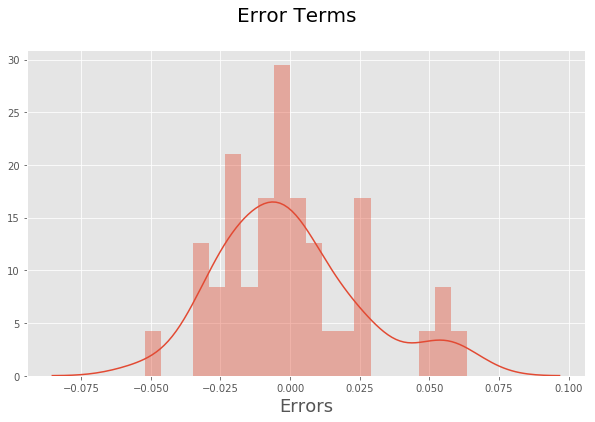

In [455]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [456]:
y_test = df_test.pop('gmv')
X_test = df_test

In [457]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope', 'gmv_lag'],
      dtype='object')

In [458]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           33      8  2015    0.000000         0.387803             0.000000   
32          60      2  2016    0.440584         0.588921             0.211609   
38          66      4  2016    0.990971         0.300736             0.617353   
35          63      3  2016    1.000000         0.579623             0.611897   
33          61      2  2016    0.422372         0.644730             0.222695   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.000000                  0.000000             0.000000   
32                   0.718614                  0.866206             0.972552   
38                   0.191557                  0.671023             0.790947   
35                   0.418960                  0.681721             0.785803   
33                   0.696666                  0.857921             0.963873   

    adStock_SEM    ...     ExtensionTube    Filter     Flash  \
6      0.000000    ...               0.0  0.000000  0.000000   
32     0.329271    ...               0.0  0.692308  0.686877   
38     0.230894    ...               0.4  0.720000  0.627544   
35     0.251681    ...               1.0  1.000000  0.657861   
33     0.336290    ...               0.6  0.649231  0.879168   

    FlashShoeAdapter      Lens  ReflectorUmbrella  Softbox     Strap  \
6                0.0  0.000000                0.0      0.0  0.000000   
32               0.0  0.626277                0.0      0.0  0.767442   
38               0.0  0.600000                0.0      0.5  0.720930   
35               0.0  0.681752                1.0      0.0  0.976744   
33               0.0  0.551825                0.0      0.5  0.976744   

    Telescope   gmv_lag  
6    0.000000  0.000000  
32   0.460317  0.694230  
38   0.666667  0.757333  
35   0.746032  0.802749  
33   0.682540  1.000000  

[5 rows x 46 columns]

In [459]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Radio  Binoculars  CameraBattery  CameraTripod    Filter  \
6     1.0       0.000000    0.000000       0.000000      0.000000  0.000000   
32    1.0       0.218750    0.876866       1.000000      0.969427  0.692308   
38    1.0       0.241667    0.925373       0.746073      0.713376  0.720000   
35    1.0       0.386667    0.910448       0.749346      0.791083  1.000000   
33    1.0       0.093750    0.985075       0.545812      0.960510  0.649231   
51    1.0       0.012731    0.417910       0.165576      0.110828  0.335385   
5     1.0       0.000000    0.000000       0.000000      0.000000  0.000000   
26    1.0       1.000000    0.858209       0.363874      1.000000  0.695385   
25    1.0       0.000000    0.861940       0.419503      0.854777  0.784615   
45    1.0       0.763889    1.000000       0.496073      0.537580  0.640000   
48    1.0       0.190972    0.899254       0.433246      0.287898  0.670769   

       Strap  
6   0.000000  
32  0.767442  
38  0.720930  
35  0.976744  
33  0.976744  
51  0.465116  
5   0.000000  
26  0.604651  
25  0.651163  
45  1.000000  
48  0.813953

In [460]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

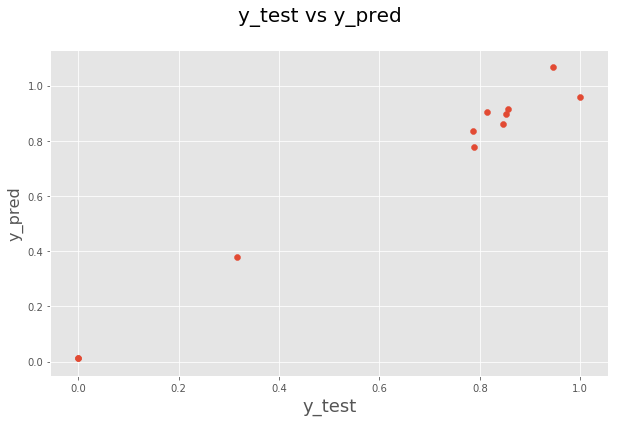

In [461]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity Analysis

In [462]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

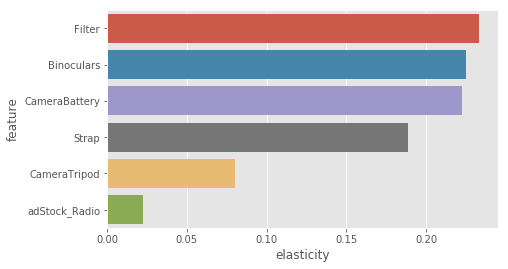

In [463]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Kyock's model

In [464]:
# Creating the lagged KPI i.e. lagged_GMV for Kyock Model
df = createKyockKPI(final_gaming_data)

In [465]:
# Keeping only those features which can be controlled by the company 
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [466]:
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM      ...       GamingHeadset  GamingKeyboard  GamingMemoryCard  \
0     1.255924      ...                 2.0             1.0               0.0   
1     1.883887      ...               177.0           433.0              36.0   
2     2.197868      ...               179.0           166.0              27.0   
3     2.354858      ...               283.0           174.0              28.0   
4     1.805811      ...               424.0            78.0              11.0   

   GamingMouse  GamingMousePad  GamingSpeaker  JoystickGamingWheel  \
0          4.0             1.0            0.0                  0.0   
1        971.0            55.0            0.0                 11.0   
2        359.0            48.0            0.0                  8.0   
3        449.0            67.0            0.0                 12.0   
4        239.0            39.0            1.0                 19.0   

   MotionController  TVOutCableAccessory       gmv_lag  
0               0.0                  0.0  0.000000e+00  
1              16.0                 73.0  2.234400e+04  
2              11.0                 92.0  1.931187e+06  
3              11.0                 93.0  1.614474e+06  
4               8.0                 79.0  1.748798e+06  

[5 rows x 40 columns]

In [467]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [468]:
scaler = MinMaxScaler()

In [469]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory',
       'gmv_lag'],
      dtype='object')

In [470]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days', 
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [471]:
y_train = df_train.pop('gmv')
X_train = df_train

In [472]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [473]:
#Columns which are supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Content Marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'NPS', 'total_holidays', 'is_holiday', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard',
       'GamingMouse', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController'],
      dtype='object')

In [474]:
#Columns which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Sponsorship',
       'adStock_Online marketing', 'sla', 'product_procurement_sla',
       'discount', 'total_premiumness', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingChargingStation',
       'GamingMousePad', 'TVOutCableAccessory', 'gmv_lag'],
      dtype='object')

In [475]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [476]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.35e-17
Time:                        19:15:16   Log-Likelihood:                 114.93
No. Observations:                  42   AIC:                            -187.9
Df Residuals:                      21   BIC:                            -151.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  8.925740e+08
6                 adStock_SEM  7.454440e+03
3             adStock_Digital  4.475930e+03
7               adStock_Radio  3.753880e+03
8               adStock_Other  3.657300e+03
2                  adStock_TV  4.854200e+02
4   adStock_Content Marketing  2.843000e+02
5         adStock_ Affiliates  8.000000e+01
1                        Year  5.488000e+01
19        JoystickGamingWheel  2.863000e+01
10             total_holidays  2.340000e+01
11                 is_holiday  2.260000e+01
14              GamingHeadset  1.513000e+01
13              GamingAdapter  1.376000e+01
17                GamingMouse  1.152000e+01
9                         NPS  1.150000e+01
12         GamingAccessoryKit  1.133000e+01
16           GamingMemoryCard  8.470000e+00
15             GamingKeyboard  5.880000e+00
20           MotionController  5.310000e+00
18              GamingSpeaker  4.700000e+00

In [477]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.74e-18
Time:                        19:15:16   Log-Likelihood:                 113.11
No. Observations:                  42   AIC:                            -186.2
Df Residuals:                      22   BIC:                            -151.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.868306e+08
6                 adStock_SEM  6.218360e+03
3             adStock_Digital  3.569970e+03
7               adStock_Radio  3.373580e+03
8               adStock_Other  3.348650e+03
2                  adStock_TV  4.030900e+02
4   adStock_Content Marketing  2.820900e+02
5         adStock_ Affiliates  7.941000e+01
10             total_holidays  2.108000e+01
11                 is_holiday  2.054000e+01
1                        Year  1.764000e+01
13              GamingAdapter  1.211000e+01
9                         NPS  1.125000e+01
14              GamingHeadset  1.096000e+01
12         GamingAccessoryKit  8.100000e+00
17                GamingMouse  7.510000e+00
16           GamingMemoryCard  6.850000e+00
15             GamingKeyboard  5.630000e+00
18              GamingSpeaker  4.100000e+00
19           MotionController  3.980000e+00

In [478]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.55e-18
Time:                        19:15:16   Log-Likelihood:                 111.98
No. Observations:                  42   AIC:                            -186.0
Df Residuals:                      23   BIC:                            -152.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.823193e+08
6                 adStock_SEM  6.015710e+03
3             adStock_Digital  3.515650e+03
7               adStock_Radio  3.351380e+03
8               adStock_Other  3.313910e+03
2                  adStock_TV  4.022400e+02
4   adStock_Content Marketing  2.466000e+02
5         adStock_ Affiliates  7.857000e+01
10             total_holidays  2.107000e+01
11                 is_holiday  2.047000e+01
1                        Year  1.736000e+01
9                         NPS  1.111000e+01
13              GamingHeadset  1.043000e+01
16                GamingMouse  7.150000e+00
12         GamingAccessoryKit  6.320000e+00
15           GamingMemoryCard  6.130000e+00
14             GamingKeyboard  5.250000e+00
17              GamingSpeaker  3.840000e+00
18           MotionController  3.720000e+00

In [479]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.58e-19
Time:                        19:15:16   Log-Likelihood:                 110.79
No. Observations:                  42   AIC:                            -185.6
Df Residuals:                      24   BIC:                            -154.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.751940e+08
6                 adStock_SEM  5.236440e+03
3             adStock_Digital  2.947290e+03
7               adStock_Radio  2.831630e+03
8               adStock_Other  2.818960e+03
2                  adStock_TV  3.418600e+02
4   adStock_Content Marketing  2.445300e+02
5         adStock_ Affiliates  6.654000e+01
10             total_holidays  2.063000e+01
11                 is_holiday  1.989000e+01
1                        Year  1.692000e+01
9                         NPS  1.060000e+01
13              GamingHeadset  1.041000e+01
12         GamingAccessoryKit  6.310000e+00
14           GamingMemoryCard  5.060000e+00
15                GamingMouse  4.800000e+00
16              GamingSpeaker  3.800000e+00
17           MotionController  3.270000e+00

In [480]:
# Let's remove feature with highest VIF
X_train_new3 = X_train_new2.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     63.38
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.12e-16
Time:                        19:15:16   Log-Likelihood:                 94.526
No. Observations:                  42   AIC:                            -155.1
Df Residuals:                      25   BIC:                            -125.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.154553e+08
6               adStock_Radio  2.095000e+02
7               adStock_Other  1.733900e+02
4   adStock_Content Marketing  8.423000e+01
3             adStock_Digital  7.034000e+01
2                  adStock_TV  3.567000e+01
5         adStock_ Affiliates  3.075000e+01
9              total_holidays  1.726000e+01
10                 is_holiday  1.645000e+01
12              GamingHeadset  1.036000e+01
8                         NPS  8.060000e+00
1                        Year  7.100000e+00
11         GamingAccessoryKit  5.910000e+00
14                GamingMouse  4.600000e+00
13           GamingMemoryCard  3.830000e+00
16           MotionController  3.250000e+00
15              GamingSpeaker  3.120000e+00

In [481]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     70.19
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.71e-17
Time:                        19:15:17   Log-Likelihood:                 94.489
No. Observations:                  42   AIC:                            -157.0
Df Residuals:                      26   BIC:                            -129.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  198.18
6               adStock_Other  169.71
3   adStock_Content Marketing   82.73
2             adStock_Digital   70.11
0                       const   68.75
1                  adStock_TV   31.27
4         adStock_ Affiliates   30.69
9                  is_holiday   13.03
8              total_holidays   13.02
11              GamingHeadset    8.19
7                         NPS    7.54
10         GamingAccessoryKit    5.48
13                GamingMouse    3.95
12           GamingMemoryCard    3.51
14              GamingSpeaker    2.95
15           MotionController    2.65

In [482]:
# Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     78.01
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.13e-18
Time:                        19:15:17   Log-Likelihood:                 94.468
No. Observations:                  42   AIC:                            -158.9
Df Residuals:                      27   BIC:                            -132.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  198.15
6               adStock_Other  169.70
3   adStock_Content Marketing   82.53
2             adStock_Digital   69.97
0                       const   67.27
1                  adStock_TV   31.23
4         adStock_ Affiliates   30.54
10              GamingHeadset    8.12
7                         NPS    7.42
9          GamingAccessoryKit    5.43
12                GamingMouse    3.91
11           GamingMemoryCard    3.48
13              GamingSpeaker    2.95
14           MotionController    2.62
8                  is_holiday    1.16

In [483]:
# Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     85.56
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.49e-19
Time:                        19:15:17   Log-Likelihood:                 94.096
No. Observations:                  42   AIC:                            -160.2
Df Residuals:                      28   BIC:                            -135.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4               adStock_Radio  145.19
5               adStock_Other  136.70
0                       const   58.98
3         adStock_ Affiliates   29.88
1                  adStock_TV   28.90
9               GamingHeadset    6.64
6                         NPS    4.56
8          GamingAccessoryKit    4.14
11                GamingMouse    3.40
10           GamingMemoryCard    2.97
12              GamingSpeaker    2.94
2   adStock_Content Marketing    2.67
13           MotionController    2.55
7                  is_holiday    1.16

In [484]:
# Let's drop feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     94.76
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.52e-20
Time:                        19:15:17   Log-Likelihood:                 93.831
No. Observations:                  42   AIC:                            -161.7
Df Residuals:                      29   BIC:                            -139.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  58.58
3         adStock_ Affiliates   8.42
5                         NPS   4.55
1                  adStock_TV   4.17
7          GamingAccessoryKit   3.93
8               GamingHeadset   3.87
10                GamingMouse   2.81
9            GamingMemoryCard   2.61
4               adStock_Radio   2.54
2   adStock_Content Marketing   2.52
12           MotionController   2.50
11              GamingSpeaker   1.90
6                  is_holiday   1.15

In [485]:
# Let's drop feature with highest p-value
X_train_new8= X_train_new7.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.86e-21
Time:                        19:15:17   Log-Likelihood:                 93.306
No. Observations:                  42   AIC:                            -162.6
Df Residuals:                      30   BIC:                            -141.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  49.58
3         adStock_ Affiliates   8.41
1                  adStock_TV   4.08
5                         NPS   3.95
7          GamingAccessoryKit   3.92
8               GamingHeadset   3.76
9                 GamingMouse   2.80
2   adStock_Content Marketing   2.44
11           MotionController   2.17
10              GamingSpeaker   1.90
4               adStock_Radio   1.82
6                  is_holiday   1.14

In [486]:
# Let's drop feature with highest p-value
X_train_new9= X_train_new8.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.70e-21
Time:                        19:15:17   Log-Likelihood:                 92.253
No. Observations:                  42   AIC:                            -162.5
Df Residuals:                      31   BIC:                            -143.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  49.01
3         adStock_ Affiliates   8.38
1                  adStock_TV   4.04
5                         NPS   3.94
6          GamingAccessoryKit   3.91
7               GamingHeadset   3.74
8                 GamingMouse   2.77
2   adStock_Content Marketing   2.42
10           MotionController   2.10
9               GamingSpeaker   1.90
4               adStock_Radio   1.73

In [487]:
# Let's drop feature with highest p-value
X_train_new10= X_train_new9.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.69e-22
Time:                        19:15:17   Log-Likelihood:                 90.700
No. Observations:                  42   AIC:                            -161.4
Df Residuals:                      32   BIC:                            -144.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0732    

Features    VIF
0                const  43.49
2  adStock_ Affiliates   8.07
1           adStock_TV   4.03
5   GamingAccessoryKit   3.72
6        GamingHeadset   3.63
4                  NPS   3.27
7          GamingMouse   2.13
9     MotionController   2.10
8        GamingSpeaker   1.89
3        adStock_Radio   1.70

In [488]:
# Let's drop feature with highest p-value
X_train_new11= X_train_new10.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.57e-23
Time:                        19:15:17   Log-Likelihood:                 89.667
No. Observations:                  42   AIC:                            -161.3
Df Residuals:                      33   BIC:                            -145.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0363    

Features   VIF
0                const  8.98
2  adStock_ Affiliates  5.48
1           adStock_TV  3.96
4   GamingAccessoryKit  3.26
5        GamingHeadset  3.16
8     MotionController  2.10
6          GamingMouse  2.05
7        GamingSpeaker  1.83
3        adStock_Radio  1.70

In [489]:
# Let's drop feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.34e-23
Time:                        19:15:17   Log-Likelihood:                 87.650
No. Observations:                  42   AIC:                            -159.3
Df Residuals:                      34   BIC:                            -145.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0389    

Features   VIF
0                const  8.90
3   GamingAccessoryKit  3.05
4        GamingHeadset  3.04
1  adStock_ Affiliates  2.76
5          GamingMouse  1.98
7     MotionController  1.83
2        adStock_Radio  1.67
6        GamingSpeaker  1.62

In [490]:
# Let's drop feature with highest p-value
X_train_new13= X_train_new12.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new13)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     163.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.43e-24
Time:                        19:15:17   Log-Likelihood:                 86.935
No. Observations:                  42   AIC:                            -159.9
Df Residuals:                      35   BIC:                            -147.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0347      0

Features   VIF
0               const  8.32
3       GamingHeadset  2.68
2  GamingAccessoryKit  2.21
4         GamingMouse  1.96
5       GamingSpeaker  1.62
6    MotionController  1.57
1       adStock_Radio  1.49

In [491]:
# Let's drop feature with highest p-value
X_train_new14= X_train_new13.drop(["GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.50e-24
Time:                        19:15:17   Log-Likelihood:                 85.034
No. Observations:                  42   AIC:                            -158.1
Df Residuals:                      36   BIC:                            -147.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0299      0

Features   VIF
0               const  8.07
3       GamingHeadset  2.55
2  GamingAccessoryKit  2.19
4         GamingMouse  1.90
5    MotionController  1.44
1       adStock_Radio  1.26

#### Selecting the first model as this one as the VIFs & p-values are in the acceptable range

In [492]:
# Dropping the feature so that the adjusted r-square doesn't drop much with one less feature
X_train_new15= X_train_new14.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     188.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.68e-24
Time:                        19:15:17   Log-Likelihood:                 80.551
No. Observations:                  42   AIC:                            -151.1
Df Residuals:                      37   BIC:                            -142.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0356      0

Features   VIF
0               const  7.94
3       GamingHeadset  2.55
4         GamingMouse  1.90
2  GamingAccessoryKit  1.77
1       adStock_Radio  1.25

#### Selecting the second model as this one as the VIFs & p-values are in the acceptable range

In [493]:
# Dropping the feature so that the adjusted r-square doesn't drop much with one less feature
X_train_new16= X_train_new15.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.48e-23
Time:                        19:15:17   Log-Likelihood:                 74.654
No. Observations:                  42   AIC:                            -141.3
Df Residuals:                      38   BIC:                            -134.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0446      0

Features   VIF
0               const  7.74
2       GamingHeadset  2.06
3         GamingMouse  1.81
1  GamingAccessoryKit  1.73

#### Selecting the third model as this one as the VIFs & p-values are in the acceptable range

In [494]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9115547380081738
lr model 2 r2_score 0.8888565166366238
lr model 3 r2_score 0.846761575609181


In [495]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

lr model 1 r2_score 0.0023506874795198697
lr model 2 r2_score 0.0030856638000180217
lr model 3 r2_score 0.005042400903674025


##### Based upon the cross validation score, model 1 seems the best among the 3 with minimum MSE.

### Residual Analysis


In [496]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

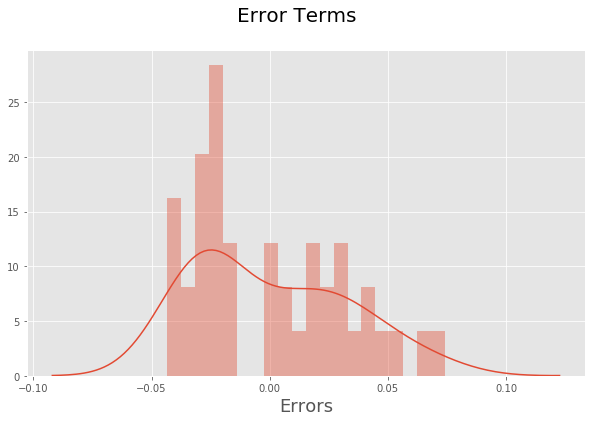

In [497]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [498]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [499]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  adStock_Radio  GamingAccessoryKit  GamingHeadset  GamingMouse  \
25    1.0       0.000000            0.931193       0.856222     0.605735   
48    1.0       0.420988            1.000000       0.512686     0.513142   
52    1.0       0.013580            0.472477       0.220701     0.158303   
37    1.0       0.481185            0.972477       0.361257     0.328554   
6     1.0       0.000000            0.000000       0.000000     0.000000   

    MotionController  
25          0.823529  
48          0.352941  
52          0.647059  
37          0.529412  
6           0.000000

In [500]:
# Making predictions using the fourth model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

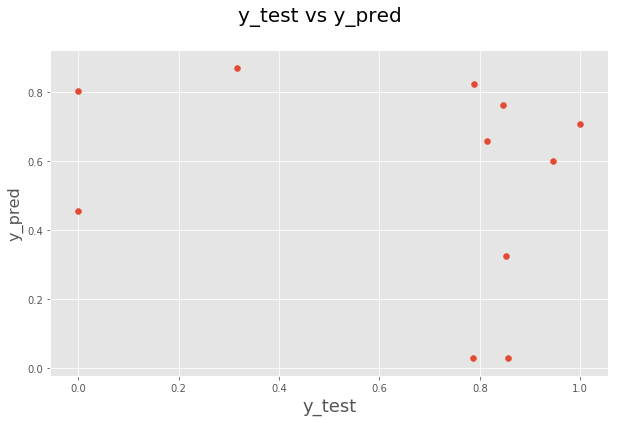

In [501]:
## Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity analysis

In [502]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

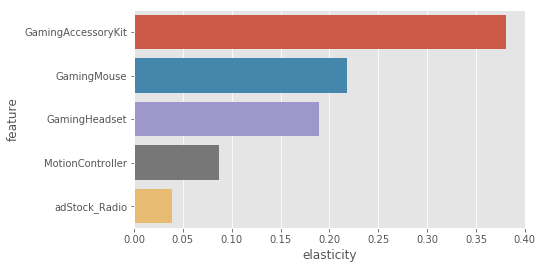

In [503]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### III. Home Audio - Kyock's  model

In [504]:
# creating dataset with lag gmv feature
df = createKyockKPI(final_home_audio_data)
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM      ...       DJController  Dock  DockingStation  FMRadio  \
0     1.255924      ...                0.0   0.0             0.0      2.0   
1     1.883887      ...                0.0  30.0             1.0    478.0   
2     2.197868      ...                0.0  50.0             1.0    532.0   
3     2.354858      ...                0.0  56.0             0.0    509.0   
4     1.805811      ...                0.0  44.0             0.0    372.0   

   HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  \
0         0.0              26.0       0.0         0.0            0.0   
1        13.0            1281.0       0.0         0.0           25.0   
2        27.0            1511.0       0.0         0.0           26.0   
3        20.0            1332.0       0.0         0.0           22.0   
4        11.0             939.0       0.0         0.0           16.0   

        gmv_lag  
0  0.000000e+00  
1  7.366000e+04  
2  3.394594e+06  
3  4.012062e+06  
4  3.560271e+06  

[5 rows x 39 columns]

In [505]:
# dropping the uncrollable feature
df=df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [506]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag'],
      dtype='object')

In [507]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [508]:
scaler = MinMaxScaler()

In [509]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [510]:
y_train = df_train.pop('gmv')
X_train = df_train

In [511]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [512]:
#selecting the top 20 feature given by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'discount', 'NPS', 'BoomBox', 'DJController',
       'Dock', 'FMRadio', 'HomeAudioSpeaker', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag'],
      dtype='object')

In [513]:
# neglecting the feature not selected by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'sla', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'DockingStation',
       'HiFiSystem', 'SlingBox'],
      dtype='object')

In [514]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [515]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1337.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.18e-26
Time:                        19:15:23   Log-Likelihood:                 165.90
No. Observations:                  40   AIC:                            -289.8
Df Residuals:                      19   BIC:                            -254.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
7                 adStock_SEM  3450.43
9               adStock_Other  2704.36
6         adStock_ Affiliates  2606.14
8               adStock_Radio  2313.55
5    adStock_Online marketing  2202.25
2             adStock_Digital  2049.95
4   adStock_Content Marketing   597.49
1                  adStock_TV   474.22
0                       const   291.11
3         adStock_Sponsorship   223.73
12                        NPS    38.75
17           HomeAudioSpeaker    13.60
13                    BoomBox    12.75
16                    FMRadio     9.69
15                       Dock     8.46
11                   discount     6.02
18                 SoundMixer     4.64
19              VoiceRecorder     4.08
10    product_procurement_sla     3.68
20                    gmv_lag     1.98
14               DJController     1.20

In [516]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.23e-27
Time:                        19:15:23   Log-Likelihood:                 165.76
No. Observations:                  40   AIC:                            -291.5
Df Residuals:                      20   BIC:                            -257.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6                 adStock_SEM  2984.64
8               adStock_Other  2236.52
7               adStock_Radio  2049.33
2             adStock_Digital  1959.15
4   adStock_Content Marketing   455.23
0                       const   265.52
1                  adStock_TV   239.26
5    adStock_Online marketing   145.06
3         adStock_Sponsorship    57.97
11                        NPS    35.76
15                    FMRadio     9.62
16           HomeAudioSpeaker     9.18
14                       Dock     8.18
12                    BoomBox     6.78
10                   discount     5.80
18              VoiceRecorder     4.08
9     product_procurement_sla     3.54
17                 SoundMixer     3.00
19                    gmv_lag     1.97
13               DJController     1.16

In [517]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["adStock_Online marketing"], axis = 1)
 # Add a constantDockingStation
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1597.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.66e-29
Time:                        19:15:23   Log-Likelihood:                 165.35
No. Observations:                  40   AIC:                            -292.7
Df Residuals:                      21   BIC:                            -260.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
5                 adStock_SEM  1746.43
2             adStock_Digital  1636.52
6               adStock_Radio   792.07
7               adStock_Other   678.96
0                       const   139.17
4   adStock_Content Marketing   124.30
1                  adStock_TV    32.40
3         adStock_Sponsorship    26.94
10                        NPS    22.61
14                    FMRadio     9.25
15           HomeAudioSpeaker     8.91
13                       Dock     8.04
11                    BoomBox     6.39
9                    discount     5.80
17              VoiceRecorder     4.02
8     product_procurement_sla     3.25
16                 SoundMixer     2.97
18                    gmv_lag     1.76
12               DJController     1.15

In [518]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1742.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.85e-30
Time:                        19:15:23   Log-Likelihood:                 165.01
No. Observations:                  40   AIC:                            -294.0
Df Residuals:                      22   BIC:                            -263.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  910.92
2             adStock_Digital  622.35
6               adStock_Radio  421.53
7               adStock_Other  387.76
0                       const  113.78
4   adStock_Content Marketing   65.09
1                  adStock_TV   28.26
3         adStock_Sponsorship   20.67
14           HomeAudioSpeaker    8.28
13                    FMRadio    7.38
12                       Dock    6.78
9                    discount    5.79
10                    BoomBox    5.68
16              VoiceRecorder    3.80
8     product_procurement_sla    3.05
15                 SoundMixer    2.71
17                    gmv_lag    1.75
11               DJController    1.14

In [519]:
# Let's remove feature  with highest p-value
X_train_new3 = X_train_new2.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1861.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.43e-32
Time:                        19:15:23   Log-Likelihood:                 164.23
No. Observations:                  40   AIC:                            -294.5
Df Residuals:                      23   BIC:                            -265.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  881.08
2             adStock_Digital  603.20
6               adStock_Radio  410.72
7               adStock_Other  378.69
0                       const  113.76
4   adStock_Content Marketing   65.06
1                  adStock_TV   27.33
3         adStock_Sponsorship   20.51
13           HomeAudioSpeaker    7.87
9                    discount    5.75
12                    FMRadio    5.72
10                    BoomBox    5.66
15              VoiceRecorder    3.34
8     product_procurement_sla    2.97
14                 SoundMixer    2.12
16                    gmv_lag    1.75
11               DJController    1.14

In [520]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1833.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.97e-33
Time:                        19:15:23   Log-Likelihood:                 161.78
No. Observations:                  40   AIC:                            -291.6
Df Residuals:                      24   BIC:                            -264.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  861.76
2             adStock_Digital  592.05
6               adStock_Radio  404.27
7               adStock_Other  371.71
0                       const  107.90
4   adStock_Content Marketing   64.28
1                  adStock_TV   24.92
3         adStock_Sponsorship   19.94
13           HomeAudioSpeaker    7.35
12                    FMRadio    5.65
9                    discount    5.36
10                    BoomBox    5.02
8     product_procurement_sla    2.97
14              VoiceRecorder    2.91
15                    gmv_lag    1.75
11               DJController    1.14

In [521]:
X_train_new5 = X_train_new4.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1687.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.42e-33
Time:                        19:15:23   Log-Likelihood:                 157.93
No. Observations:                  40   AIC:                            -285.9
Df Residuals:                      25   BIC:                            -260.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  861.74
2             adStock_Digital  579.57
6               adStock_Radio  404.09
7               adStock_Other  369.67
0                       const  106.14
4   adStock_Content Marketing   54.78
1                  adStock_TV   23.36
3         adStock_Sponsorship   19.52
11                    FMRadio    5.40
9                     BoomBox    5.02
12           HomeAudioSpeaker    3.76
13              VoiceRecorder    2.90
8     product_procurement_sla    1.91
14                    gmv_lag    1.71
10               DJController    1.14

In [522]:
X_train_new6 = X_train_new5.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1873.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.55e-35
Time:                        19:15:23   Log-Likelihood:                 157.76
No. Observations:                  40   AIC:                            -287.5
Df Residuals:                      26   BIC:                            -263.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5                 adStock_SEM  853.38
2             adStock_Digital  571.78
6               adStock_Radio  386.94
7               adStock_Other  352.81
0                       const   62.65
4   adStock_Content Marketing   53.92
1                  adStock_TV   21.73
3         adStock_Sponsorship   19.30
10                    FMRadio    5.25
8                     BoomBox    4.89
11           HomeAudioSpeaker    3.76
12              VoiceRecorder    2.87
13                    gmv_lag    1.59
9                DJController    1.14

In [523]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1923.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.58e-36
Time:                        19:15:23   Log-Likelihood:                 155.93
No. Observations:                  40   AIC:                            -285.9
Df Residuals:                      27   BIC:                            -263.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0250    

Features     VIF
4           adStock_SEM  800.13
2       adStock_Digital  571.26
5         adStock_Radio  386.93
6         adStock_Other  349.83
0                 const   62.24
1            adStock_TV   21.09
3   adStock_Sponsorship   17.56
9               FMRadio    5.18
7               BoomBox    4.85
10     HomeAudioSpeaker    3.44
11        VoiceRecorder    2.85
12              gmv_lag    1.49
8          DJController    1.13

In [524]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1977.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.05e-37
Time:                        19:15:23   Log-Likelihood:                 154.01
No. Observations:                  40   AIC:                            -284.0
Df Residuals:                      28   BIC:                            -263.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0147    

Features     VIF
3           adStock_SEM  191.52
1       adStock_Digital  129.84
4         adStock_Radio   56.70
5         adStock_Other   43.99
0                 const   17.88
2   adStock_Sponsorship   13.81
8               FMRadio    5.14
6               BoomBox    4.84
9      HomeAudioSpeaker    3.41
10        VoiceRecorder    2.08
11              gmv_lag    1.48
7          DJController    1.13

In [525]:
# dropping the feature with highest vif
X_train_new9= X_train_new8.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2104.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.12e-38
Time:                        19:15:23   Log-Likelihood:                 152.66
No. Observations:                  40   AIC:                            -283.3
Df Residuals:                      29   BIC:                            -264.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0126    

Features    VIF
3           adStock_SEM  63.53
1       adStock_Digital  46.38
0                 const  15.47
2   adStock_Sponsorship   7.05
7               FMRadio   4.61
5               BoomBox   3.20
8      HomeAudioSpeaker   3.13
4         adStock_Radio   2.09
9         VoiceRecorder   1.70
10              gmv_lag   1.45
6          DJController   1.10

In [526]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["DJController"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
  
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2058.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.44e-39
Time:                        19:15:23   Log-Likelihood:                 149.44
No. Observations:                  40   AIC:                            -278.9
Df Residuals:                      30   BIC:                            -262.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0139    

Features    VIF
3          adStock_SEM  62.67
1      adStock_Digital  45.61
0                const  15.08
2  adStock_Sponsorship   7.04
6              FMRadio   4.59
5              BoomBox   3.18
7     HomeAudioSpeaker   3.11
4        adStock_Radio   2.06
8        VoiceRecorder   1.69
9              gmv_lag   1.44

In [527]:
# dropping the feature with hioghest p-value
X_train_new11= X_train_new10.drop(["gmv_lag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1982.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.82e-40
Time:                        19:15:23   Log-Likelihood:                 145.68
No. Observations:                  40   AIC:                            -273.4
Df Residuals:                      31   BIC:                            -258.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0195    

Features    VIF
3          adStock_SEM  62.63
1      adStock_Digital  45.17
0                const  10.56
2  adStock_Sponsorship   6.97
6              FMRadio   4.56
7     HomeAudioSpeaker   3.11
5              BoomBox   2.92
4        adStock_Radio   1.96
8        VoiceRecorder   1.66

In [528]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2085.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.10e-40
Time:                        19:15:23   Log-Likelihood:                 143.39
No. Observations:                  40   AIC:                            -270.8
Df Residuals:                      32   BIC:                            -257.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0174    

Features    VIF
3          adStock_SEM  46.65
1      adStock_Digital  34.11
0                const   9.61
2  adStock_Sponsorship   5.72
5              FMRadio   4.52
6     HomeAudioSpeaker   3.06
4              BoomBox   2.92
7        VoiceRecorder   1.54

In [529]:
# dropping the feature with highest p-value
X_train_new13= X_train_new12.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2397.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.39e-42
Time:                        19:15:23   Log-Likelihood:                 142.48
No. Observations:                  40   AIC:                            -271.0
Df Residuals:                      33   BIC:                            -259.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0174    

Features   VIF
0                const  9.61
2          adStock_SEM  5.47
1  adStock_Sponsorship  4.49
4              FMRadio  4.22
3              BoomBox  2.74
5     HomeAudioSpeaker  2.59
6        VoiceRecorder  1.53

In [530]:
# deleting the features with highest p-values
X_train_new14= X_train_new13.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2866.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.34e-43
Time:                        19:15:23   Log-Likelihood:                 141.81
No. Observations:                  40   AIC:                            -271.6
Df Residuals:                      34   BIC:                            -261.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0164    

Features   VIF
0                const  9.08
3              FMRadio  3.88
2              BoomBox  2.48
4     HomeAudioSpeaker  2.41
1  adStock_Sponsorship  1.53
5        VoiceRecorder  1.22

In [531]:
# dropping feature with highest p-value
X_train_new15= X_train_new14.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new15)
  
lr2 = sm.OLS(y_train, X_train_lm1).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3622.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.83e-45
Time:                        19:15:23   Log-Likelihood:                 141.46
No. Observations:                  40   AIC:                            -272.9
Df Residuals:                      35   BIC:                            -264.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0163      0.004  

Features   VIF
0             const  9.06
2           FMRadio  3.53
1           BoomBox  2.40
3  HomeAudioSpeaker  2.38
4     VoiceRecorder  1.22

In [532]:
# dropping feature with highest p-value
X_train_new16= X_train_new15.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new16)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4538.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.86e-46
Time:                        19:15:23   Log-Likelihood:                 139.65
No. Observations:                  40   AIC:                            -271.3
Df Residuals:                      36   BIC:                            -264.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0174      0.004  

Features   VIF
0             const  8.83
2  HomeAudioSpeaker  2.38
1           FMRadio  2.36
3     VoiceRecorder  1.01

In [533]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9833287891121156
lr model 2 r2_score 0.9851866316465335


In [534]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 9.617788085916355e-05
lr model 2 MSE 8.162359848278281e-05


#### The best model is model 2 with the minimum number of features but maximum variance of the model being explained. Also, the MSE is the least of the 2nd model

### Residual Analysis


In [535]:
y_train_price = lr2.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

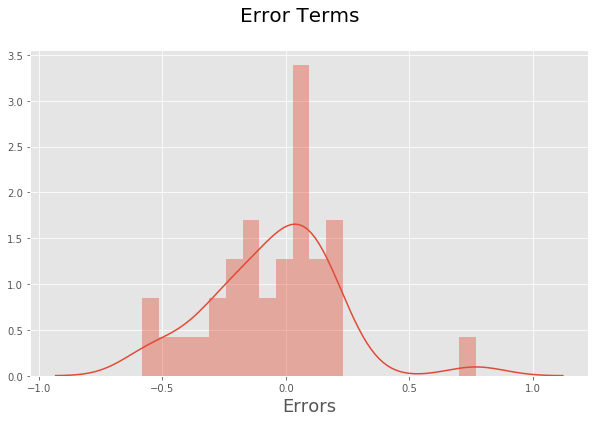

In [536]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [537]:
# y_test = df_test.pop('gmv')
X_test = df_test
y_test = df_test.pop('gmv')

In [542]:
X_test = X_test[X_train_lm2.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const   FMRadio  HomeAudioSpeaker  VoiceRecorder
6     1.0  0.833648          0.416162       0.375000
36    1.0  0.720227          0.446061       0.894231
37    1.0  0.725898          0.379394       0.894231
28    1.0  0.897921          1.000000       0.730769
43    1.0  0.551985          0.381414       1.000000
49    1.0  0.164461          0.194343       0.240385
5     1.0  0.000000          0.000000       0.000000
33    1.0  1.000000          0.871515       0.798077
20    1.0  0.843100          0.960000       0.394231
42    1.0  0.642722          0.426263       0.932692

In [539]:
# Making predictions using the fourth model
y_pred = lr2.predict(X_test)

Text(0, 0.5, 'y_pred')

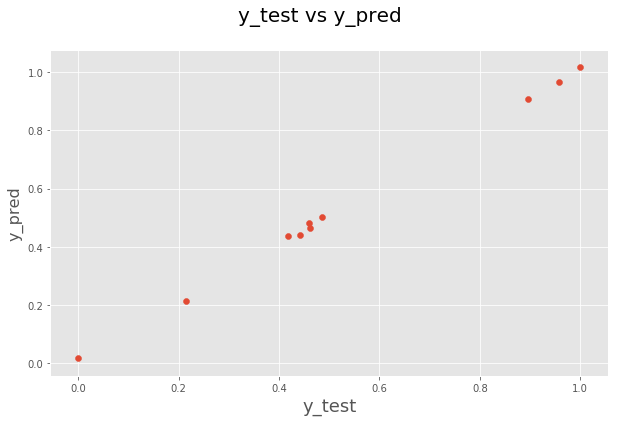

In [540]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity

In [544]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train, coefficients_df)

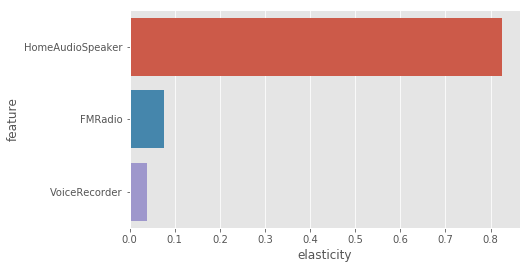

In [545]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Building the Distributed Lag Models

### Distributed Lag Model - Data Preparation

In [ ]:
#Creating function to create Lagged KPIs for the Distributed Lag Model
def createKPiForDistributedLag(df):
    df['adStock_TV_lag1'] = df['adStock_TV'].shift(1)
    df['adStock_TV_lag2'] = df['adStock_TV'].shift(2)
    df['adStock_TV_lag3'] = df['adStock_TV'].shift(3)
    
    df['adStock_Digital_lag1'] = df['adStock_Digital'].shift(1)
    df['adStock_Digital_lag2'] = df['adStock_Digital'].shift(2)
    df['adStock_Digital_lag3'] = df['adStock_Digital'].shift(3)
    
    df['adStock_Sponsorship_lag1'] = df['adStock_Sponsorship'].shift(1)
    df['adStock_Sponsorship_lag2'] = df['adStock_Sponsorship'].shift(2)
    df['adStock_Sponsorship_lag3'] = df['adStock_Sponsorship'].shift(3)
    
    df['adStock_Content Marketing_lag1'] = df['adStock_Content Marketing'].shift(1)
    df['adStock_Content Marketing_lag2'] = df['adStock_Content Marketing'].shift(2)
    df['adStock_Content Marketing_lag3'] = df['adStock_Content Marketing'].shift(3)
    
    df['adStock_Online marketing_lag1'] = df['adStock_Online marketing'].shift(1)    
    df['adStock_Online marketing_lag2'] = df['adStock_Online marketing'].shift(2)    
    df['adStock_Online marketing_lag3'] = df['adStock_Online marketing'].shift(3)    
    
    df['adStock_ Affiliates_lag1'] = df['adStock_ Affiliates'].shift(1)
    df['adStock_ Affiliates_lag2'] = df['adStock_ Affiliates'].shift(2)
    df['adStock_ Affiliates_lag3'] = df['adStock_ Affiliates'].shift(3)
    
    df['adStock_SEM_lag1'] = df['adStock_SEM'].shift(1)   
    df['adStock_SEM_lag2'] = df['adStock_SEM'].shift(2)
    df['adStock_SEM_lag3'] = df['adStock_SEM'].shift(3)
    
    df['adStock_Other_lag1'] = df['adStock_Other'].shift(1)   
    df['adStock_Other_lag2'] = df['adStock_Other'].shift(2)
    df['adStock_Other_lag3'] = df['adStock_Other'].shift(3)
    
    df['gmv_lag1'] = df['gmv'].shift(1)   
    df['gmv_lag2'] = df['gmv'].shift(2)
    df['gmv_lag3'] = df['gmv'].shift(3)
    
    df['sla_lag1'] = df['sla'].shift(1)   
    df['sla_lag2'] = df['sla'].shift(2)
    df['sla_lag3'] = df['sla'].shift(3)
    
    df['product_procurement_sla_lag1'] = df['product_procurement_sla'].shift(1)   
    df['product_procurement_sla_lag2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla_lag3'] = df['product_procurement_sla'].shift(3)
    
    df['discount_lag1'] = df['discount'].shift(1)   
    df['discount_lag2'] = df['discount'].shift(2)
    df['discount_lag3'] = df['discount'].shift(3)
    
    df['NPS_lag1'] = df['NPS'].shift(1)   
    df['NPS_lag2'] = df['NPS'].shift(2)
    df['NPS_lag3'] = df['NPS'].shift(3)
    
        
    return df.fillna(0)

### I. Camera Accessory - Distributed Lag Model

In [ ]:
#Creating Lagged KPIs
df = createKPiForDistributedLag(final_camera_data)
df.head()

In [ ]:
df.shape

In [ ]:
#Dropping the features which cannot be handled by the company
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [ ]:
df.head()

In [ ]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df.columns

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_train = df_train.pop('gmv')
X_train = df_train

In [ ]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Content Marketing_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["adStock_SEM_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature Flash with highest VIF
X_train_new2 = X_train_new1.drop(["adStock_Other_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["FlashShoeAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop the feature with highest p-value
X_train_new4 = X_train_new3.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new5 = X_train_new4.drop(["Softbox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the feature with highest VIF value
X_train_new6 = X_train_new5.drop(["total_special_sale_days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["is_special_sale_day"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the feature with highest VIF
X_train_new8= X_train_new7.drop(["adStock_Other_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the feature with highest p-value
X_train_new10= X_train_new8
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### Selecting this as the first model as all the p-values & VIFs are in the acceptable range

In [ ]:
#Let's try to drop another feature so that still the maximum variance is being capture by the model
X_train_new11= X_train_new10.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new11)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### Selecting this as the second model as all the p-values & VIFs are in the acceptable range

In [ ]:
#Let's try to drop another feature so that still the maximum variance is being capture by the model
X_train_new12= X_train_new11.drop(["sla_lag3"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

In [ ]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

#### As we see linear model 1 performs much better having lowest MSE than the other two models, therefore we choose that as the best among the multiplicative models for Camera Category

### Residual Analysis


In [ ]:
y_train_price = lr.predict(X_train_lm1)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [ ]:
y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
X_test.columns

In [ ]:
X_test.head()

In [ ]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

In [ ]:
# Making predictions using the final model
y_pred = lr.predict(X_test)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity

In [ ]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

In [ ]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Distributed Lag model

In [ ]:
# Creating the lagged KPIs for distributed lag model
df = createKPiForDistributedLag(final_gaming_data)

In [ ]:
# dropping the uncontrollable features
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [ ]:
df.head()

In [ ]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df.columns

In [ ]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
        'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_train = df_train.pop('gmv')
X_train = df_train

In [ ]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# selecting the top 20 features by rfe
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature GamingAccessoryKit with highest p-value
X_train_new= X_train_rfe.drop(["sla_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop Year with highest p-value
X_train_new1 = X_train_new.drop(["product_procurement_sla_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature Flash with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Sponsorship_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["adStock_SEM_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping the feature with highest p-values
X_train_new5 = X_train_new4.drop(["adStock_Other_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping the feature with highest p -value
X_train_new6 = X_train_new5.drop(["adStock_SEM_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping the feature with highest vif
X_train_new7= X_train_new6.drop(["adStock_Content Marketing_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["product_procurement_sla_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping the features with higest p-value
X_train_new10= X_train_new9
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new10)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Selecting this as our first model based on p-value and vif values

In [ ]:
# dropping the features to see the min drop in adj. r2 values
X_train_new11= X_train_new10.drop(["GamingChargingStation"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new11)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Selecting this as our second model based on p-value and vif values

In [ ]:
# dropping the features to see the min drop in adj. r2 values
X_train_new12= X_train_new11.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new12)
    
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Selecting this as our third model based on p-value and vif values

In [ ]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

In [ ]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

### Residual Analysis


In [ ]:
y_train_price = lr2.predict(X_train_lm2)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [ ]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
X_test = X_test[X_train_lm2.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

In [ ]:
# Making predictions using the fourth model
y_pred = lr2.predict(X_test)

In [ ]:
## Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity

In [ ]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train, coefficients_df)

In [ ]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### III. Home Audio - Distributed lag  model

In [ ]:
# creating lag features
df = createKPiForDistributedLag(final_home_audio_data)
df.head()

In [ ]:
# dropping the uncontrollable features
df=df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [ ]:
df.columns

In [ ]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
        'total_special_sale_days', 
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Other_lag1', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1', 'product_procurement_sla_lag2',
       'product_procurement_sla_lag3', 'discount_lag1', 'discount_lag2',
       'discount_lag3', 'NPS_lag1', 'NPS_lag2', 'NPS_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_train = df_train.pop('gmv')
X_train = df_train

In [ ]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# selecting features given by rfe
col = X_train.columns[rfe.support_]
col

In [ ]:
# neglecting the features not selected by rfe
X_train.columns[~rfe.support_]

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["SlingBox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["product_procurement_sla_lag2"], axis = 1)
 # Add a constantDockingStation
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["product_procurement_sla_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["discount_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_Digital_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["gmv_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_Online marketing_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new8= X_train_new7.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Other_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new10= X_train_new9.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new11= X_train_new10.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_Online marketing_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new13= X_train_new12.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new14= X_train_new13.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new16= X_train_new14.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new16)
    
lr3 = sm.OLS(y_train, X_train_lm2).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Let's drop feature with highest p-value
X_train_new17= X_train_new16.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new17)
    
lr2 = sm.OLS(y_train, X_train_lm3).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

In [ ]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

#### The best model is model 2 with the minimum number of features but maximum variance of the model being explained. As only two features are able to explain the 97% variance of the model

### Residual Analysis


In [ ]:
y_train_price = lr2.predict(X_train_lm3)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [ ]:
# y_test = df_test.pop('gmv')
X_test = df_test
y_test = df_test.pop('gmv')

In [ ]:
X_test = X_test[X_train_lm3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

In [ ]:
# Making predictions using the fourth model
y_pred = lr2.predict(X_test)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity Analysis - Home Audio - Distributed Lag Model

In [ ]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train, coefficients_df)

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))